# Imports

In [1]:
import astropy ; print("Astropy version:",astropy.__version__)
import photutils ; print("Photutils version:",photutils.__version__)
import numpy as np ; print("Numpy version:",np.__version__)

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns; print("Seaborn version:",sns.__version__)
sns.set(context='talk')


import tng_api_utils as tau

import os

Astropy version: 4.0
Photutils version: 0.7.2
Numpy version: 1.18.1
Seaborn version: 0.10.0


# Data input

### New (this summer) data input

In [2]:
# Read in the data
dash3 = [astropy.io.ascii.read("Lightcone_TNG300-3_mag30_6_5_xyz.txt"), "300-3"]
dash2 = [astropy.io.ascii.read("Lightcone_TNG300-2_mag30_6_5_xyz.txt"), "300-2"]
dash1xyz = [astropy.io.ascii.read("Lightcone_TNG300-1_mag30_6_5_xyz.txt"), "300-1xyz"]
dash1yxz = [astropy.io.ascii.read("Lightcone_TNG300-1_mag30_6_5_yxz.txt"), "300-1yxz"]
dash1zyx = [astropy.io.ascii.read("Lightcone_TNG300-1_mag30_6_5_zyx.txt"), "300-1zyx"]
tng1001xyz = [astropy.io.ascii.read("Lightcone_TNG100-1_mag30_7_6_xyz.txt"), "100-1xyz"]
tng1001yxz = [astropy.io.ascii.read("Lightcone_TNG100-1_mag30_7_6_yxz.txt"), "100-1yxz"]
tng1001zyx = [astropy.io.ascii.read("Lightcone_TNG100-1_mag30_7_6_zyx.txt"), "100-1zyx"]
# Rename the columns to their actually names: w2sr= 'within two times stellar half mass radius'
real_names = ['Snapshot number', 'Subhalo index', 'RA degree', 'DEC degree',
              'RA true z', 'DEC true z', 'RA inferred z', 'DEC inferred z',
              'True z', 'Inferred z', 'Peculiar z', 'True scale',
              'Comoving X', 'Comoving Y', 'Comoving Z',
              'True angular distance', 'Inferred angular distance',
              'Snapshot z', 'Geometric z', 'Lightcone number',
              'Stellar mass w2sr', 'Total gas mass w2sr', 'Total subhalo mass',
              'Total BH mass w2sr', 'Total baryon mass w2sr', 'SFR w2sr',
              'Total BH accretion rate', 'Camera X', 'Camera Y', 'Camera Z',
              'Intrinsic g mag', 'Intrinsic r mag', 'Intrinsic i mag',
              'Intrinsic z mag', 'Galaxy motion X', 'Galaxy motion Y',
              'Galaxy motion Z/Peculiar', 'Cosmological expansion',
              'Apparent total g mag']

i=0
for colname in dash2[0].colnames: # assumes that all the tables are formatted identically
    dash1xyz[0].rename_column(colname, real_names[i])
    dash1yxz[0].rename_column(colname, real_names[i])
    dash1zyx[0].rename_column(colname, real_names[i])
    dash2[0].rename_column(colname, real_names[i])
    dash3[0].rename_column(colname, real_names[i])
    tng1001xyz[0].rename_column(colname, real_names[i])
    tng1001yxz[0].rename_column(colname, real_names[i])
    tng1001zyx[0].rename_column(colname, real_names[i])
    
    i+=1

### Observational data (Duncan et al. 2019)

In [3]:
# columns: zmin, zmax, f_pair, sigma_pair
Duncan = np.genfromtxt('Duncan_m10.3_mfrac0.25_pairs.txt')
obsz = (Duncan[:,0] + Duncan[:,1])/2
obs_info = [obsz, Duncan[:,2], Duncan[:,3]]

### Old (Snyder et al. 2017) data input

In [4]:
# Read in the old data
il1xyz = [astropy.io.ascii.read("Illustris-1_RADEC_hudfwide_75Mpc_7_6_xyz_corners.txt"), "il1xyz"]
il1yxz = [astropy.io.ascii.read("Illustris-1_RADEC_hudfwide_75Mpc_7_6_yxz_corners.txt"), "il1yxz"]
il1zyx = [astropy.io.ascii.read("Illustris-1_RADEC_hudfwide_75Mpc_7_6_zyx_corners.txt"), "il1zyx"]

il2xyz = [astropy.io.ascii.read("Illustris-2_RADEC_hudfwide_75Mpc_7_6_xyz_corners.txt"), "il2xyz"]
il2yxz = [astropy.io.ascii.read("Illustris-2_RADEC_hudfwide_75Mpc_7_6_yxz_corners.txt"), "il2yxz"]
il2zyx = [astropy.io.ascii.read("Illustris-2_RADEC_hudfwide_75Mpc_7_6_zyx_corners.txt"), "il2zyx"]


# Rename the columns to their actually names: w2sr= 'within two times stellar half mass radius'
old_names = ['Snapshot number', 'Subhalo index', 'RA degree', 'DEC degree',
              'RA true z', 'DEC true z', 'RA inferred z', 'DEC inferred z',
              'True z', 'Inferred z', 'Peculiar z', 'True scale',
              'Comoving X', 'Comoving Y', 'Comoving Z',
              'True angular distance', 'Inferred angular distance',
              'Snapshot z', 'Geometric z', 'Lightcone number',
              'Stellar mass w2sr', 'Total gas mass w2sr', 'Total subhalo mass',
              'Total BH mass w2sr', 'Total baryon mass w2sr', 'SFR w2sr',
              'Total BH accretion rate', 'Camera X', 'Camera Y', 'Camera Z',
              'Intrinsic g mag', 'Intrinsic r mag', 'Intrinsic i mag',
              'Intrinsic z mag', 'Galaxy motion X', 'Galaxy motion Y',
              'Galaxy motion Z/Peculiar', 'Cosmological expansion']

i=0
for colname in il1xyz[0].colnames: # assumes that all the tables are formatted identically
    il1xyz[0].rename_column(colname, old_names[i])
    il1yxz[0].rename_column(colname, old_names[i])
    il1zyx[0].rename_column(colname, old_names[i])
    
    il2xyz[0].rename_column(colname, old_names[i])
    il2yxz[0].rename_column(colname, old_names[i])
    il2zyx[0].rename_column(colname, old_names[i])
    
    
    i+=1

# Sanity check graphs

### Redshift histogram

In [5]:
# options: "true", (col09); "snapshot", (col18); "inferred", (col10); "geometric", (col19)
def redshift_hist(redshift_type, data,**kwargs):
    if redshift_type == "true":
        plt.hist(data[0]["True z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel('True redshift')
        plt.ylabel('Count')
        plt.show()
        
    elif redshift_type == "snapshot":
        plt.hist(data[0]["Snapshot z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel('Snapshot redshift')
        plt.ylabel('Count')
        plt.show()
        
    elif redshift_type == "inferred":
        plt.hist(data[0]["Inferred z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel("Inferred redshift")
        plt.ylabel('Count')
        plt.show()
        
    elif redshift_type == "geometric":
        plt.hist(data[0]["Geometric z"],**kwargs)
        plt.title("Data from tng" + data[1])
        plt.xlabel('Geometric redshift')
        plt.ylabel('Count')
        plt.show()
    
    else:
        print ("Mistyped option. Please enter one of the following options: \"true\", (col09); \"snapshot\", (col18); \"inferred\", (col10); \"geometric\", (col19)")
        
    return

### Investigate stellar masses

In [6]:
def plot_mass_hist(data,zrange=[0.5,5.0]):
    f=plt.figure(figsize=(15,6))
    ax=f.add_subplot(111)
    zi= np.logical_and( data[0]['True z'] < zrange[1],data[0]['True z'] >= zrange[0])
    res=ax.hist(np.log10(data[0]['Stellar mass w2sr'][zi]),bins=50,range=[9,12])
    x=ax.set_xlabel(data[1]+' $M_*$')
    ax.set_ylim(0,1000)
    ax.set_xlim(9.0,12.0)
    plt.show(f)
    plt.close(f)

### RA vs. reshift graphs

In [44]:
# Because of all the diffrent kinds of RA and redshift, it's just easier to just pull the data from the array manually
# RA TYPES: 'RA degree', 'RA true z', 'RA inferred z'
# z TYPES: 'True z', 'Inferred z', 'Snapshot z', 'Geometric z'
def ra_vs_redshift(ra_type, z_type, data,mrange=[10,12.0],**kwargs):
    plt.figure(figsize=(20,8))
    mi = np.logical_and(np.log10(data[0]['Stellar mass w2sr'])>=mrange[0],np.log10(data[0]['Stellar mass w2sr'])<mrange[1])
    sns.scatterplot(data[0][z_type][mi], data[0][ra_type][mi],**kwargs)
    plt.xlabel('Redshift (distance)')
    plt.ylabel('Position in degrees')
    plt.xlim(0,6.0)
    plt.title('Simulated Cosmic Web')
    plt.show()
    return

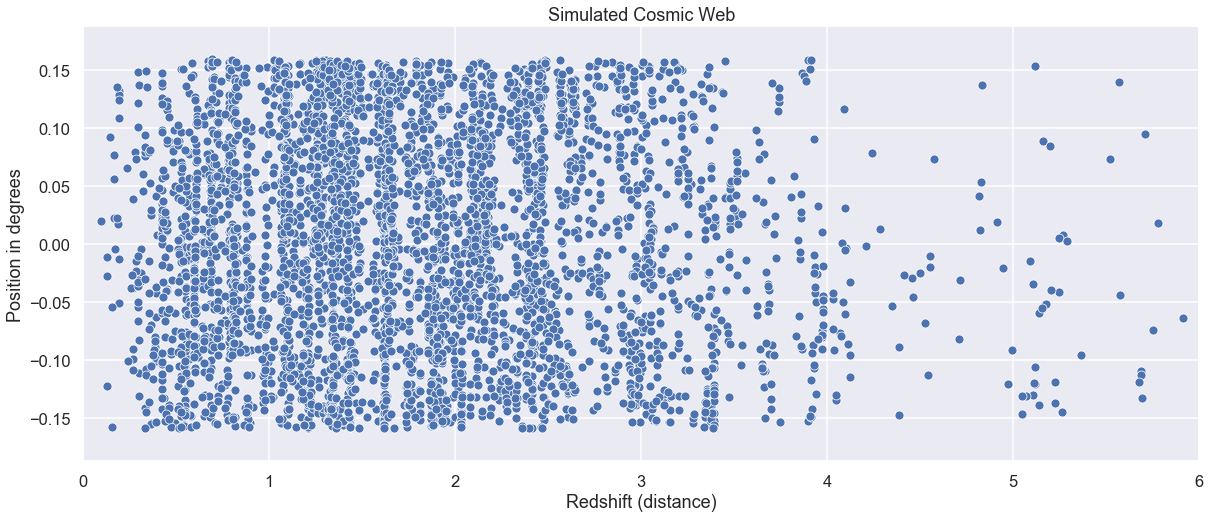

In [45]:
ra_vs_redshift('RA degree','True z', dash1xyz)

# Pair fraction plots

## Functions

In [8]:
def pairs_plots(data, stellar_tag, RA_tag, DEC_tag, z_tag, show='no', primary_mass=10.0**10.3,zbins=((1.0,2.0),(2.0,2.5),(2.5,3.0),(3.0,4.0),(4.0,5.0),(5.0,6.0),(6.0,8.0)), mfrac=0.25, d_min=5, d_max=71, pair_scale='log', ylim=[0.01, 1.0]):
    
    zpts = []
    for each_bin in zbins:
        zpts.append(np.mean(each_bin))
        
    zpts = tuple(zpts);   
    massive_primaries_im = data[0][stellar_tag] >= (primary_mass)
    possible_secondaries_im = data[0][stellar_tag] >= (primary_mass/100)
    print(str(np.sum(massive_primaries_im)) + " possible primaries found, " + 
          str(np.sum(possible_secondaries_im)) + " possible secondaries found.")
    RA = data[0][RA_tag]
    Dec = data[0][DEC_tag]
    source_skycoords = astropy.coordinates.SkyCoord(RA, Dec, unit="deg")
    kpc_per_arcmin = tau.tngcos.kpc_proper_per_arcmin(data[0][z_tag])
    kpc_per_arcsec = kpc_per_arcmin.to(astropy.units.kpc/astropy.units.arcsec)
    
    fp_im=[]
    fp_cat=[]
    for zb in zbins:
        zl=zb[0] ; zr=zb[1]
        this_zi= np.logical_and(data[0][z_tag]>=zl,data[0][z_tag]<zr)
    
        this_pzi=np.logical_and(massive_primaries_im==True,this_zi==True)
        this_szi=np.logical_and(possible_secondaries_im==True,this_zi==True)
    
    
        pri_indices = np.where(this_pzi==True)[0]
        sec_indices = np.where(this_szi==True)[0]
        
        pairs_this_z=0
        pri_this_z=0
        skl=[]

        for pi in pri_indices:
            pri_m=data[0][stellar_tag][pi]
            pri_z=data[0][z_tag][pi]
            pri_sc=source_skycoords[pi]
            pri_kpcas=kpc_per_arcsec[pi]
            sec_m=data[0][stellar_tag][sec_indices]
            sec_z=data[0][z_tag][sec_indices]
            sec_sc=source_skycoords[sec_indices]
            npairs,sk = count_pairs(pri_z,pri_m,pri_sc,sec_z,sec_m,sec_sc,pri_kpcas,mfrac,d_min,d_max)
            pri_this_z+=1
            pairs_this_z+=npairs
            skl.append(sk)
        #print(np.median(np.asarray(skl)),np.min(np.asarray(skl)))
        
        if len(pri_indices) > 0:
            if (show!='no'):
                print("Current redshift bin:", zb)
                print("Primaries detected for this bin:", pri_this_z)
                print("Pairs detected for this bin:", pairs_this_z)
                print("Pair fraction for this bin:",pairs_this_z/pri_this_z)
                print("---------------------------------------------")
            fp_im.append(pairs_this_z/pri_this_z)
        else:
            fp_im.append(0.0)
            
    if (show!='no'):        
        fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
        ax1.plot(zpts,fp_im,marker='o',linestyle='None',markersize=20,markerfacecolor='Black',mec='None')

        ax1.set_xlabel('redshift',size=25)
        ax1.set_xlim(zbins[0][0], zbins[-1][-1])

        ax1.set_ylabel('Pair Fraction',size=25)
        ax1.set_ylim(ylim)
        ax1.set_yscale(pair_scale)

        ax1.tick_params(labelsize=25)

        plt.show()
    return (zpts, fp_im, data[1])

In [9]:
def count_pairs(pri_z,pri_m,pri_sc,sec_z,sec_m,sec_sc,pri_kpcas,mfrac,d_min,d_max,zfrac=0.02):
    sep = pri_sc.separation(sec_sc)
    sep_kpc = pri_kpcas*sep.to('arcsec')
    sep_kpc = sep_kpc.value
    slist = np.logical_and(np.logical_and(sep_kpc > d_min, np.logical_and(np.logical_and(sep_kpc < d_max,np.abs(sec_z-pri_z)<zfrac*(1.0+pri_z)),sec_m/pri_m >= mfrac)),sec_m/pri_m<1)
    num_pairs=np.sum(slist)
    return num_pairs, sep_kpc

In [10]:
def all_plot(xyz, yxz, zyx, bins=((0.001,0.75),(0.75,1.25),(1.25,1.75),(1.75,2.5),(2.5,3.5),(3.5,4.5),(4.5,6.5)), ylim=[0.005, 1], obs='no',save=False):
    if (xyz[0] == yxz[0] == zyx[0]):
        xyz, yxz, zyx = np.array([xyz, yxz, zyx])
        all_= (np.array(xyz[1])+np.array(yxz[1])+np.array(zyx[1]))/3

        fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
        ax1.plot(xyz[0],all_,marker='o',linestyle='None',markersize=15,color='black',label=('All '+ xyz[2][:-3]))
        if (obs != 'no'):
            ax1.errorbar(obs[0], obs[1], yerr=obs[2], marker='o', linestyle='None', markersize=10, color='red', label = 'Observational data')
        ax1.plot(xyz[0],xyz[1],marker='$+$',linestyle='None',markersize=18,color='Grey',label=xyz[2])
        ax1.plot(yxz[0],yxz[1],marker='$*$',linestyle='None',markersize=20,color='Grey',label=yxz[2])
        ax1.plot(zyx[0],zyx[1],marker='$x$',linestyle='None',markersize=14,color='Grey',label= zyx[2])
        ax1.legend(loc='lower left',fontsize=20)

        ax1.set_xlabel('redshift',size=25)
        ax1.set_xlim(bins[0][0], 6.5)
        ax1.set_ylabel('Pair Fraction',size=25)
        ax1.set_ylim(ylim)
        ax1.set_yscale('log')
        ax1.get_yaxis().set_major_formatter(tick.ScalarFormatter())
        ax1.get_yaxis().set_minor_formatter(tick.NullFormatter())
        
        ax1.tick_params(labelsize=25)
        
        if (save==True):
            plt.savefig('All figure 300-1.pdf')
            
        plt.show()
        
        return np.array([all_, xyz[0]])
    
    else:
        print("Error! Weird redshift values in one or more of the input fields")

## Plot making

In [11]:
bins_for_plot1 = ((0.001,0.75),(0.75,1.25),(1.25,1.75),(1.75,2.5),(2.5,3.5),(3.5,4.5),(4.5,6.5))

2771 possible primaries found, 59045 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 405
Pairs detected for this bin: 67
Pair fraction for this bin: 0.1654320987654321
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 488
Pairs detected for this bin: 88
Pair fraction for this bin: 0.18032786885245902
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 755
Pairs detected for this bin: 200
Pair fraction for this bin: 0.26490066225165565
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 716
Pairs detected for this bin: 176
Pair fraction for this bin: 0.24581005586592178
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 329
Pairs detected for this bin: 47
Pair fraction for this bin: 0.1428571428

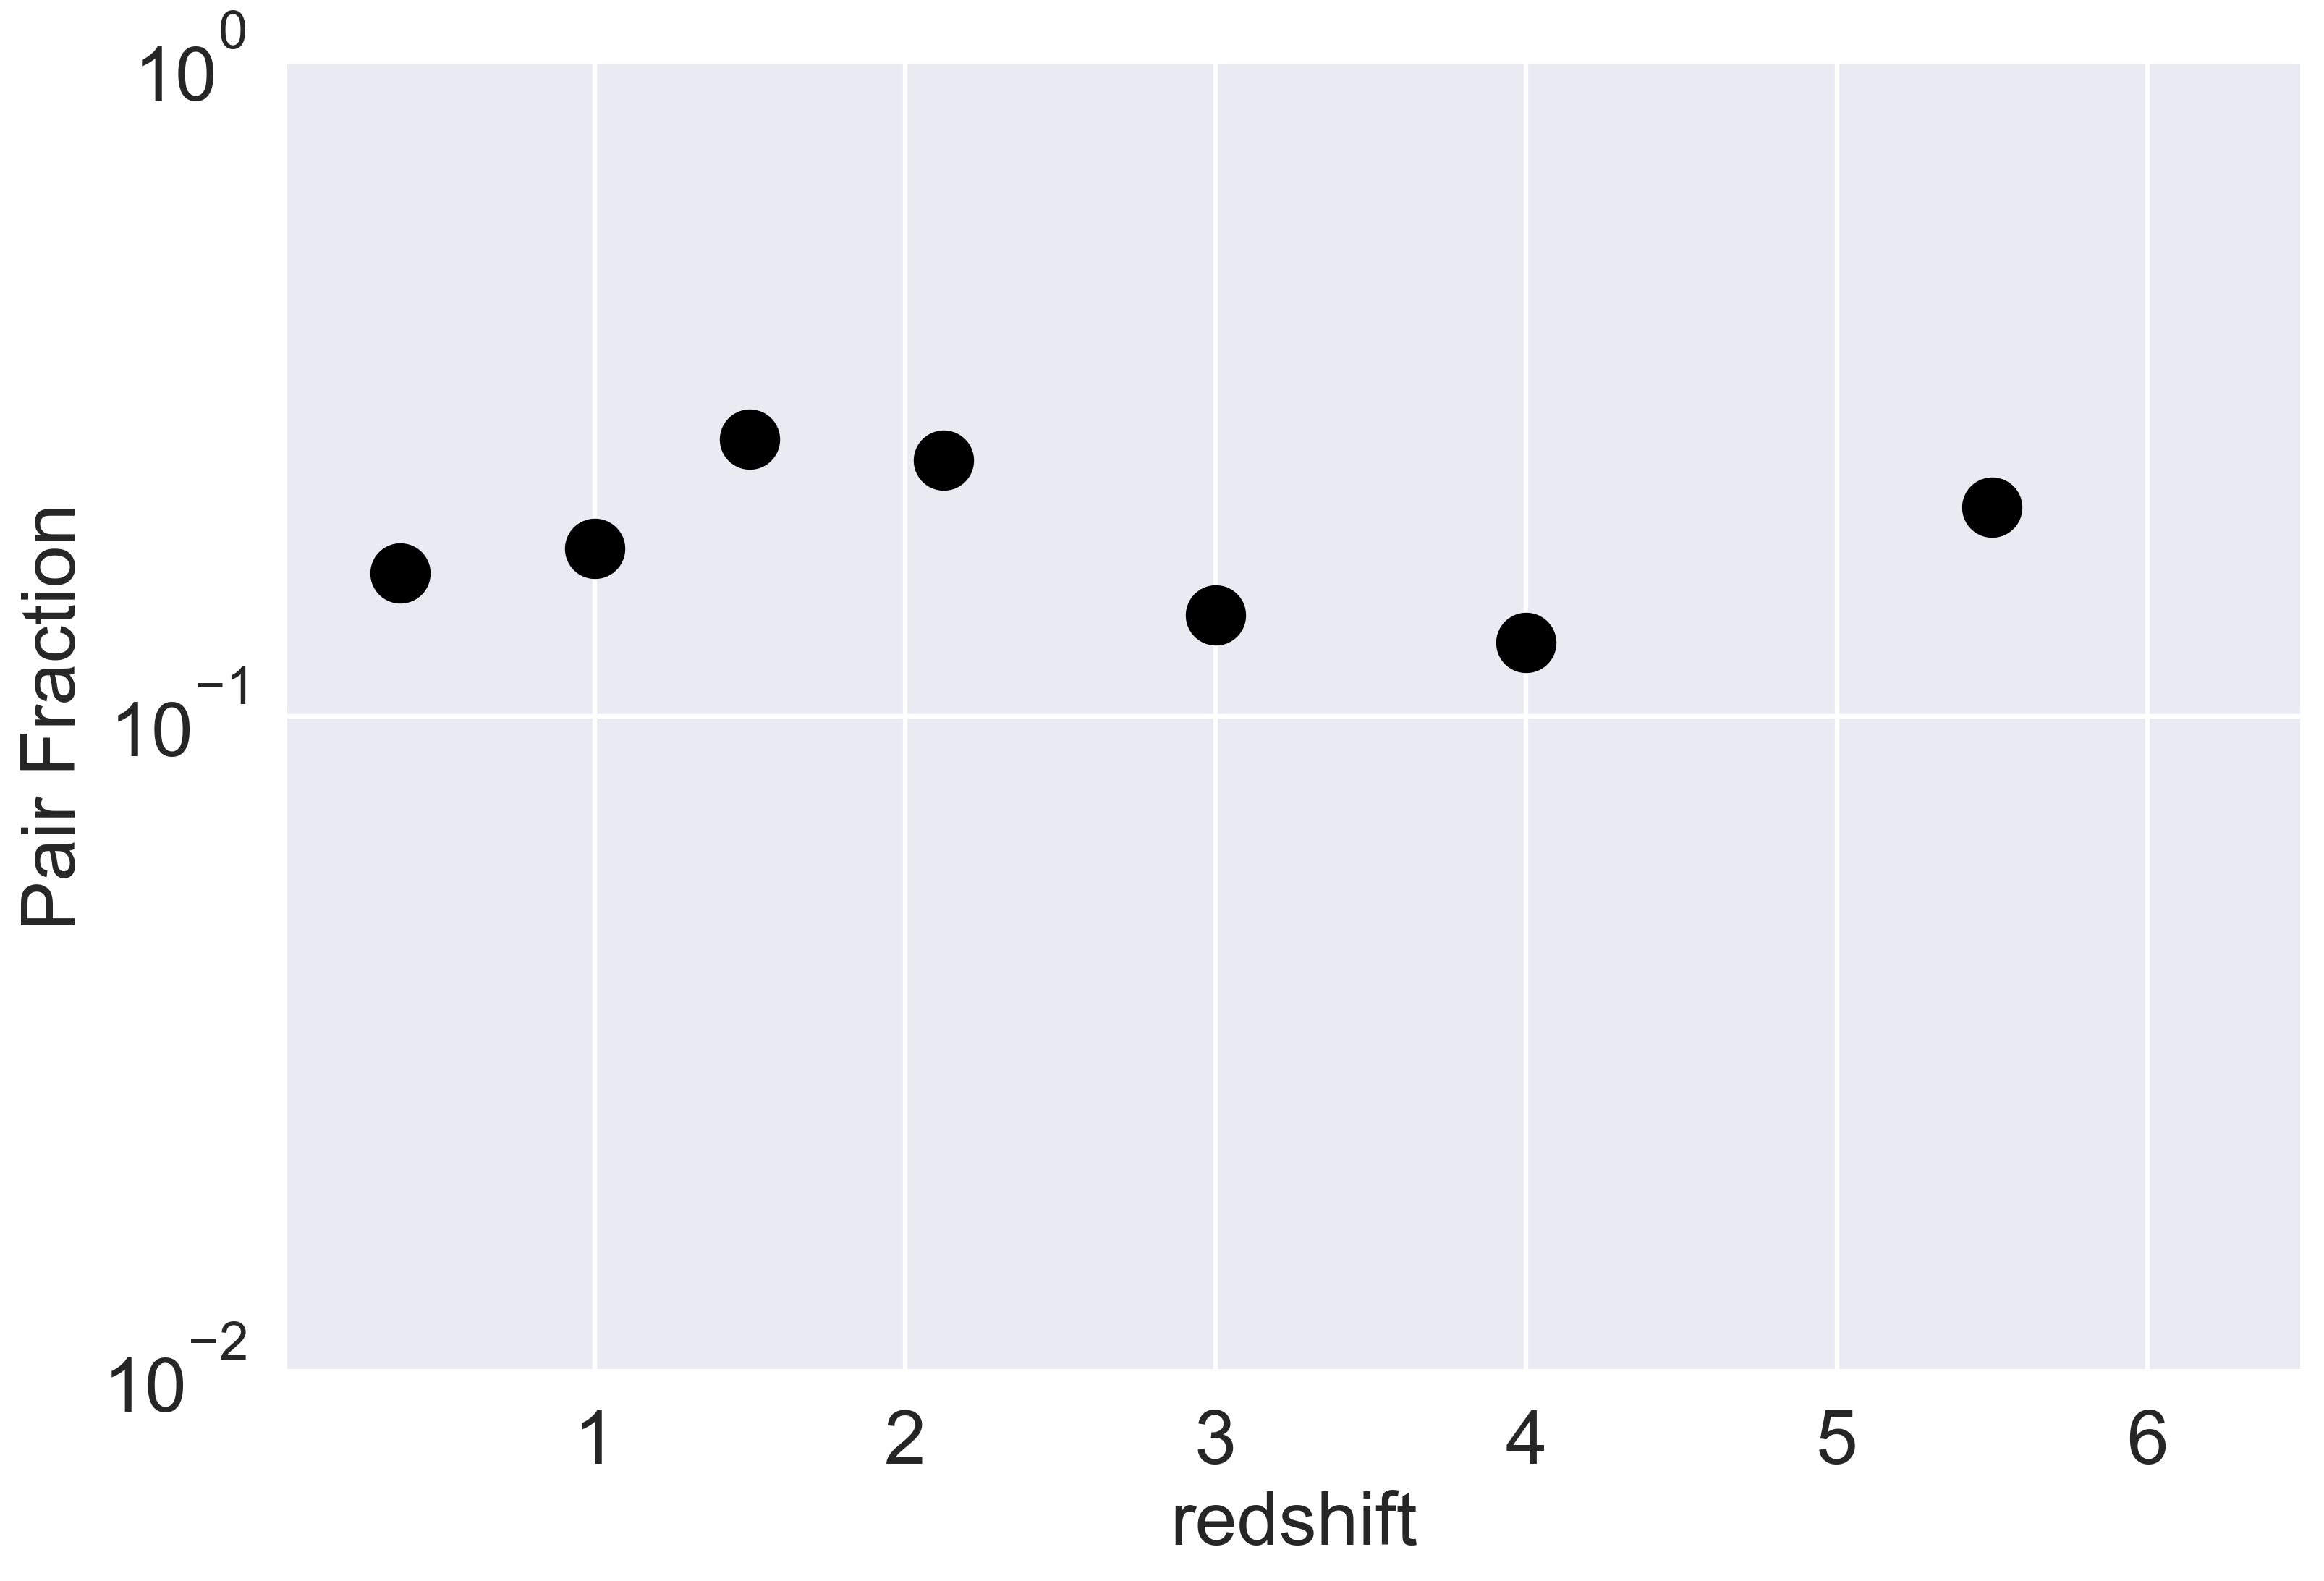

2675 possible primaries found, 59409 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 276
Pairs detected for this bin: 27
Pair fraction for this bin: 0.09782608695652174
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 570
Pairs detected for this bin: 78
Pair fraction for this bin: 0.1368421052631579
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 545
Pairs detected for this bin: 127
Pair fraction for this bin: 0.23302752293577983
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 736
Pairs detected for this bin: 171
Pair fraction for this bin: 0.23233695652173914
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 439
Pairs detected for this bin: 83
Pair fraction for this bin: 0.1890660592

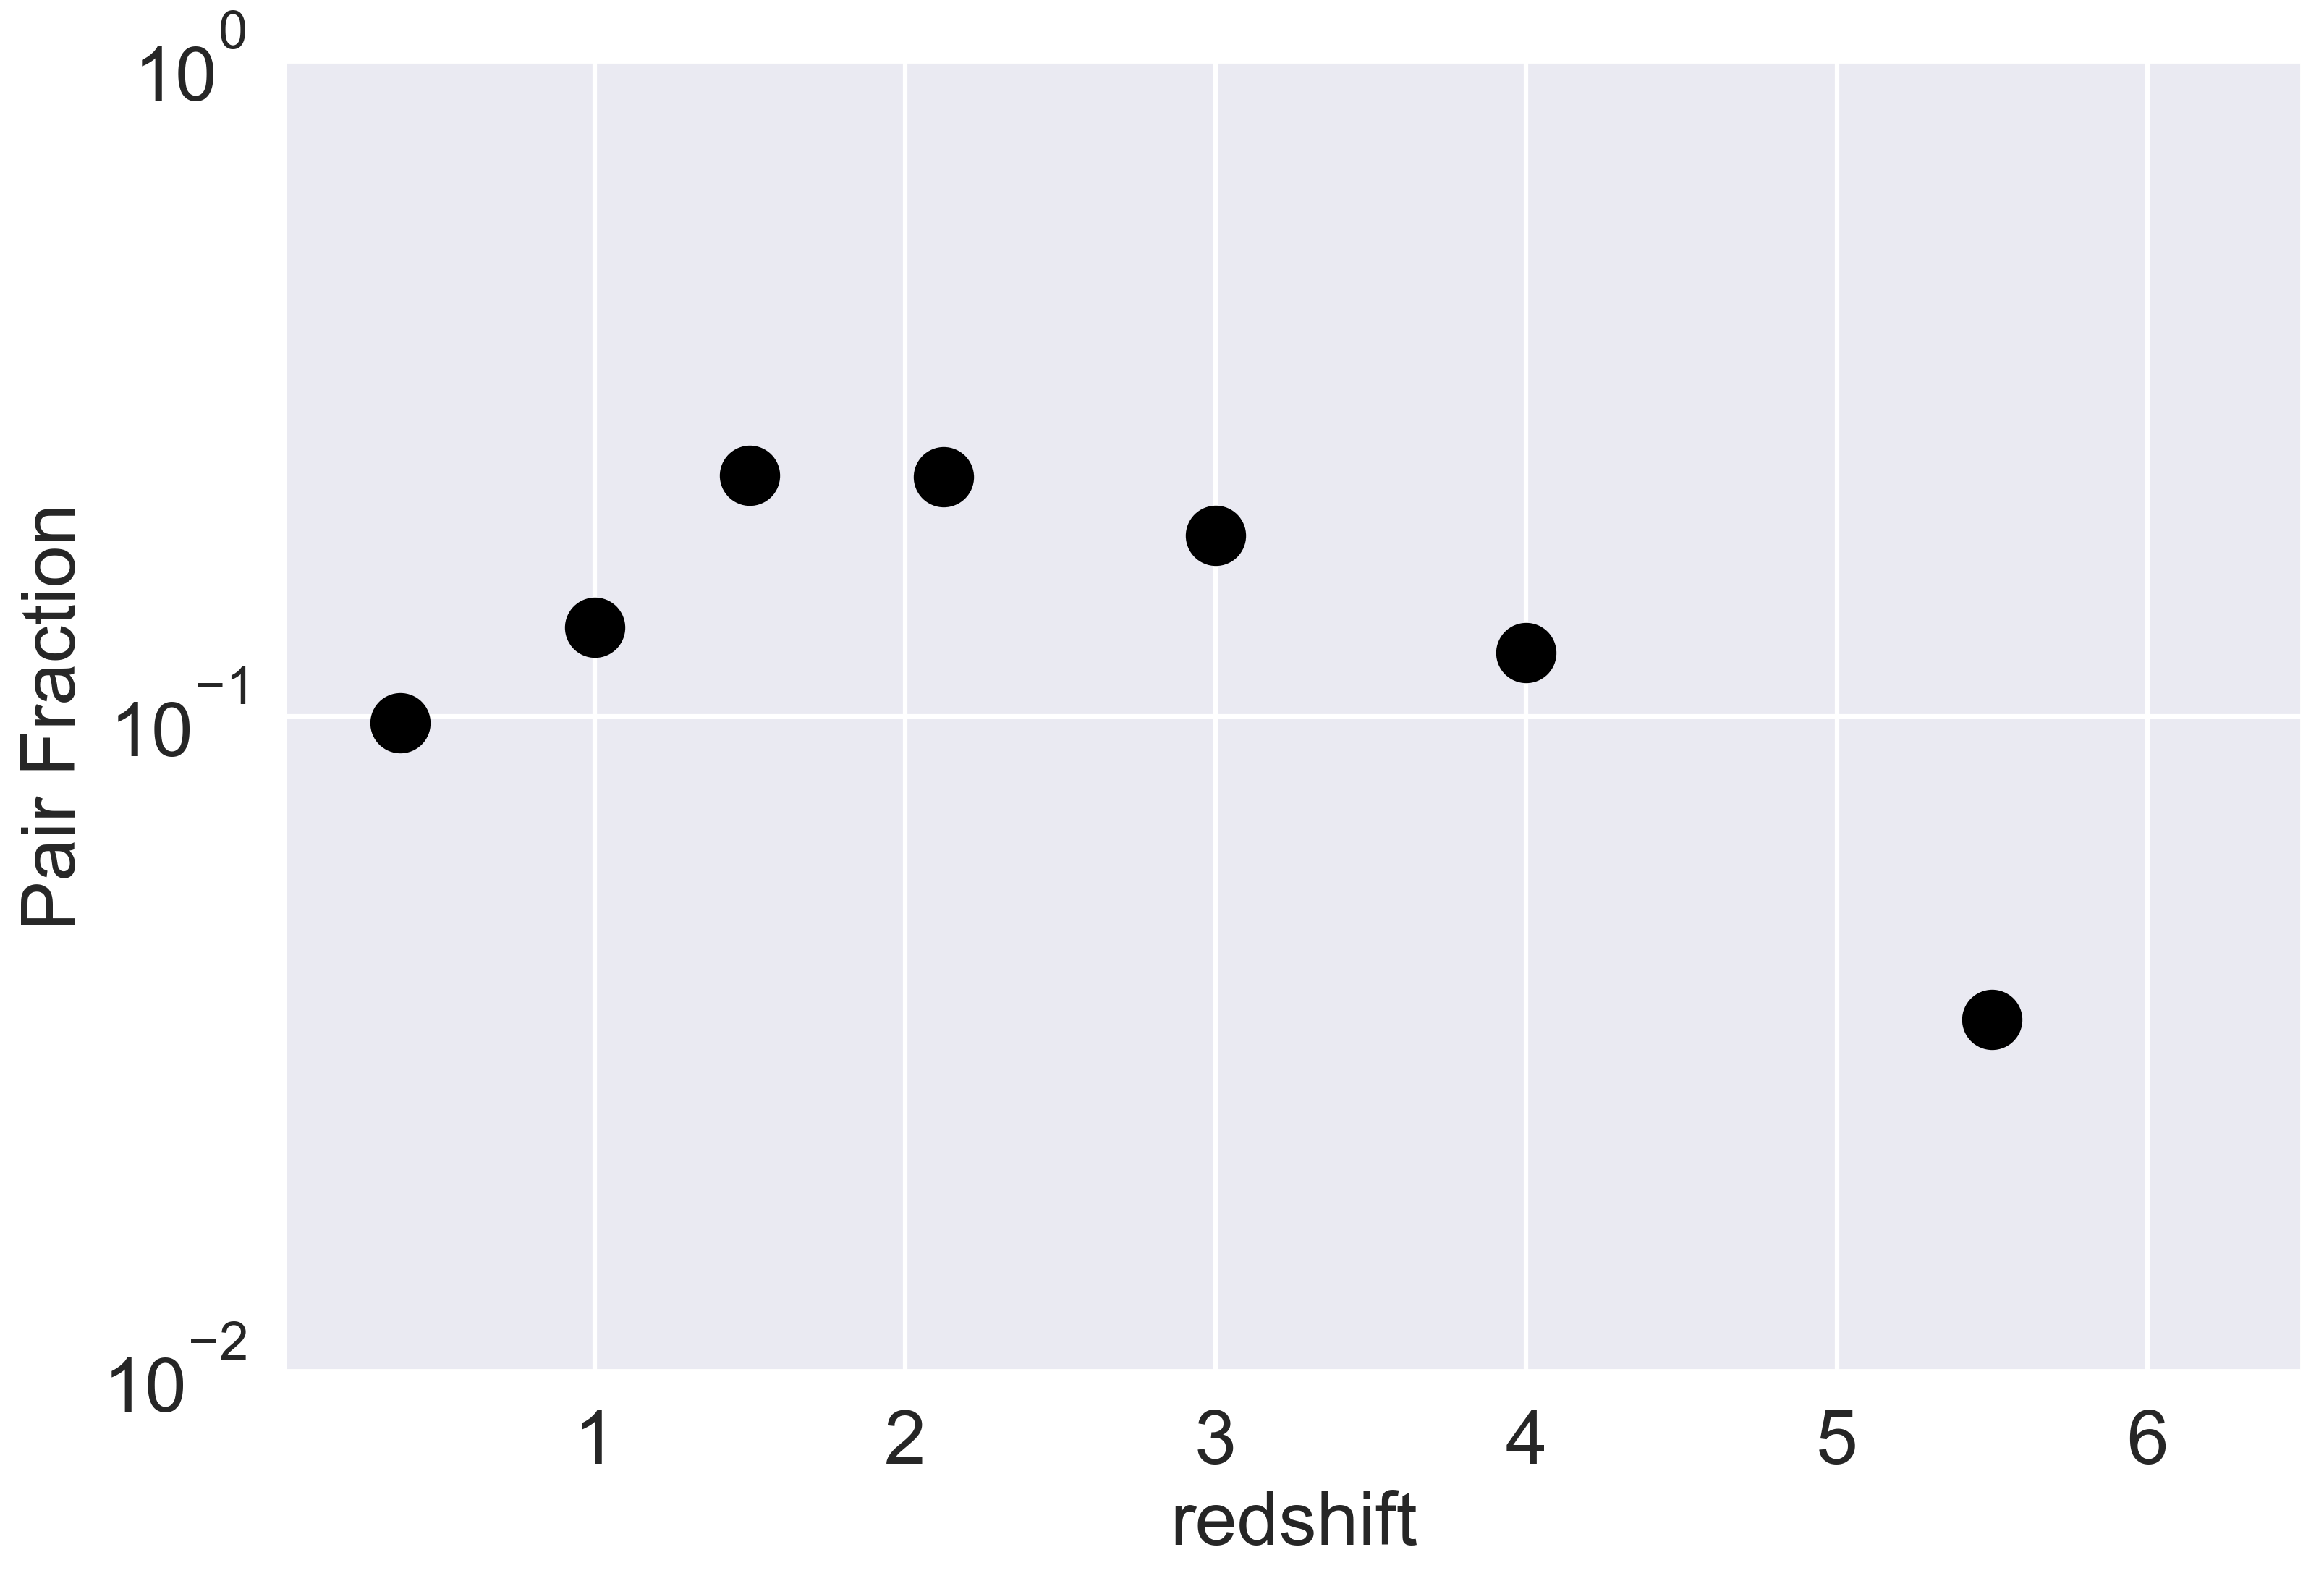

2734 possible primaries found, 58676 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 250
Pairs detected for this bin: 21
Pair fraction for this bin: 0.084
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 663
Pairs detected for this bin: 144
Pair fraction for this bin: 0.2171945701357466
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 675
Pairs detected for this bin: 154
Pair fraction for this bin: 0.22814814814814816
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 726
Pairs detected for this bin: 162
Pair fraction for this bin: 0.2231404958677686
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 316
Pairs detected for this bin: 46
Pair fraction for this bin: 0.14556962025316456
------

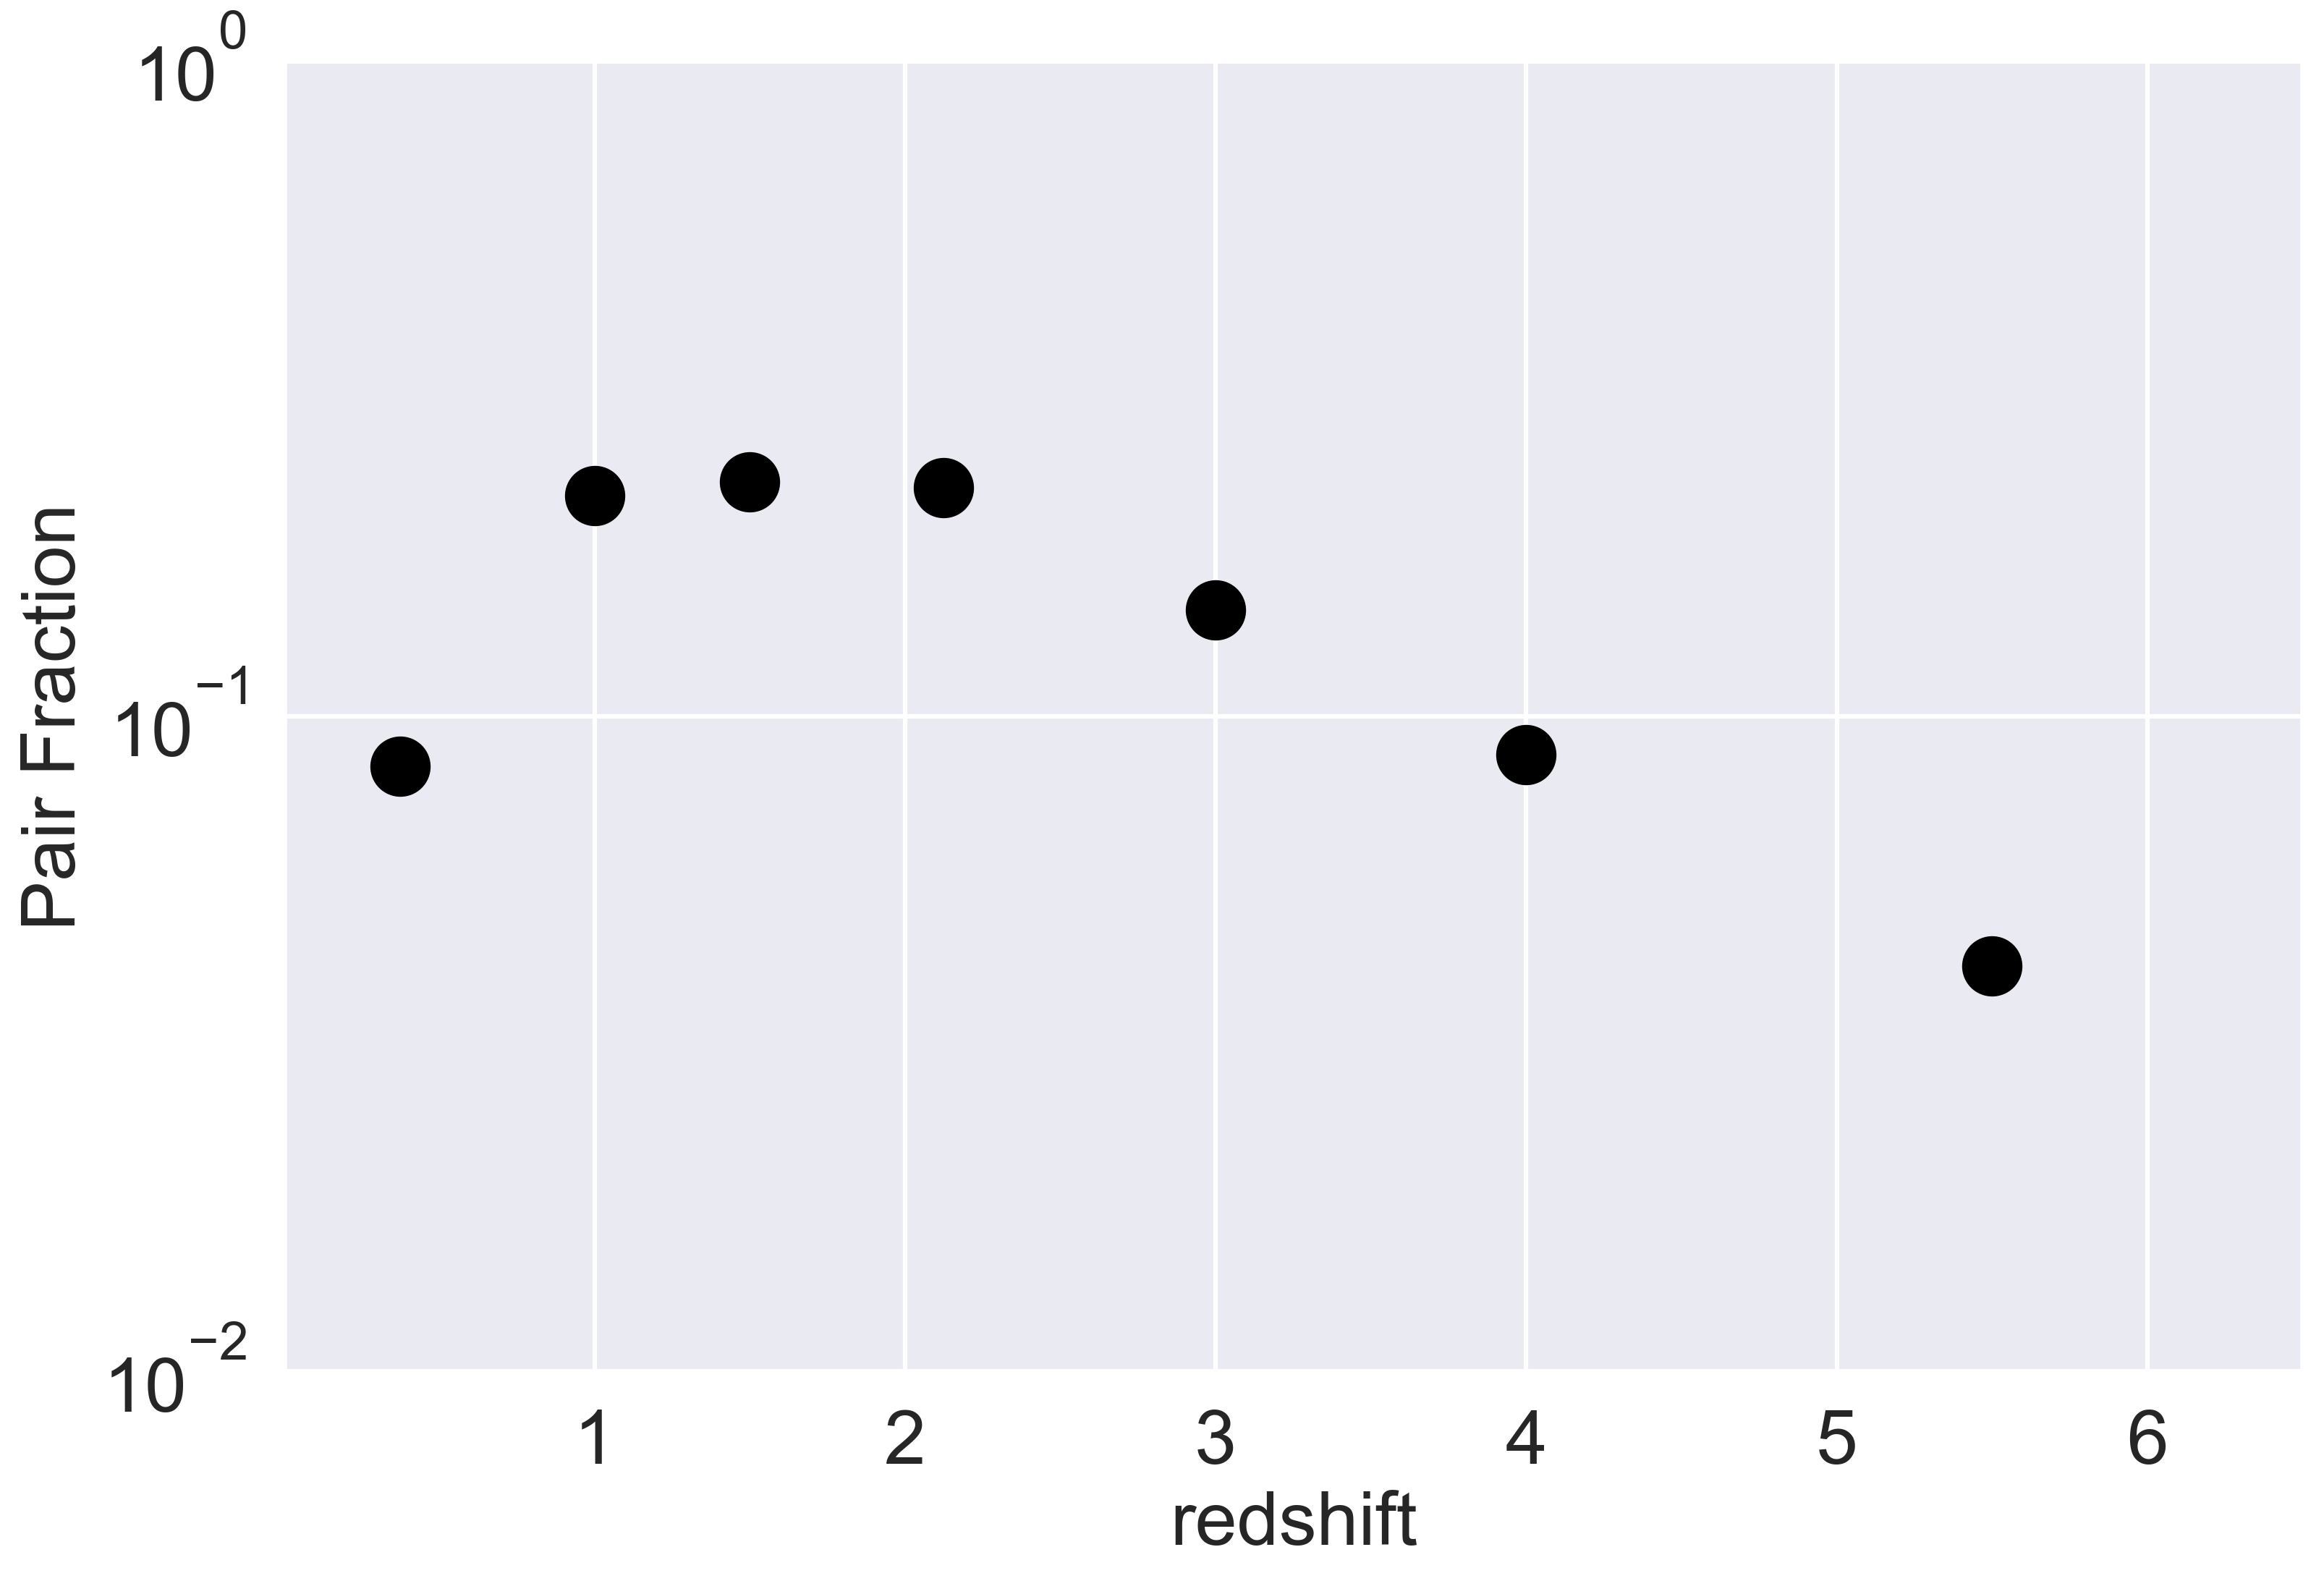

In [23]:
xyz_info = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot1)
yxz_info = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot1)
zyx_info = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot1)

In [13]:
xyz_info01 = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot1,mfrac=0.1)
yxz_info01 = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot1,mfrac=0.1)
zyx_info01 = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot1,mfrac=0.1)

2771 possible primaries found, 59045 possible secondaries found.
2675 possible primaries found, 59409 possible secondaries found.
2734 possible primaries found, 58676 possible secondaries found.


15747 possible primaries found, 124206 possible secondaries found.
15419 possible primaries found, 123389 possible secondaries found.
15502 possible primaries found, 123090 possible secondaries found.
1040 possible primaries found, 26592 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 158
Pairs detected for this bin: 19
Pair fraction for this bin: 0.12025316455696203
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 291
Pairs detected for this bin: 29
Pair fraction for this bin: 0.09965635738831616
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 210
Pairs detected for this bin: 22
Pair fraction for this bin: 0.10476190476190476
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 231
Pairs detected for this bin: 27
Pair fraction for this bin: 0.116883

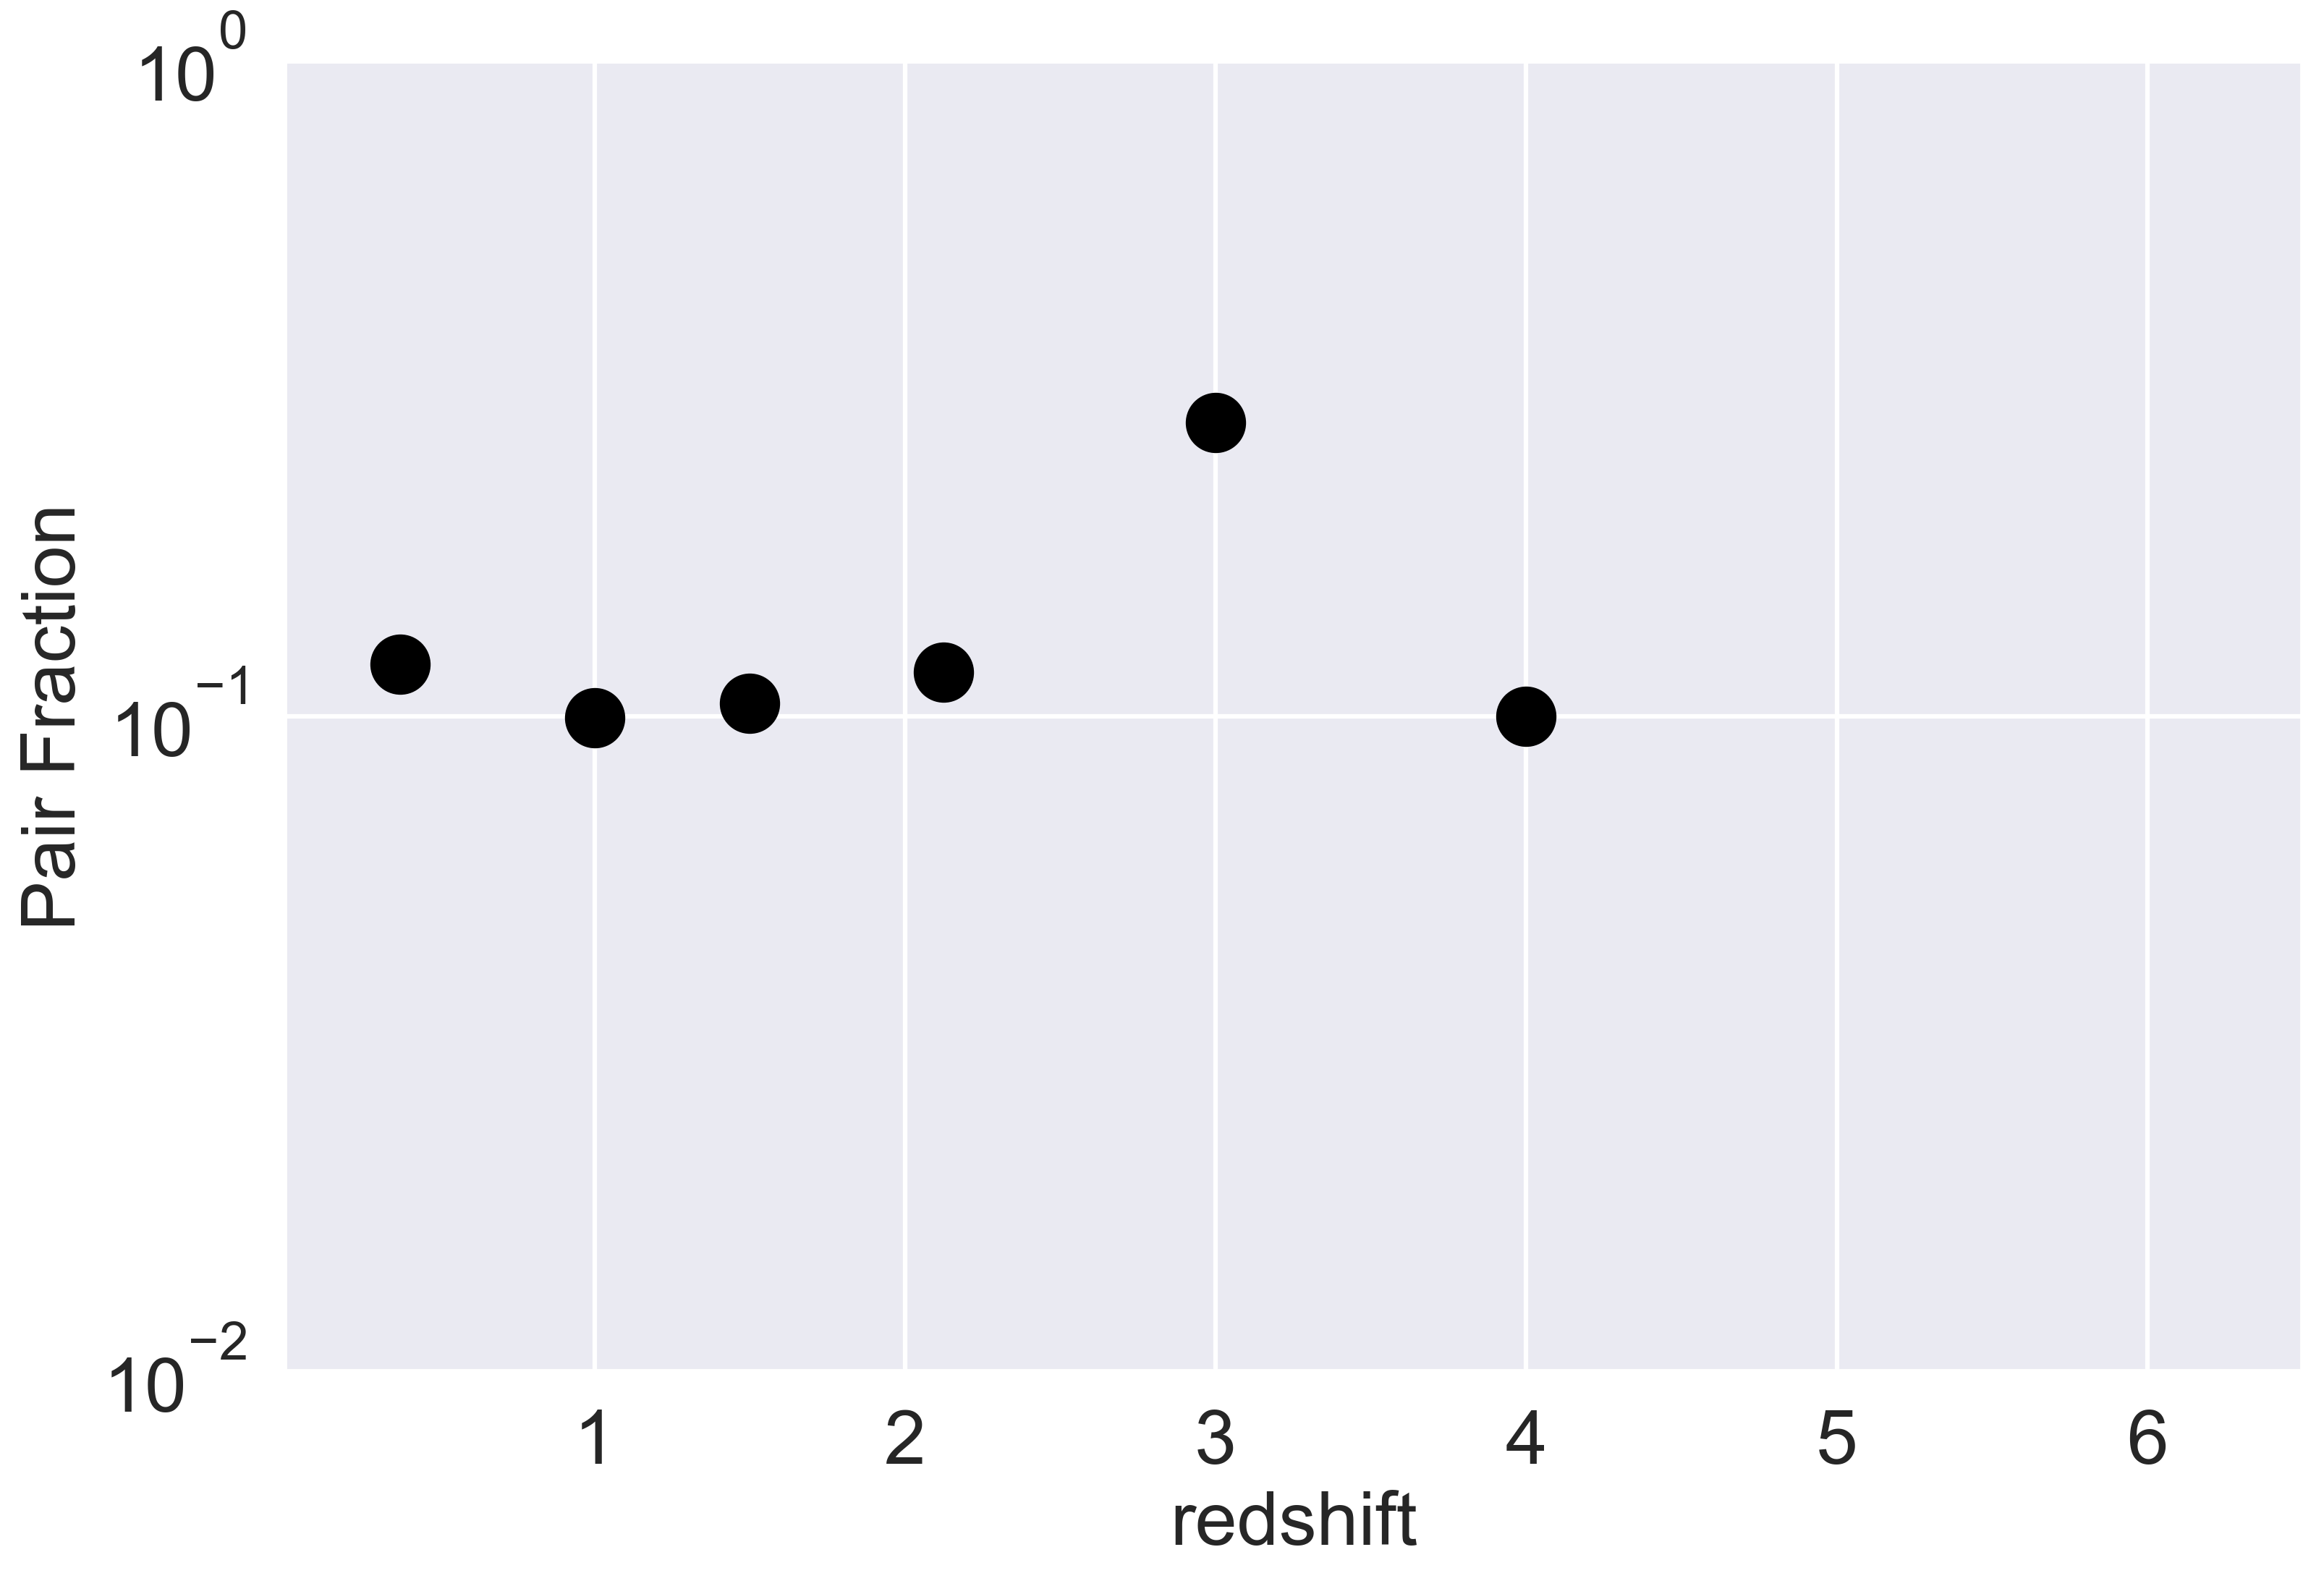

1209 possible primaries found, 27093 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 278
Pairs detected for this bin: 29
Pair fraction for this bin: 0.10431654676258993
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 208
Pairs detected for this bin: 21
Pair fraction for this bin: 0.10096153846153846
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 293
Pairs detected for this bin: 34
Pair fraction for this bin: 0.11604095563139932
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 248
Pairs detected for this bin: 23
Pair fraction for this bin: 0.09274193548387097
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 162
Pairs detected for this bin: 19
Pair fraction for this bin: 0.11728395061

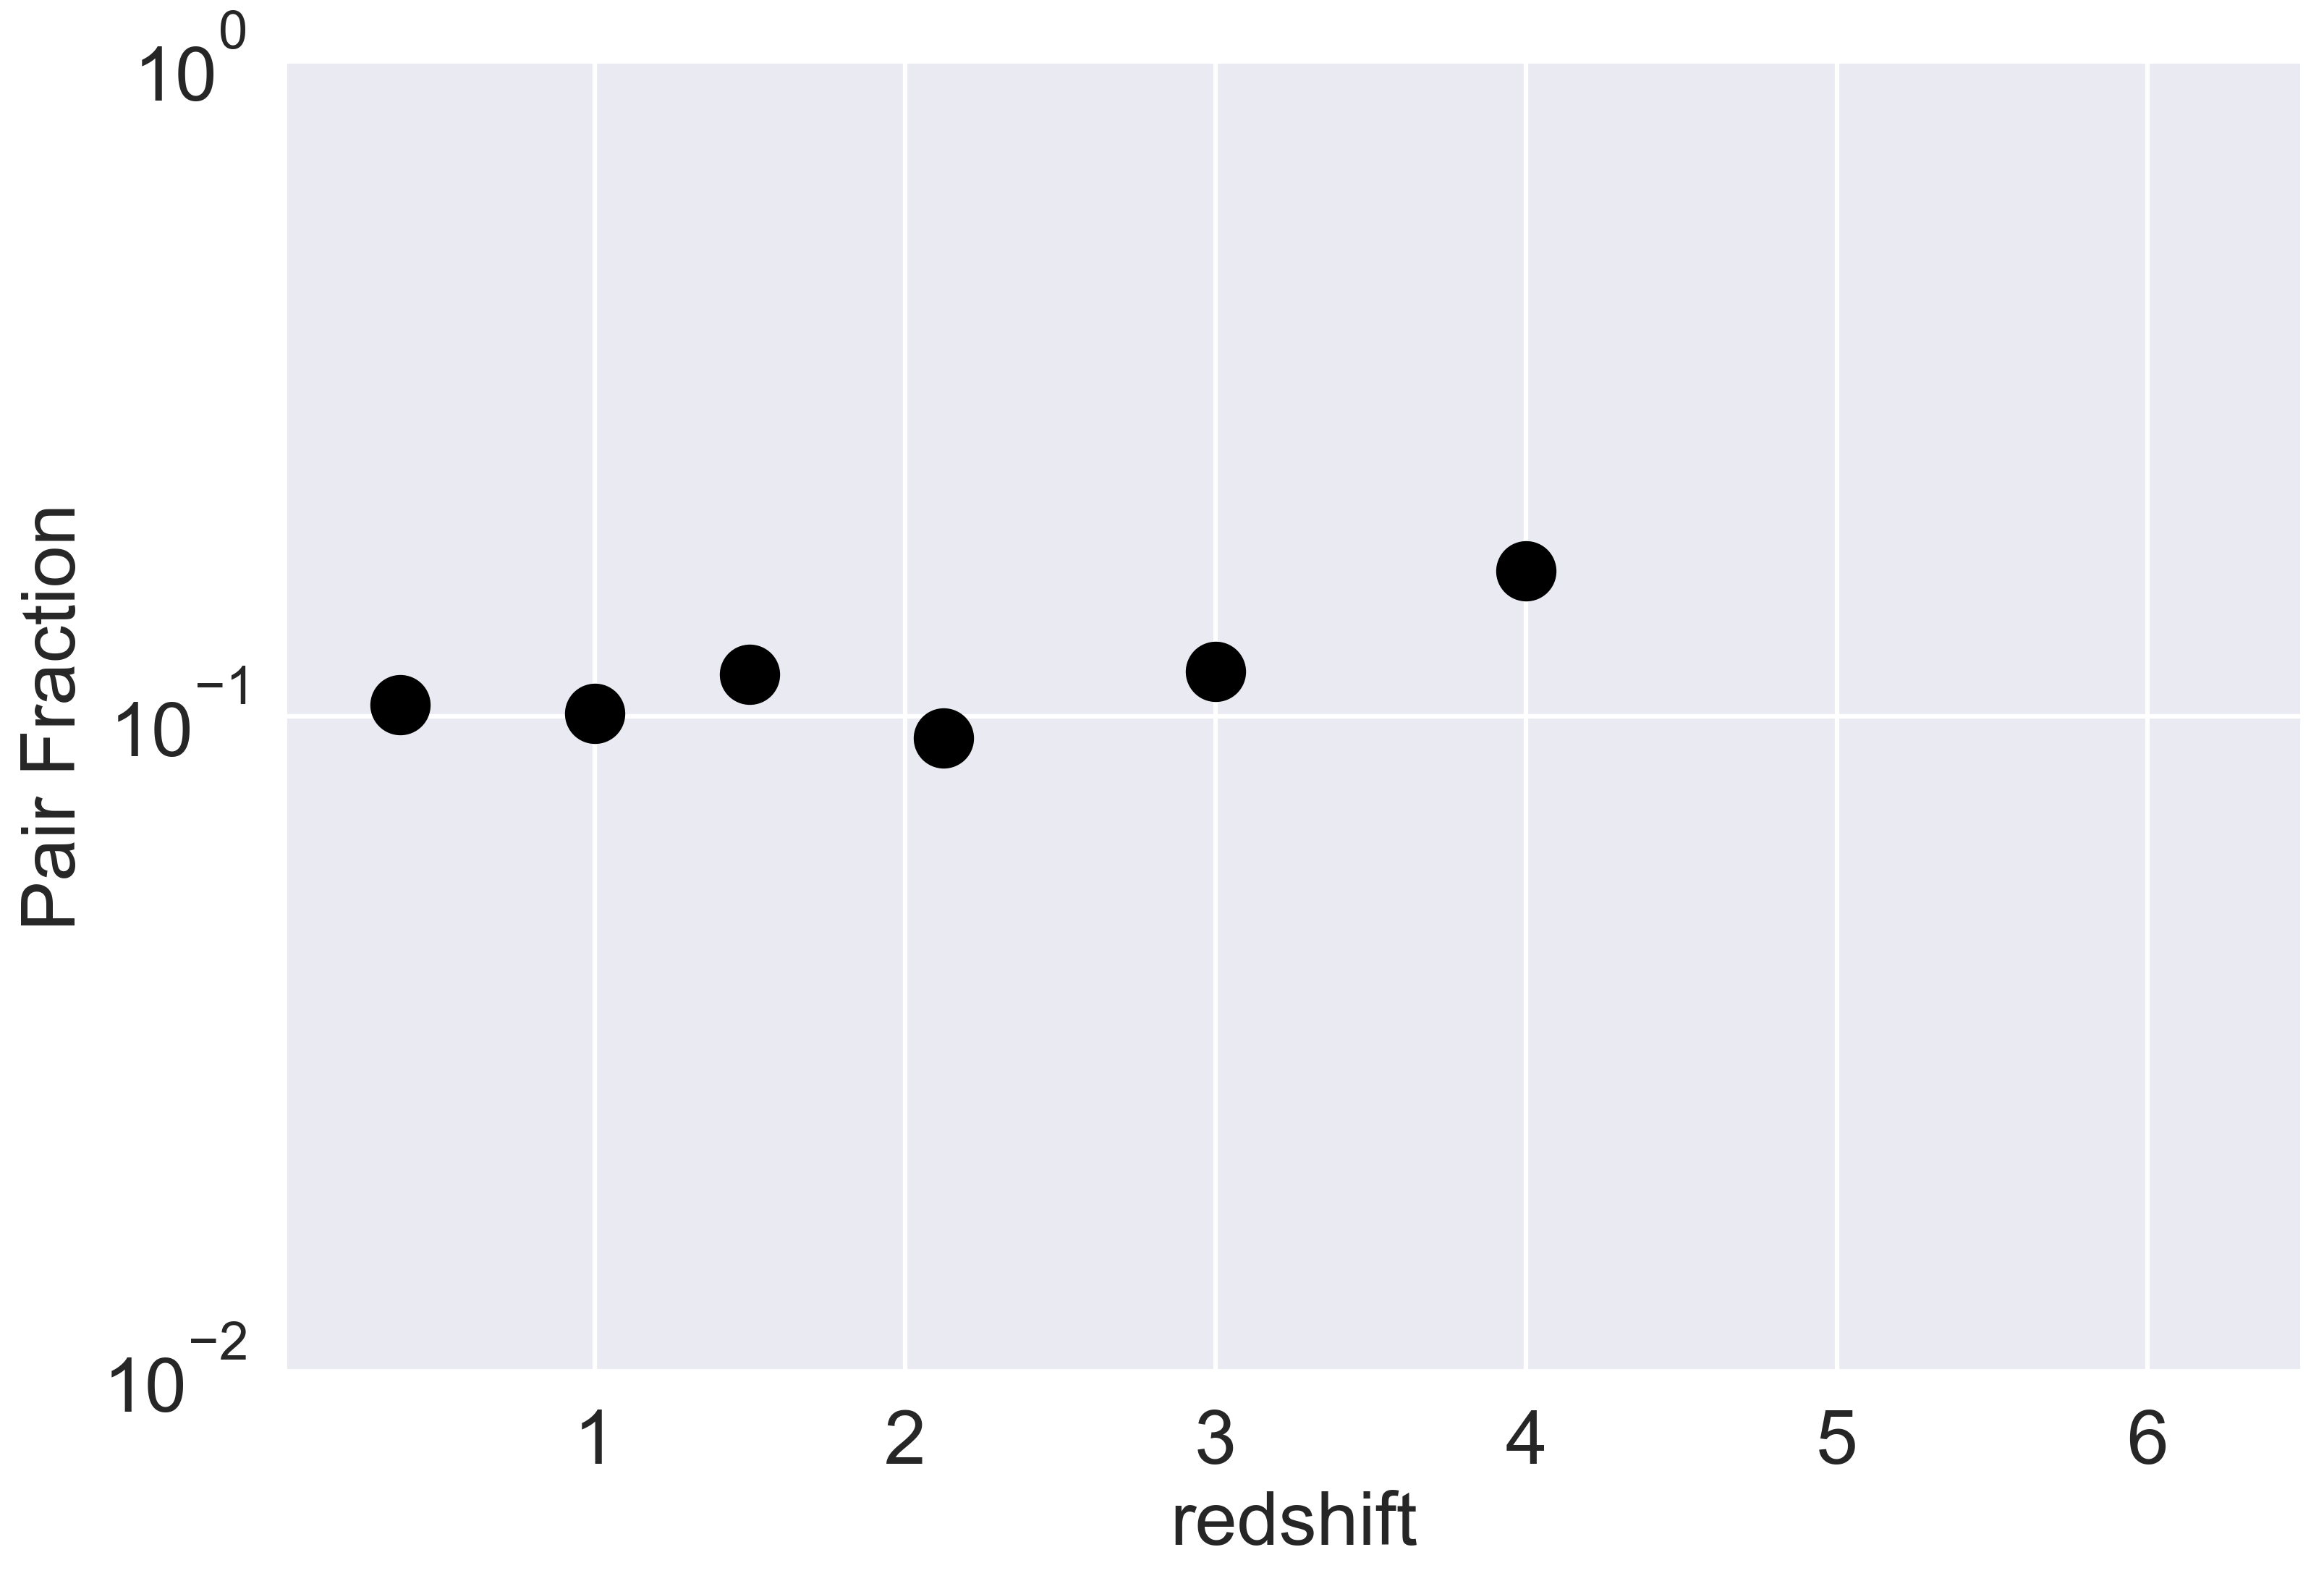

1089 possible primaries found, 26250 possible secondaries found.
Current redshift bin: (0.001, 0.75)
Primaries detected for this bin: 158
Pairs detected for this bin: 16
Pair fraction for this bin: 0.10126582278481013
---------------------------------------------
Current redshift bin: (0.75, 1.25)
Primaries detected for this bin: 226
Pairs detected for this bin: 23
Pair fraction for this bin: 0.10176991150442478
---------------------------------------------
Current redshift bin: (1.25, 1.75)
Primaries detected for this bin: 297
Pairs detected for this bin: 41
Pair fraction for this bin: 0.13804713804713806
---------------------------------------------
Current redshift bin: (1.75, 2.5)
Primaries detected for this bin: 298
Pairs detected for this bin: 37
Pair fraction for this bin: 0.12416107382550336
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 93
Pairs detected for this bin: 14
Pair fraction for this bin: 0.150537634408

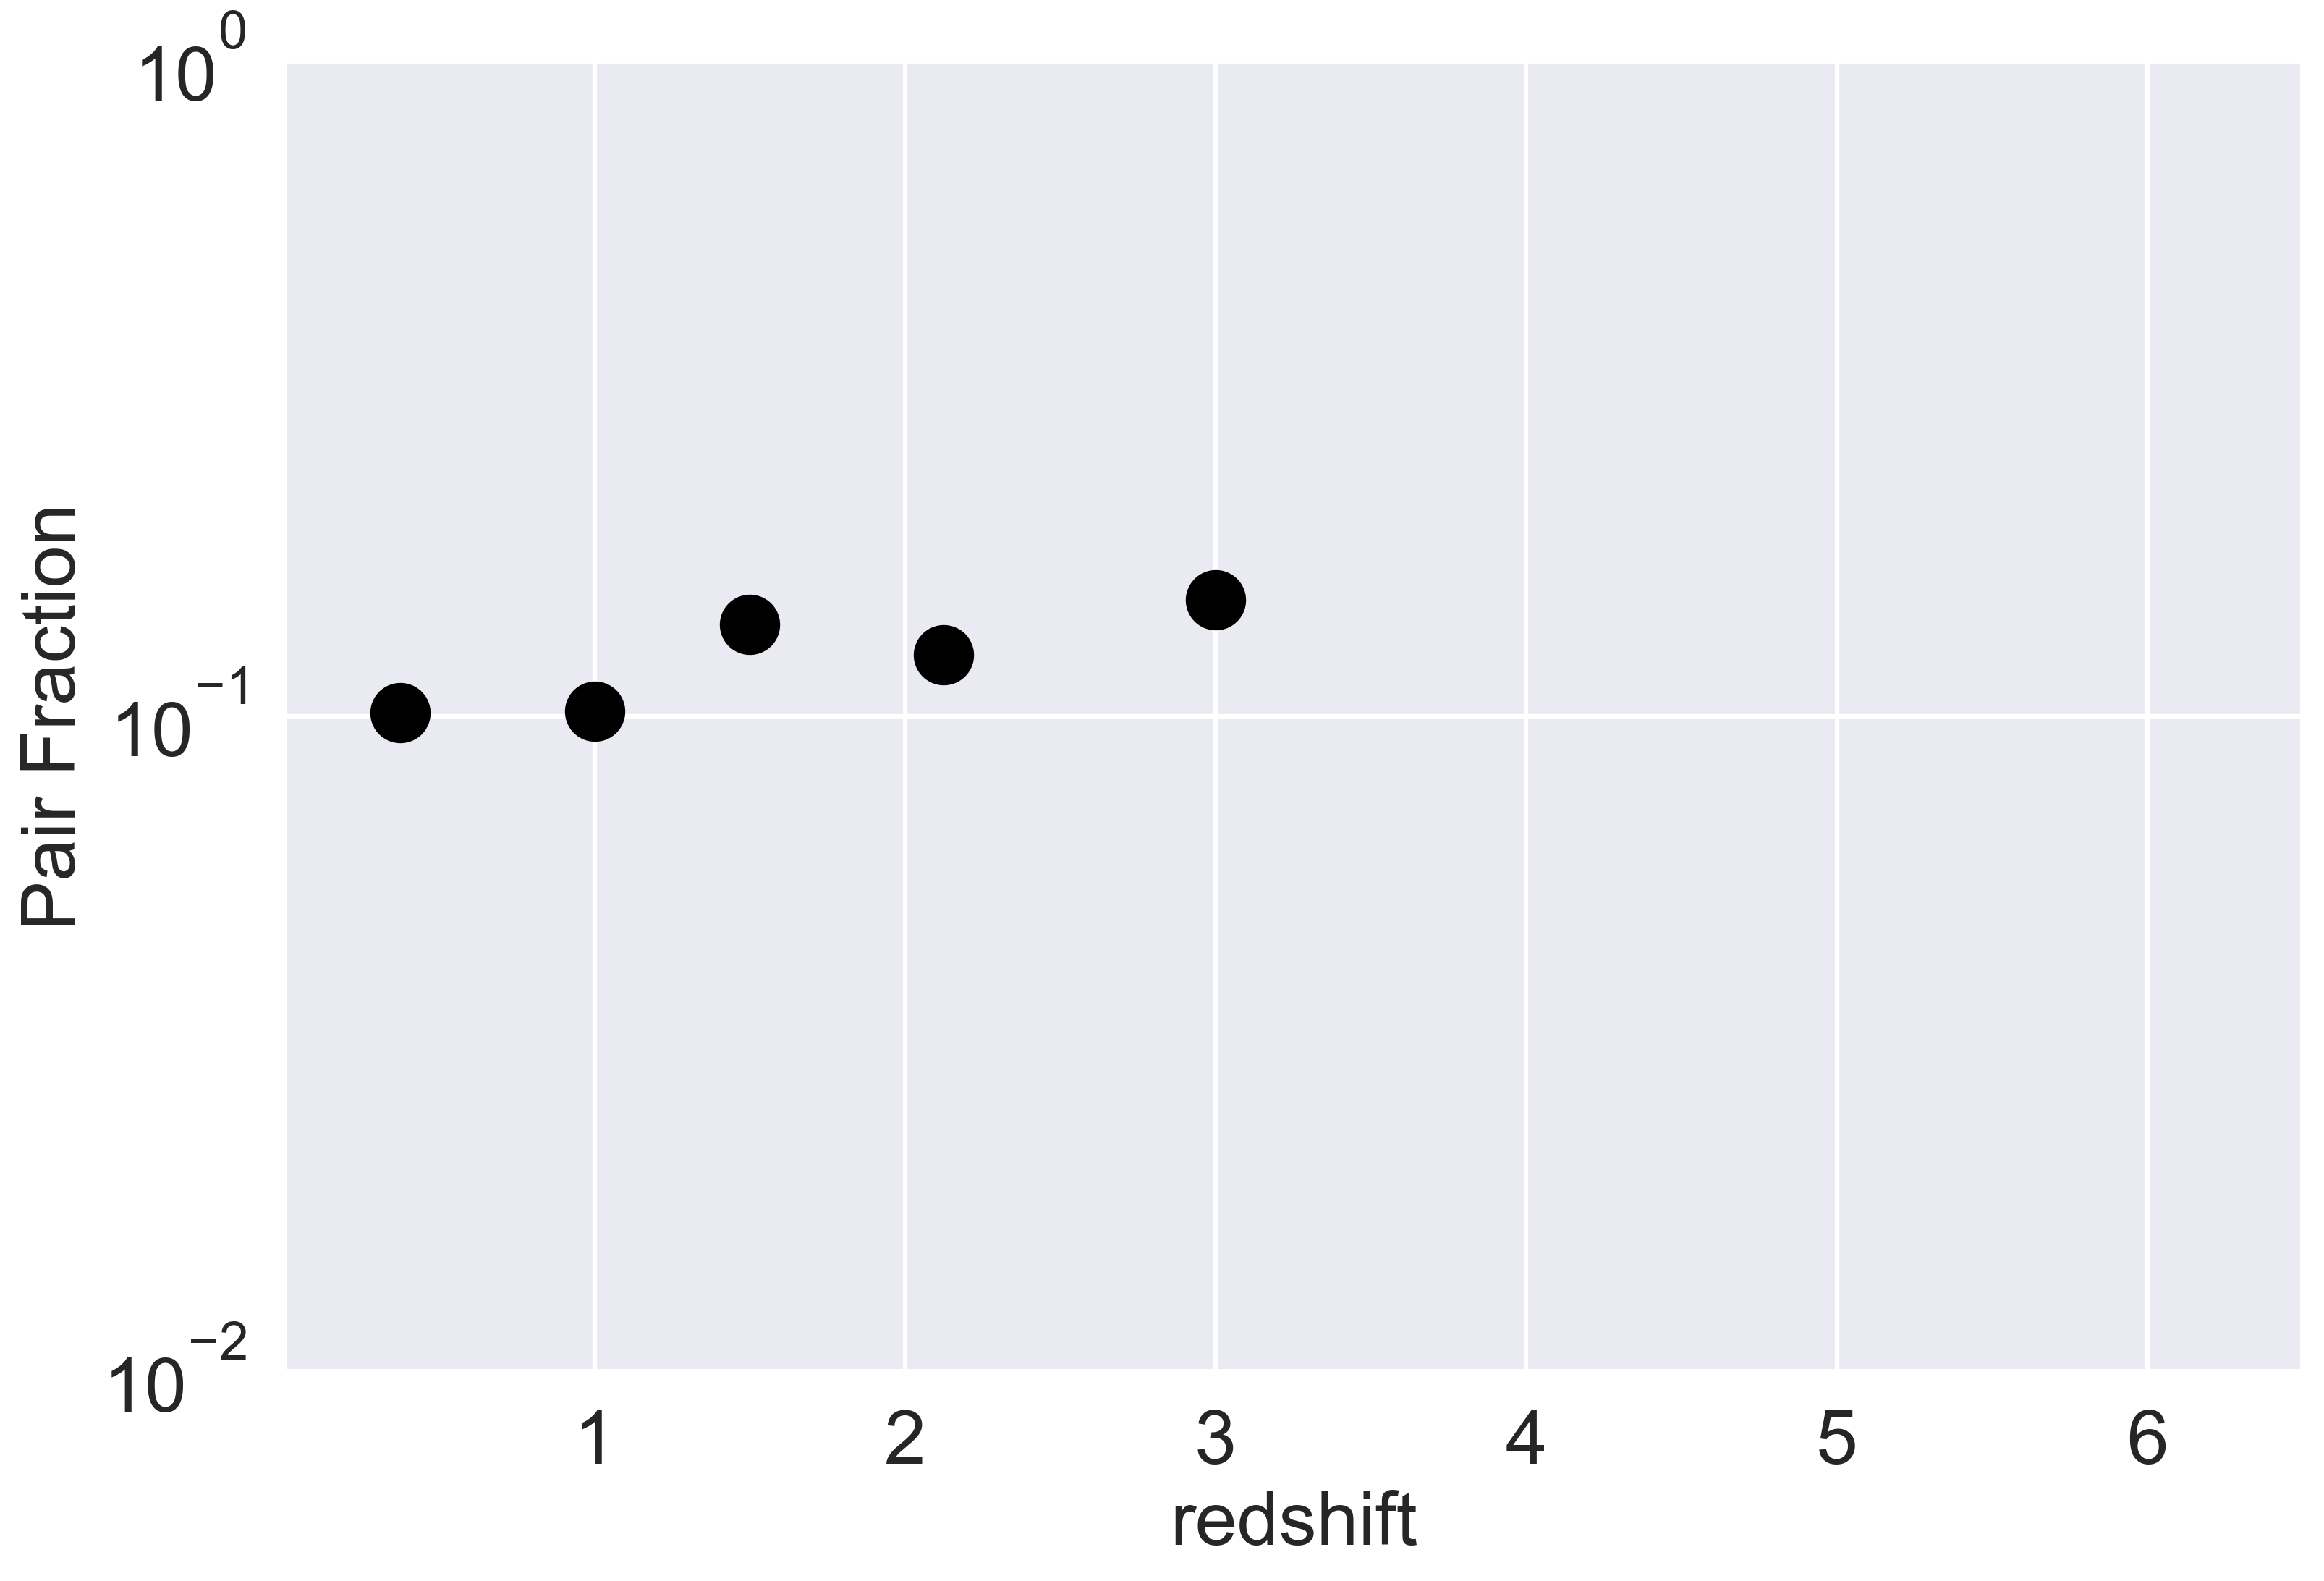

In [14]:
xyz_inforeduced = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot1,primary_mass=10**9.3)
yxz_inforeduced = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot1,primary_mass=10**9.3)
zyx_inforeduced = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot1,primary_mass=10**9.3)

xyz_infoil1 = pairs_plots(il1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot1)
yxz_infoil1 = pairs_plots(il1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot1)
zyx_infoil1 = pairs_plots(il1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot1)

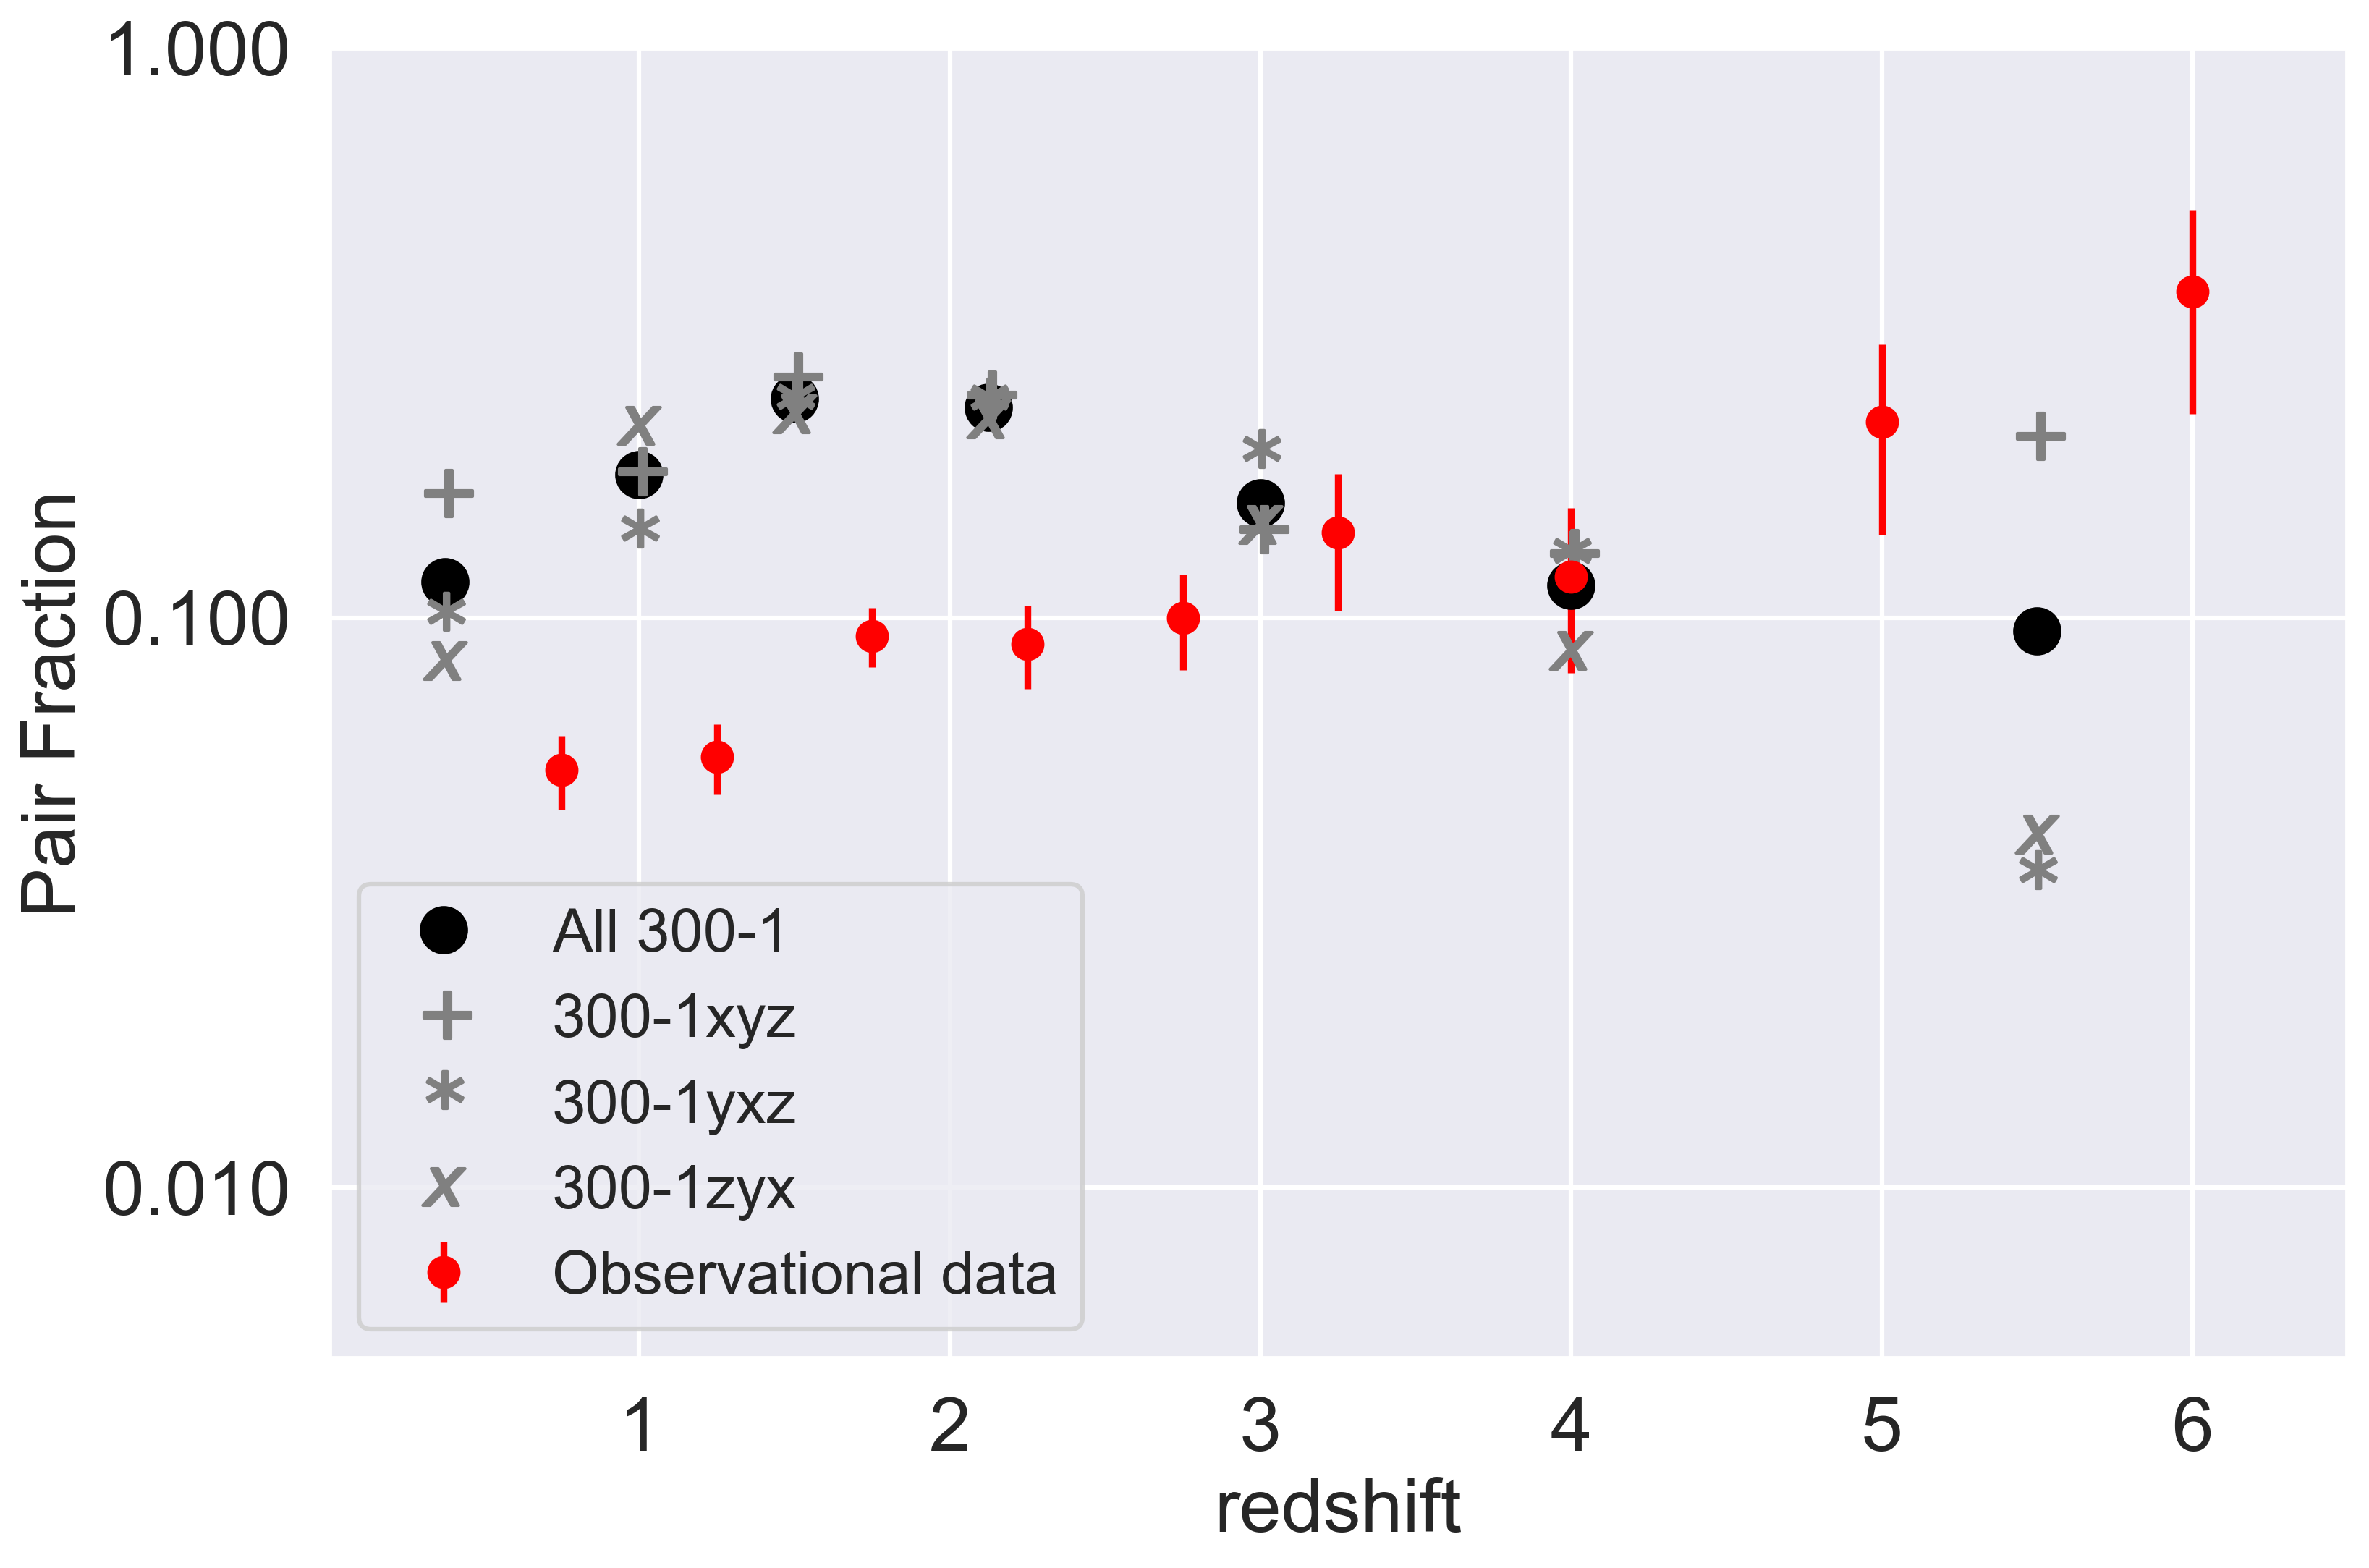

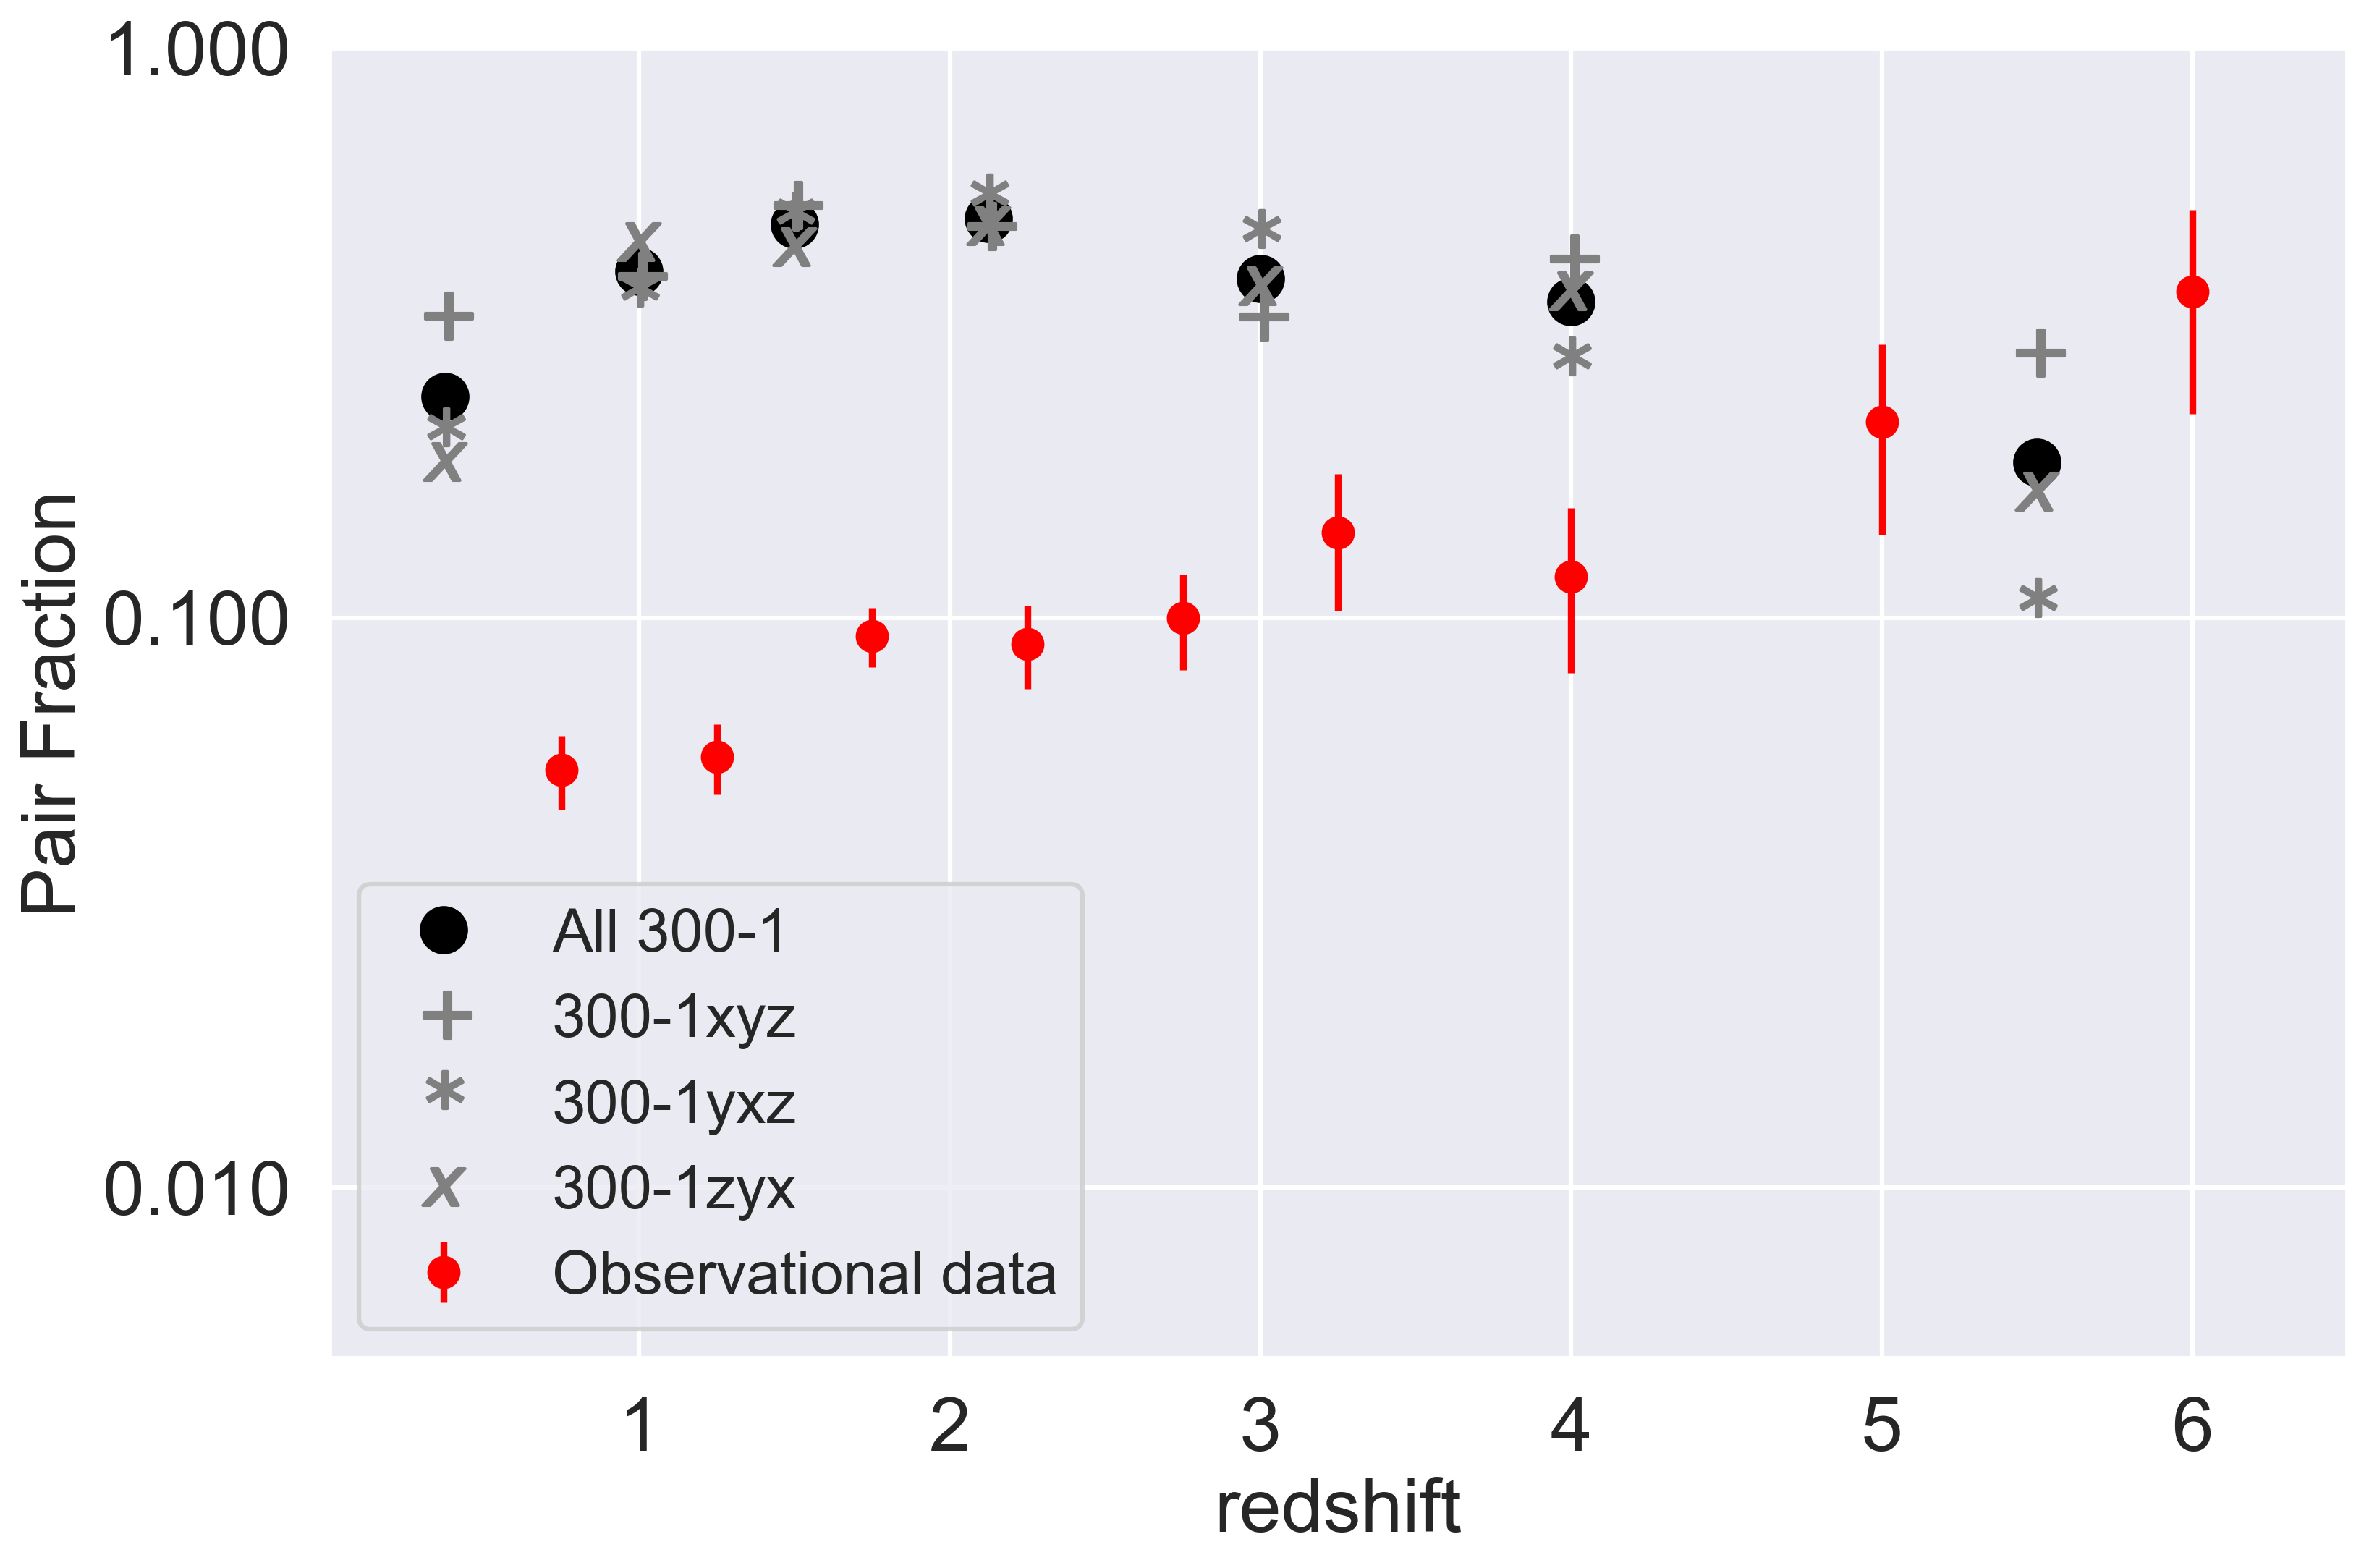

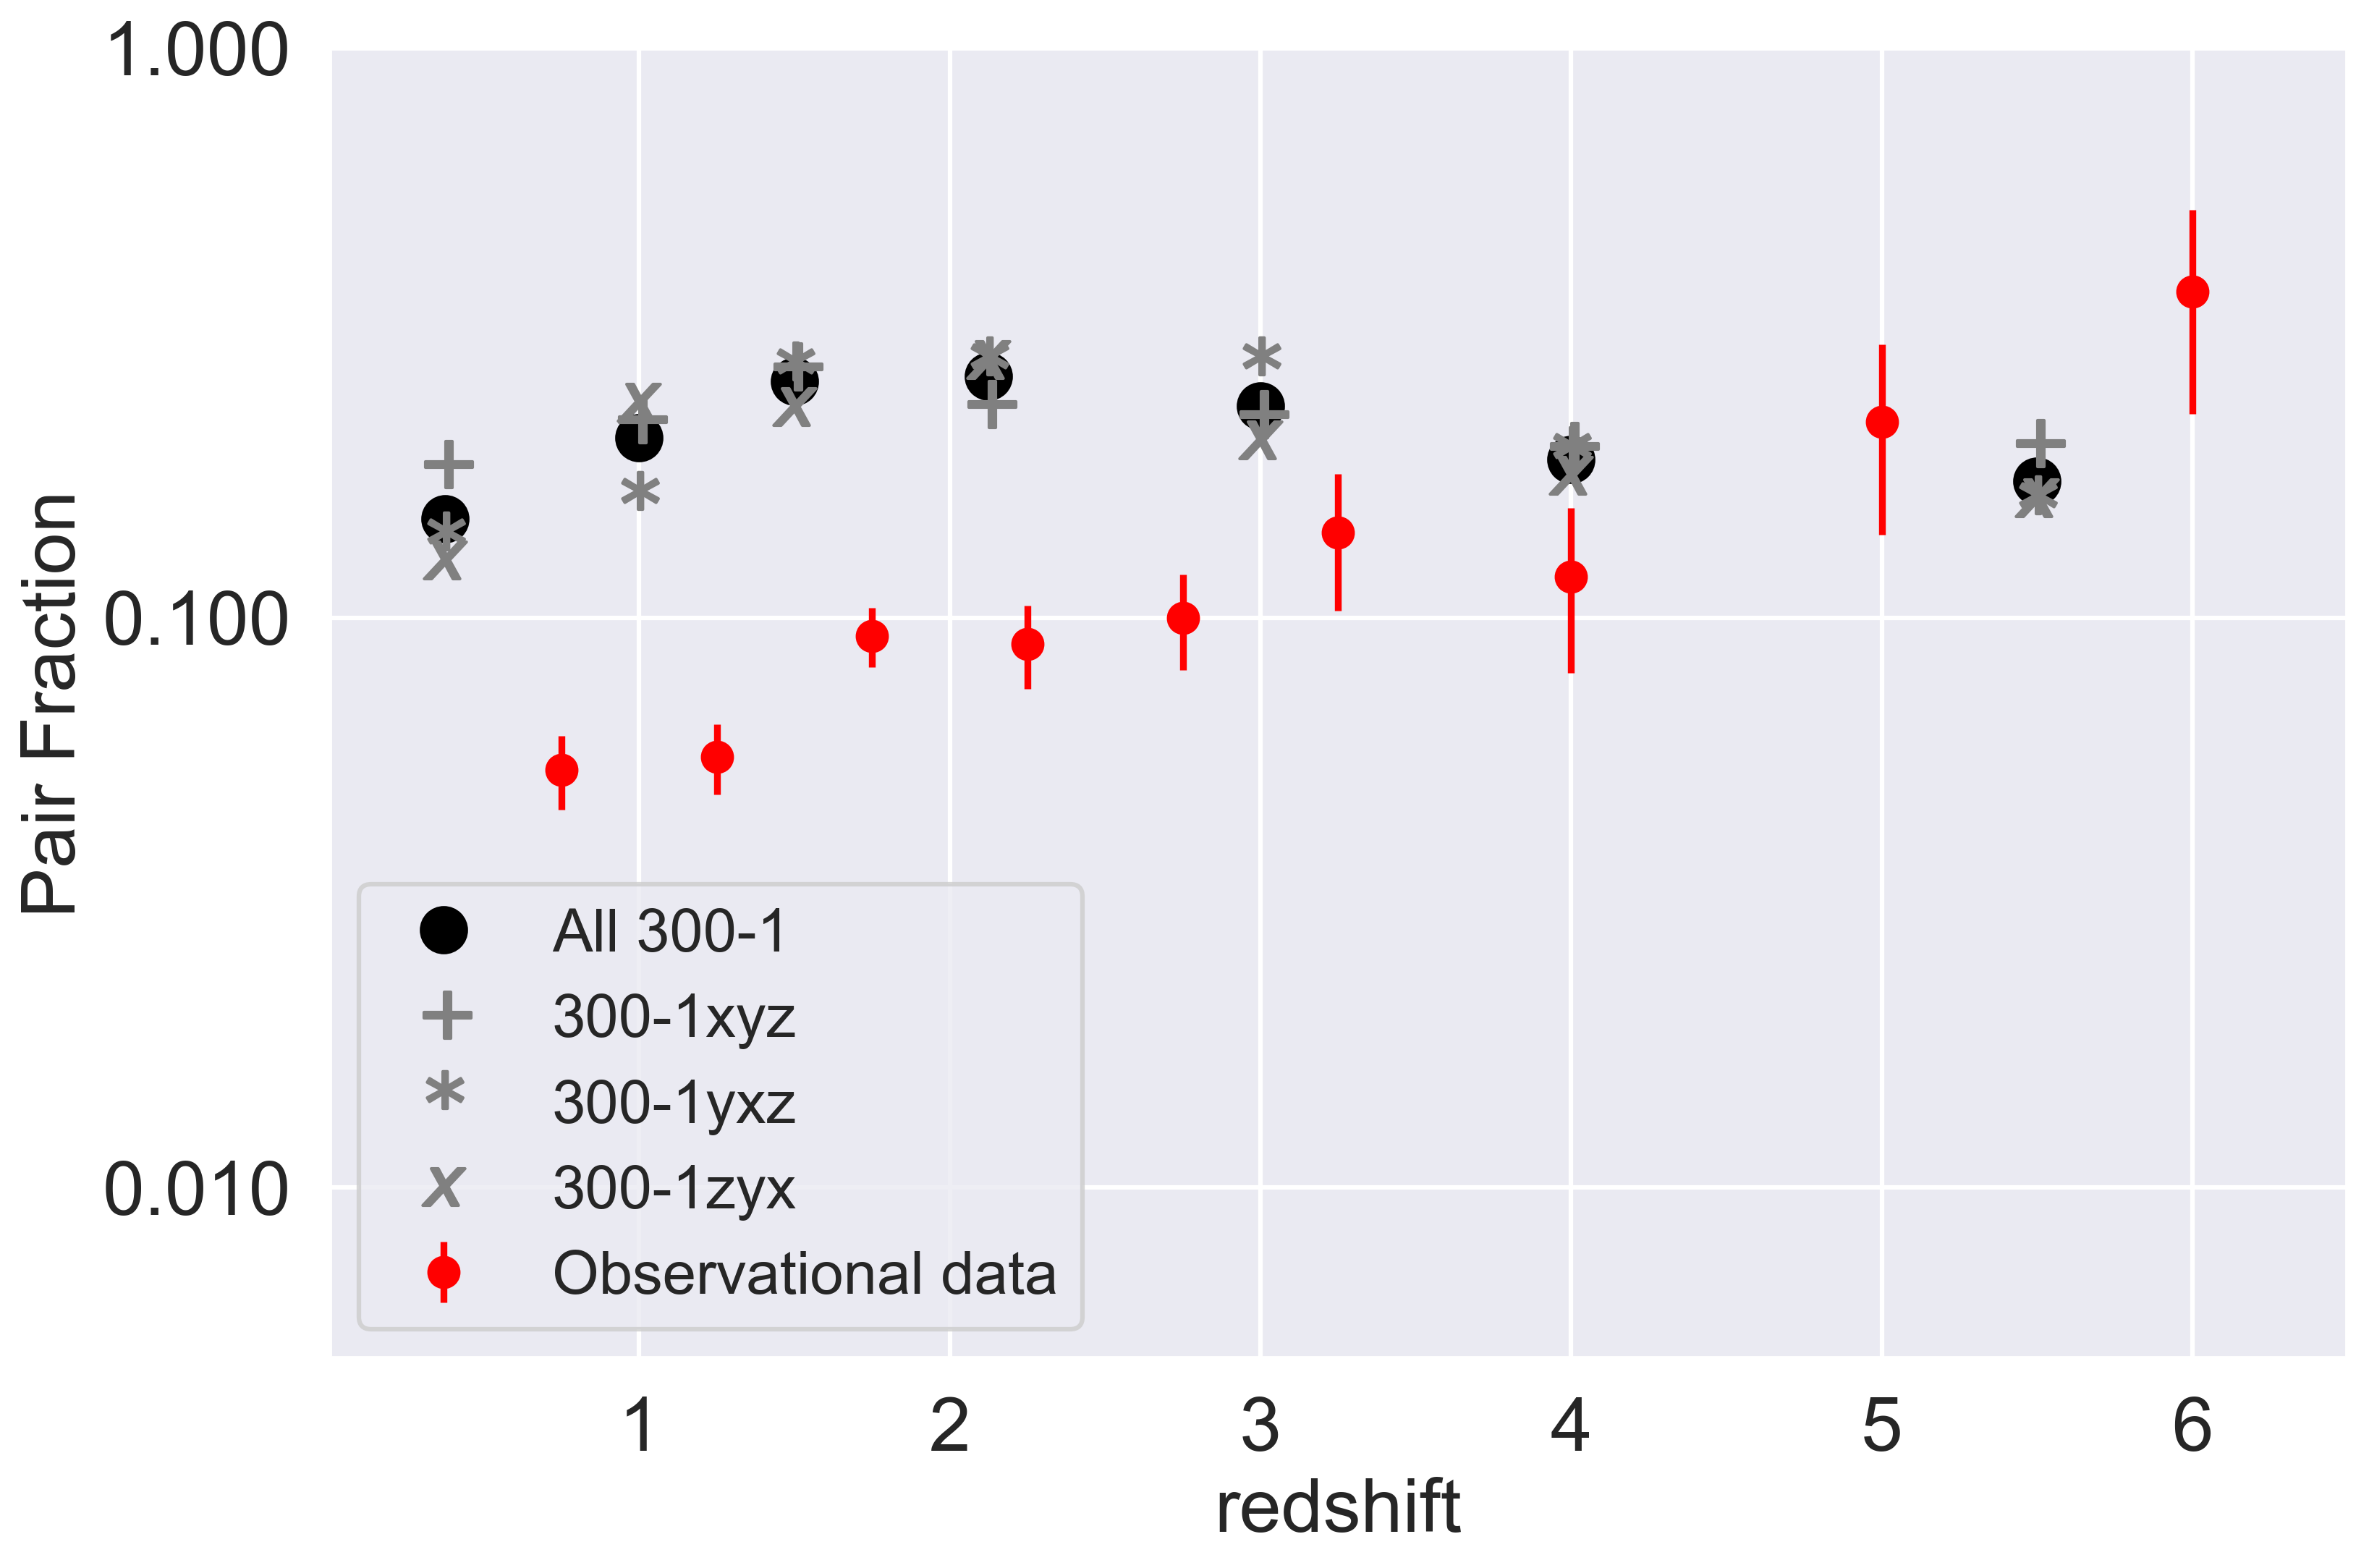

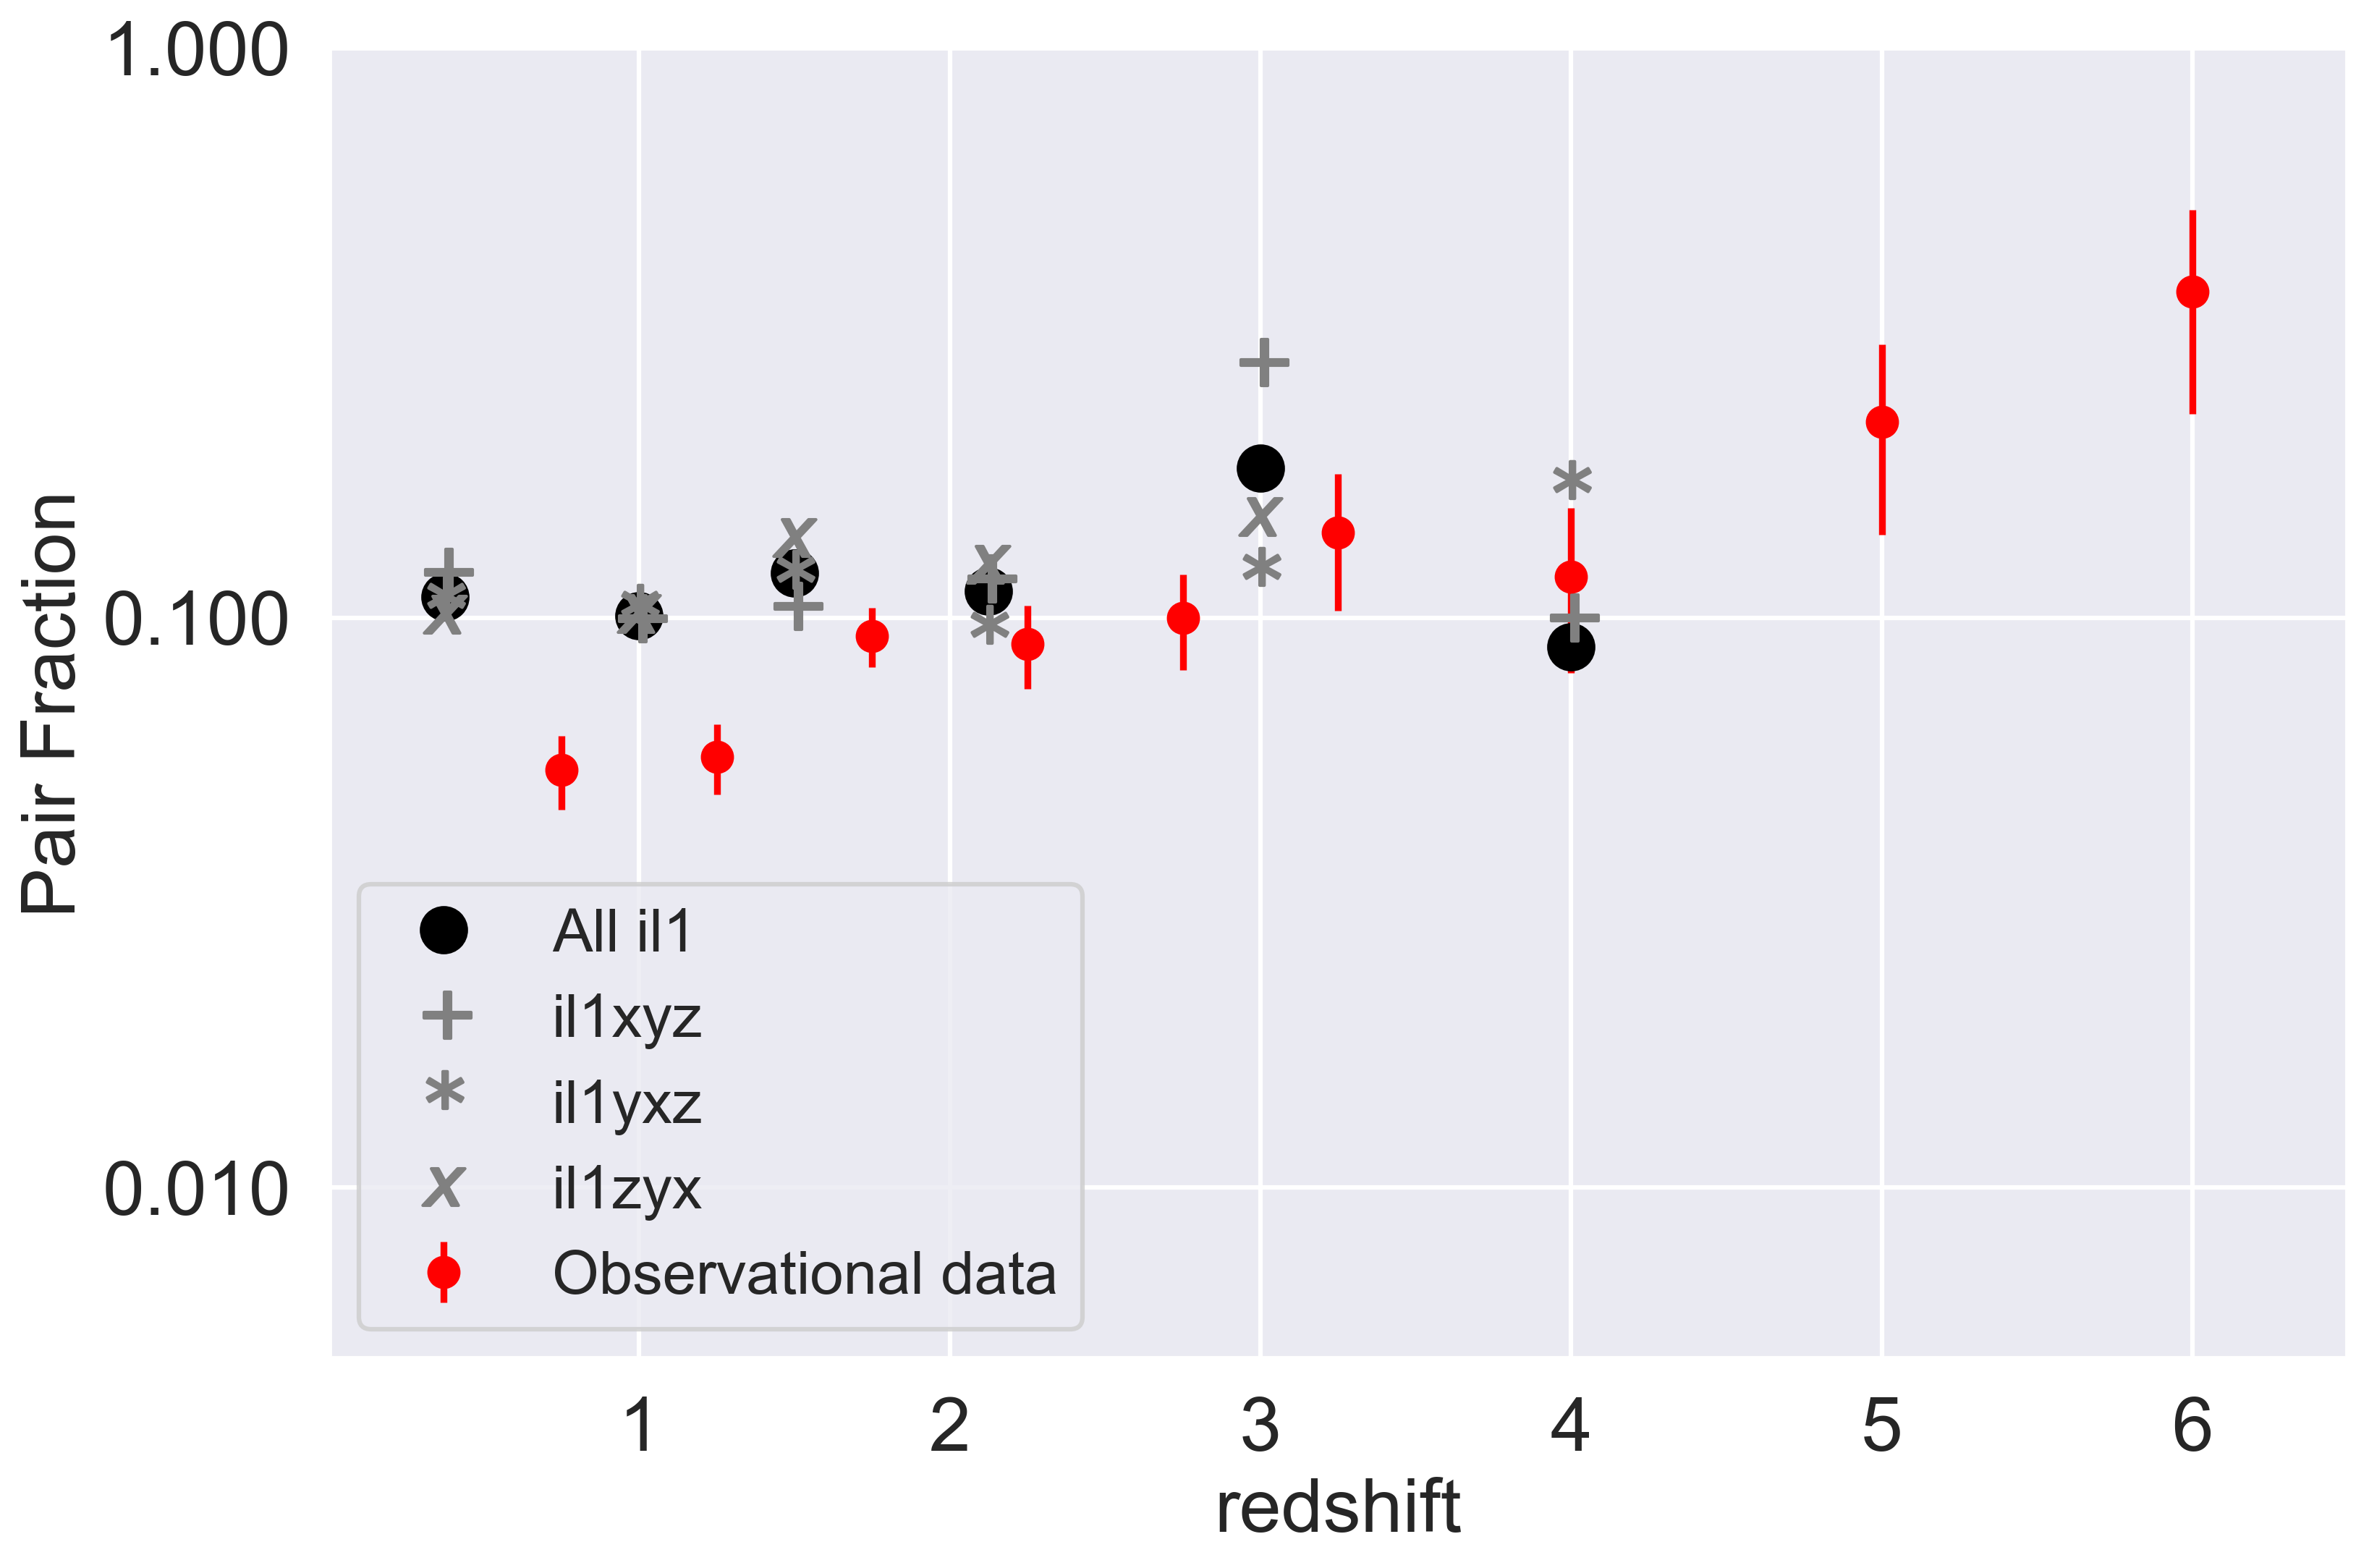

In [15]:
all_ = all_plot(xyz_info,yxz_info,zyx_info,obs=obs_info,save=True)
all01 = all_plot(xyz_info01, yxz_info01, zyx_info01, obs=obs_info)
allreduced = all_plot(xyz_inforeduced,yxz_inforeduced,zyx_inforeduced,obs=obs_info)
allil1 = all_plot(xyz_infoil1,yxz_infoil1,zyx_infoil1, obs=obs_info)

In [16]:
bins_for_plot2 = ((0.00001,0.5),(0.5,1.0),(1.0,1.5),(1.5,2.0),(2.5,3.5),(3.5,4.5),(4.5,6.5))

In [21]:
xyz_info2 = pairs_plots(dash1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot2)
yxz_info2 = pairs_plots(dash1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot2)
zyx_info2 = pairs_plots(dash1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot2)

xyz_infoil1_2 = pairs_plots(il1xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot2)
yxz_infoil1_2 = pairs_plots(il1yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot2)
zyx_infoil1_2 = pairs_plots(il1zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',zbins=bins_for_plot2)

xyz_infoil2 = pairs_plots(il2xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot2)
yxz_infoil2 = pairs_plots(il2yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot2)
zyx_infoil2 = pairs_plots(il2zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot2)

1224 possible primaries found, 31349 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 26
Pairs detected for this bin: 0
Pair fraction for this bin: 0.0
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 276
Pairs detected for this bin: 38
Pair fraction for this bin: 0.13768115942028986
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 320
Pairs detected for this bin: 59
Pair fraction for this bin: 0.184375
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 199
Pairs detected for this bin: 27
Pair fraction for this bin: 0.135678391959799
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 157
Pairs detected for this bin: 45
Pair fraction for this bin: 0.28662420382165604
------------------------------

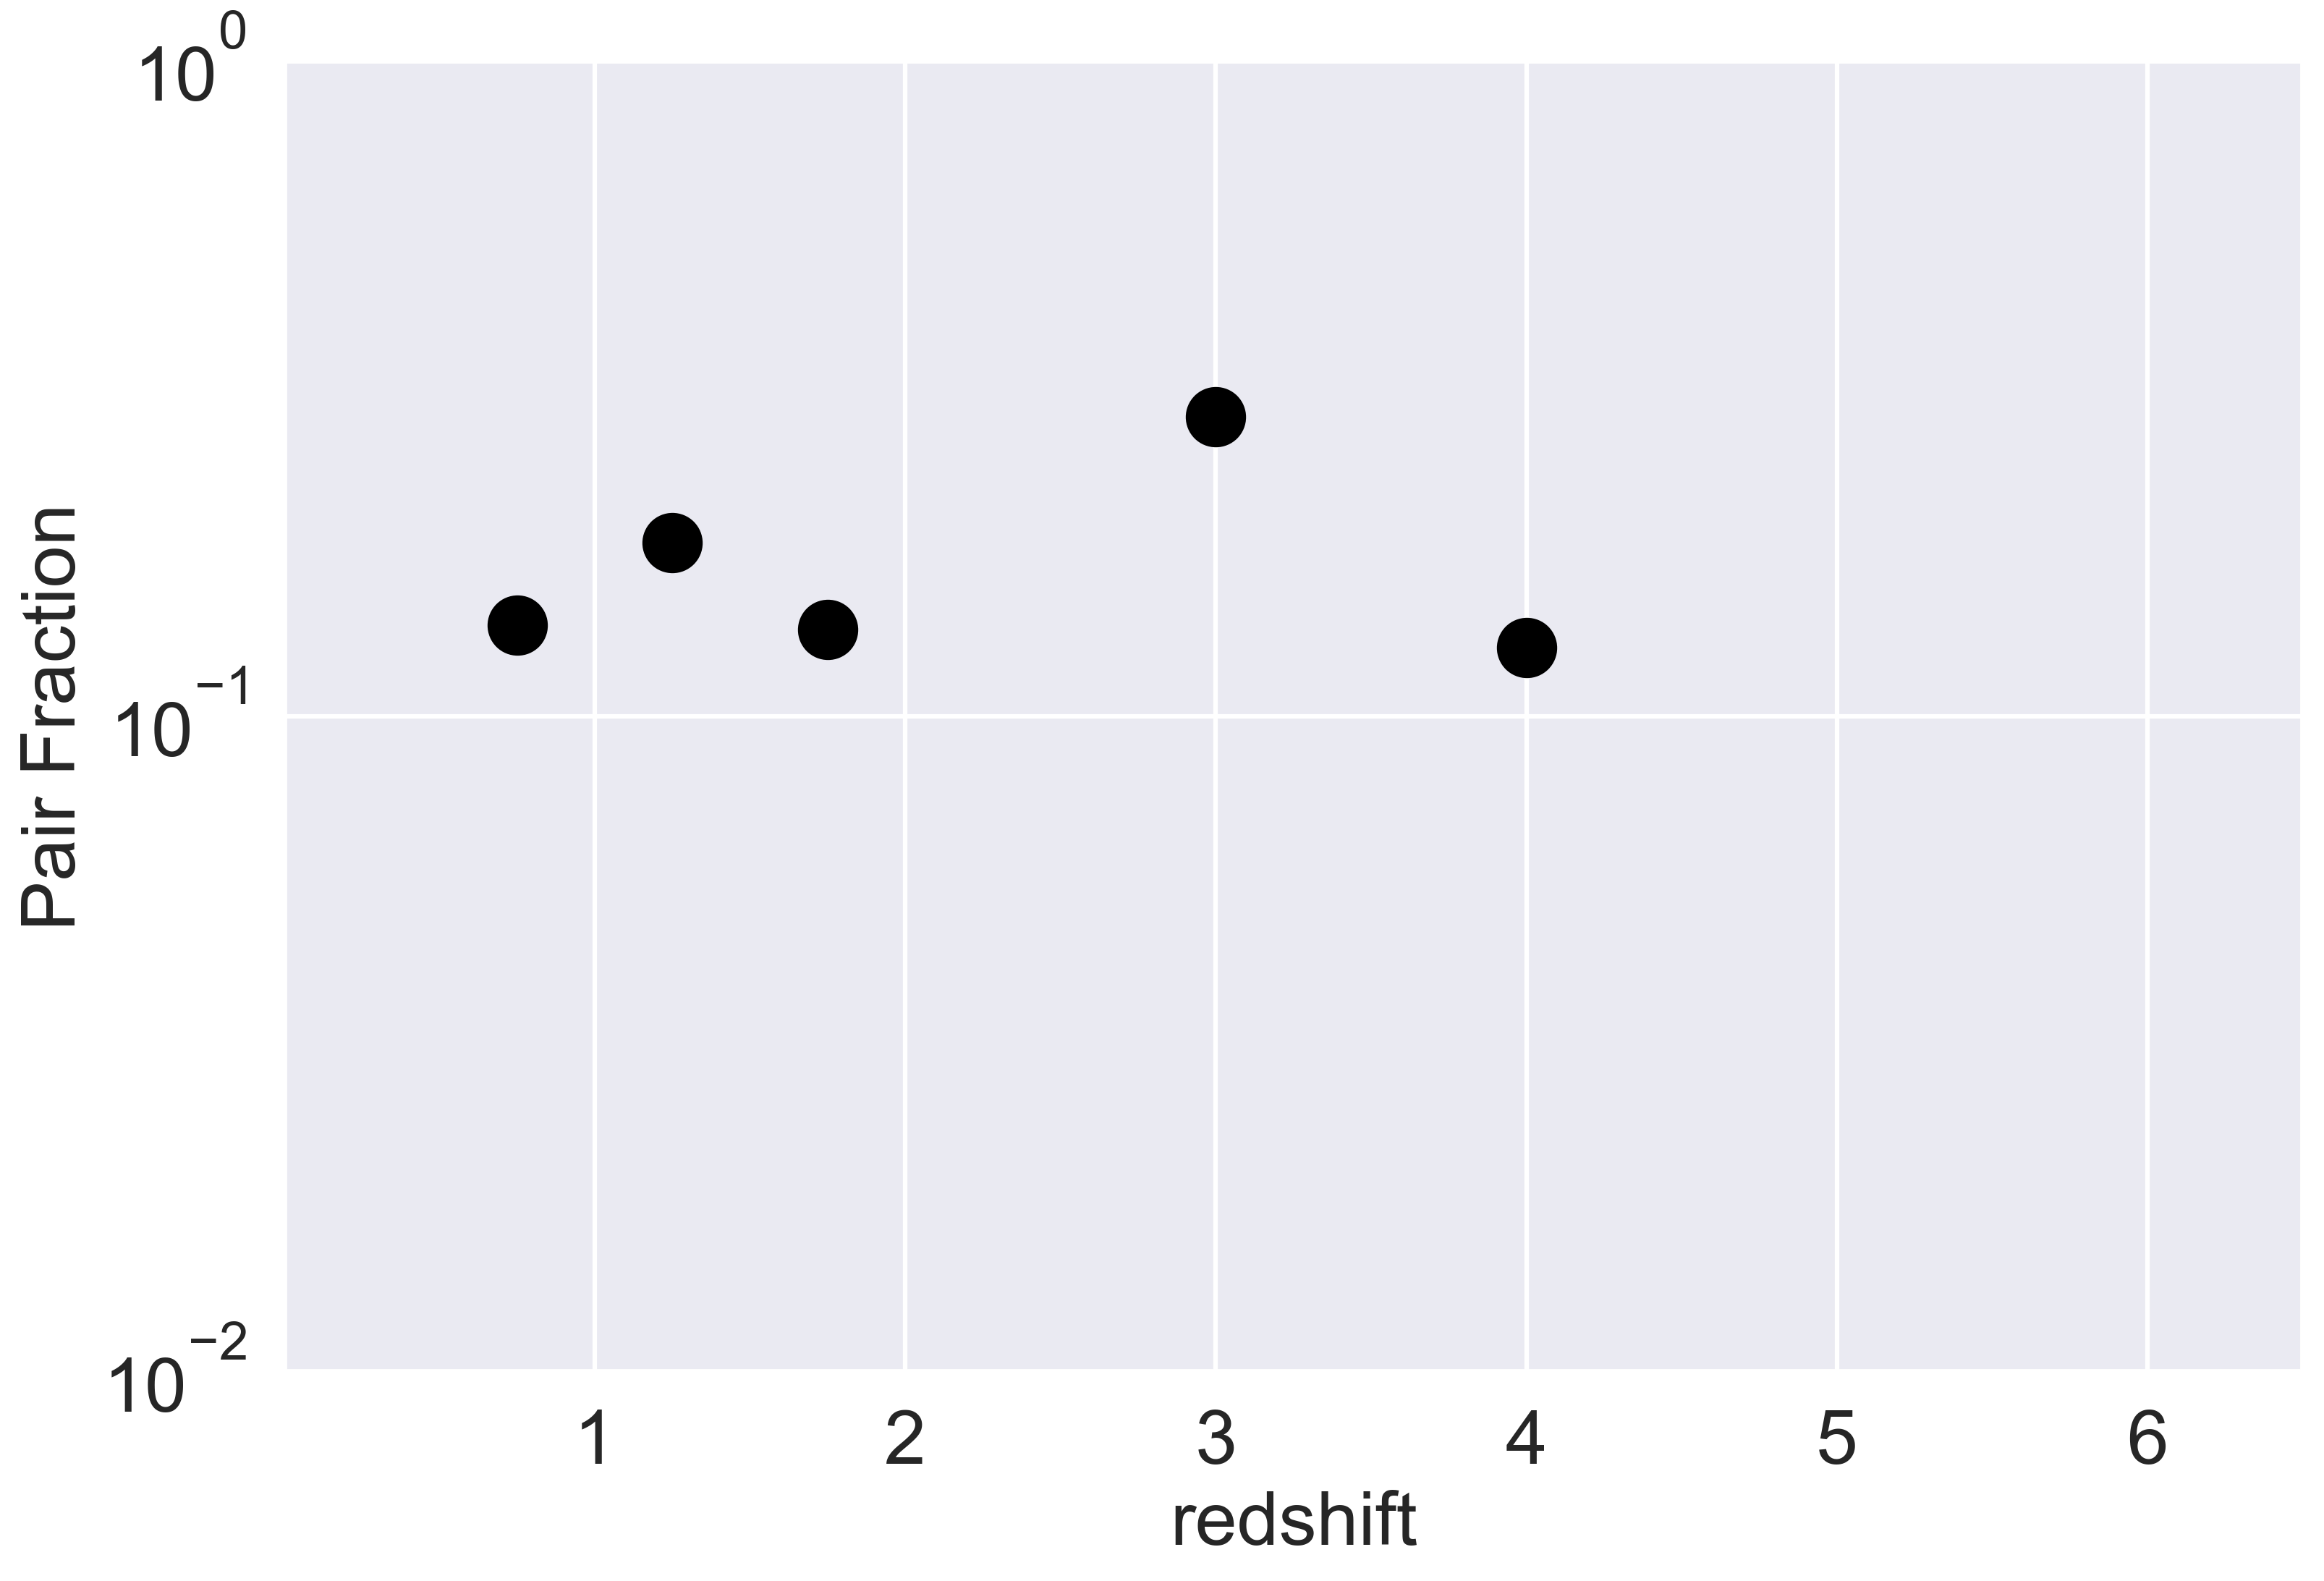

1386 possible primaries found, 32535 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 138
Pairs detected for this bin: 64
Pair fraction for this bin: 0.463768115942029
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 241
Pairs detected for this bin: 23
Pair fraction for this bin: 0.0954356846473029
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 327
Pairs detected for this bin: 70
Pair fraction for this bin: 0.21406727828746178
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 228
Pairs detected for this bin: 46
Pair fraction for this bin: 0.20175438596491227
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 223
Pairs detected for this bin: 26
Pair fraction for this bin: 0.11659192825112108
--

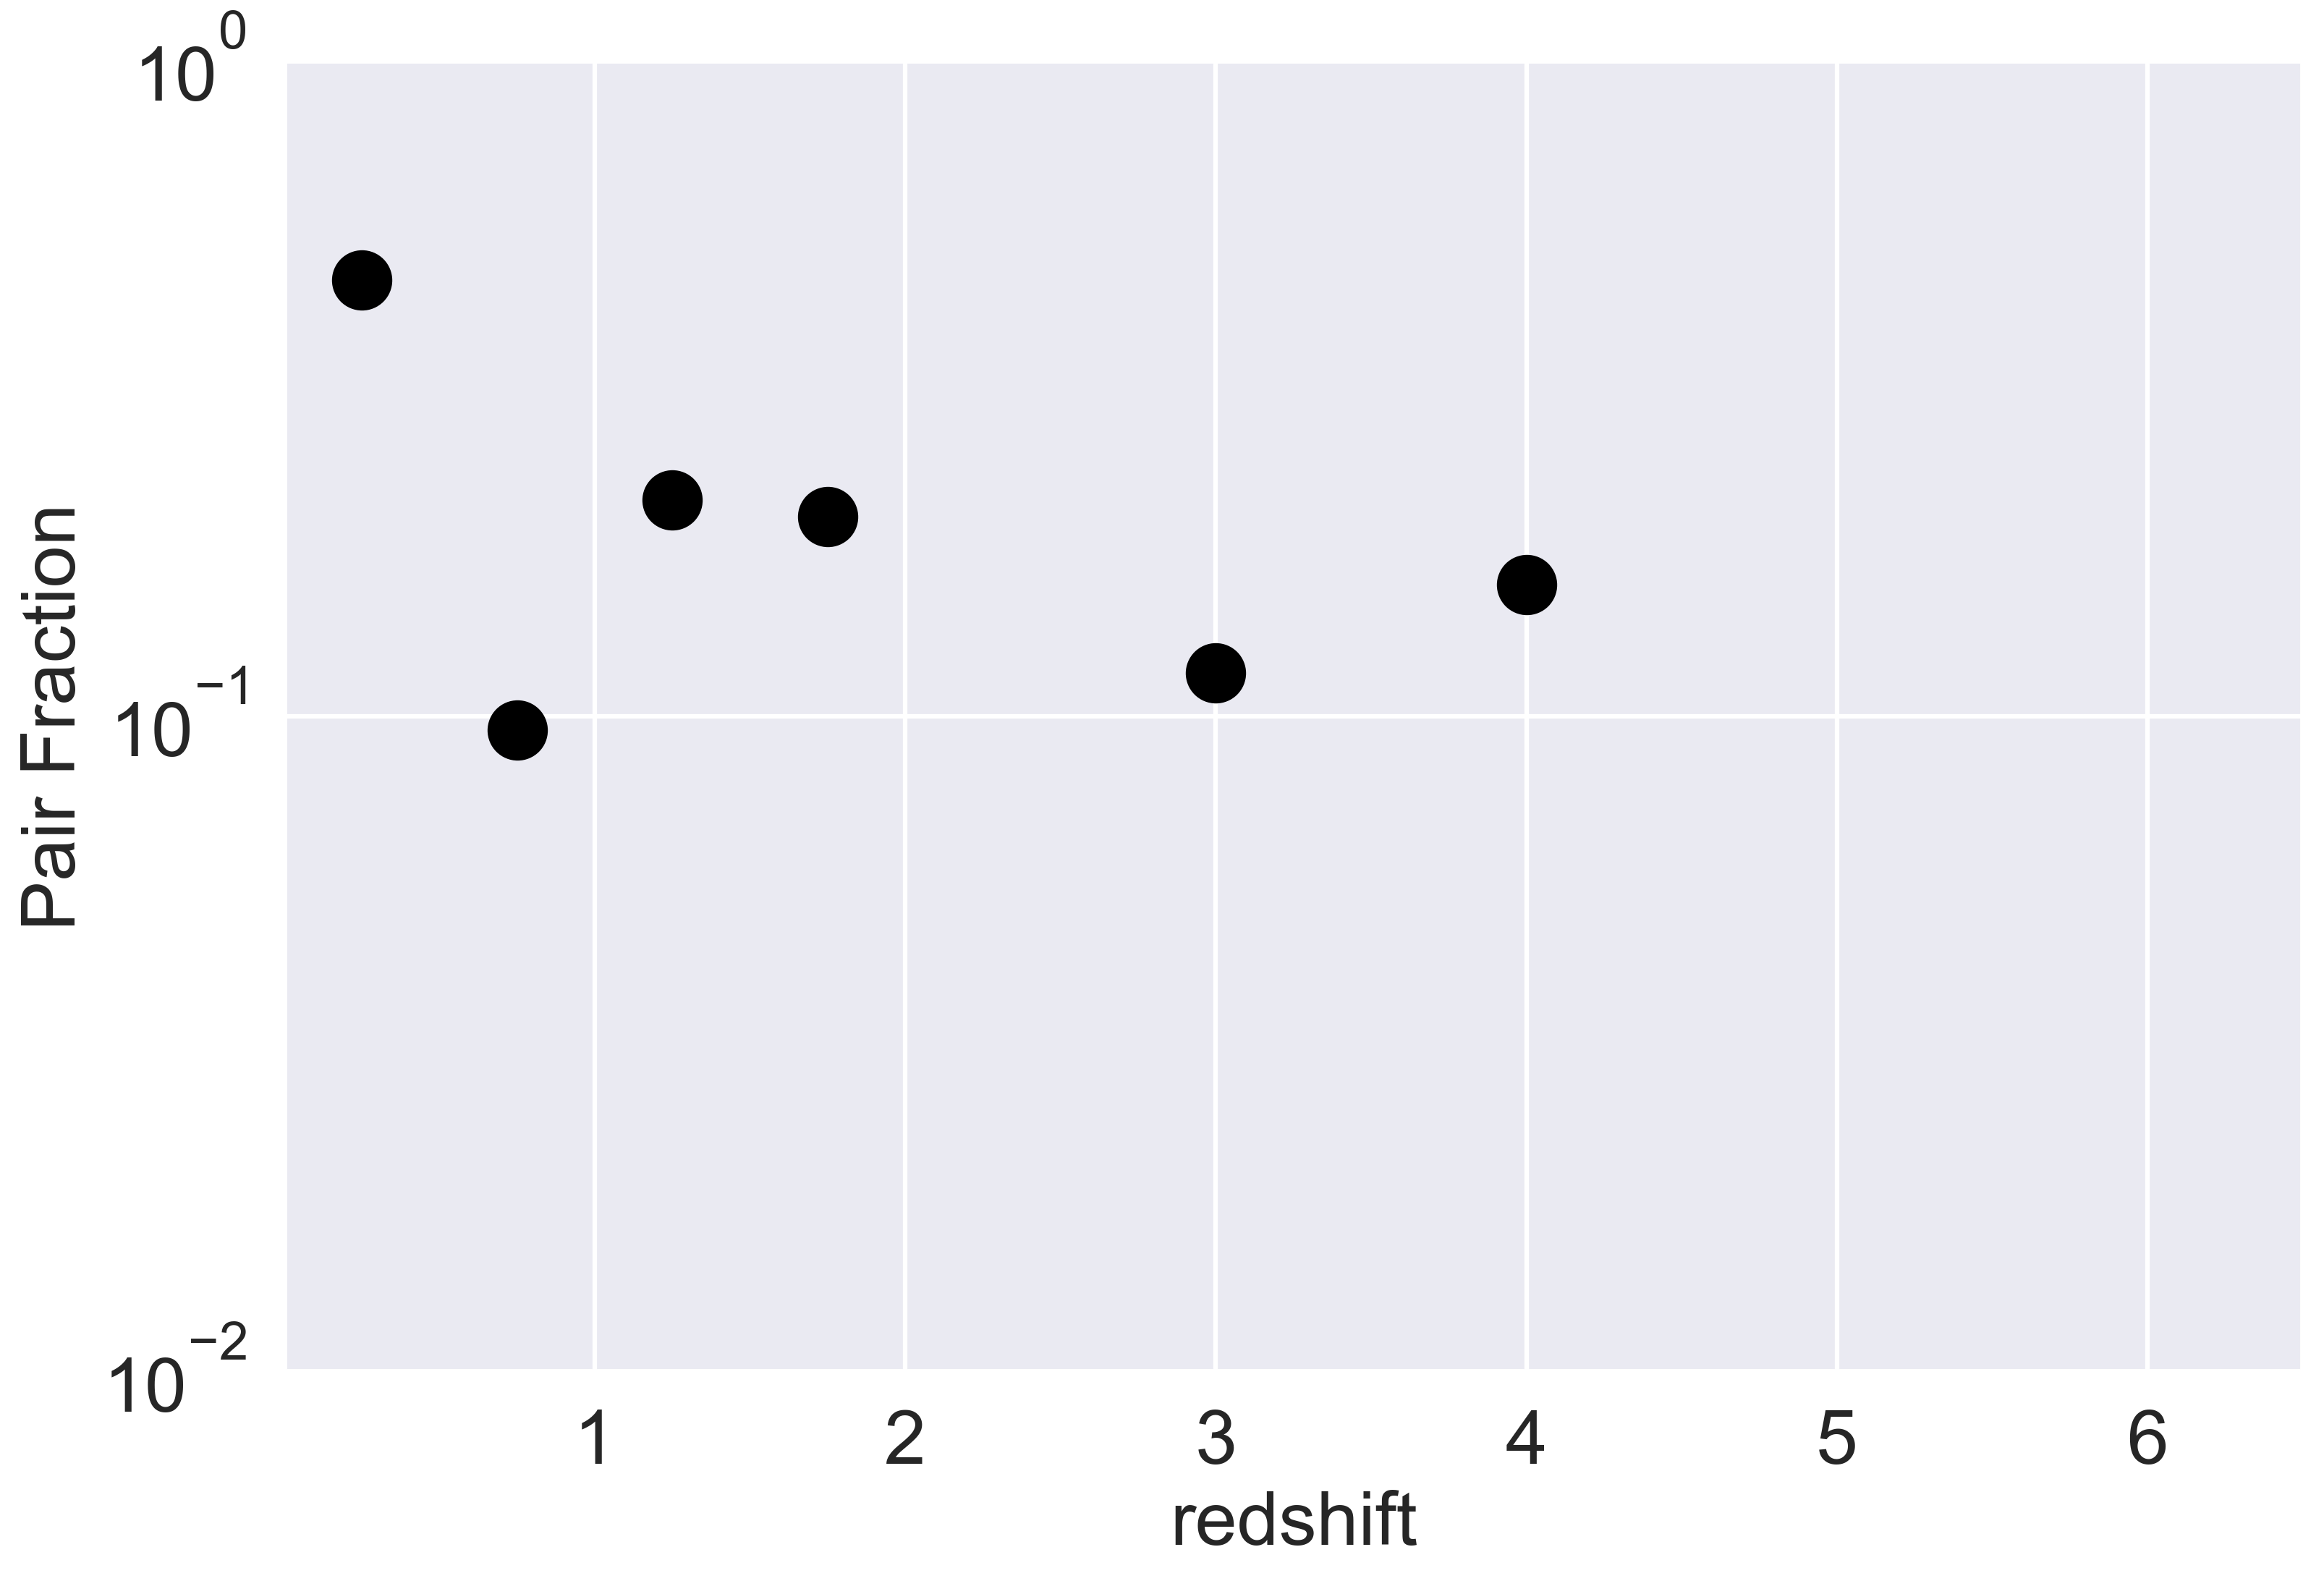

1285 possible primaries found, 31150 possible secondaries found.
Current redshift bin: (1e-05, 0.5)
Primaries detected for this bin: 63
Pairs detected for this bin: 9
Pair fraction for this bin: 0.14285714285714285
---------------------------------------------
Current redshift bin: (0.5, 1.0)
Primaries detected for this bin: 225
Pairs detected for this bin: 36
Pair fraction for this bin: 0.16
---------------------------------------------
Current redshift bin: (1.0, 1.5)
Primaries detected for this bin: 256
Pairs detected for this bin: 57
Pair fraction for this bin: 0.22265625
---------------------------------------------
Current redshift bin: (1.5, 2.0)
Primaries detected for this bin: 350
Pairs detected for this bin: 102
Pair fraction for this bin: 0.2914285714285714
---------------------------------------------
Current redshift bin: (2.5, 3.5)
Primaries detected for this bin: 138
Pairs detected for this bin: 17
Pair fraction for this bin: 0.12318840579710146
-------------------------

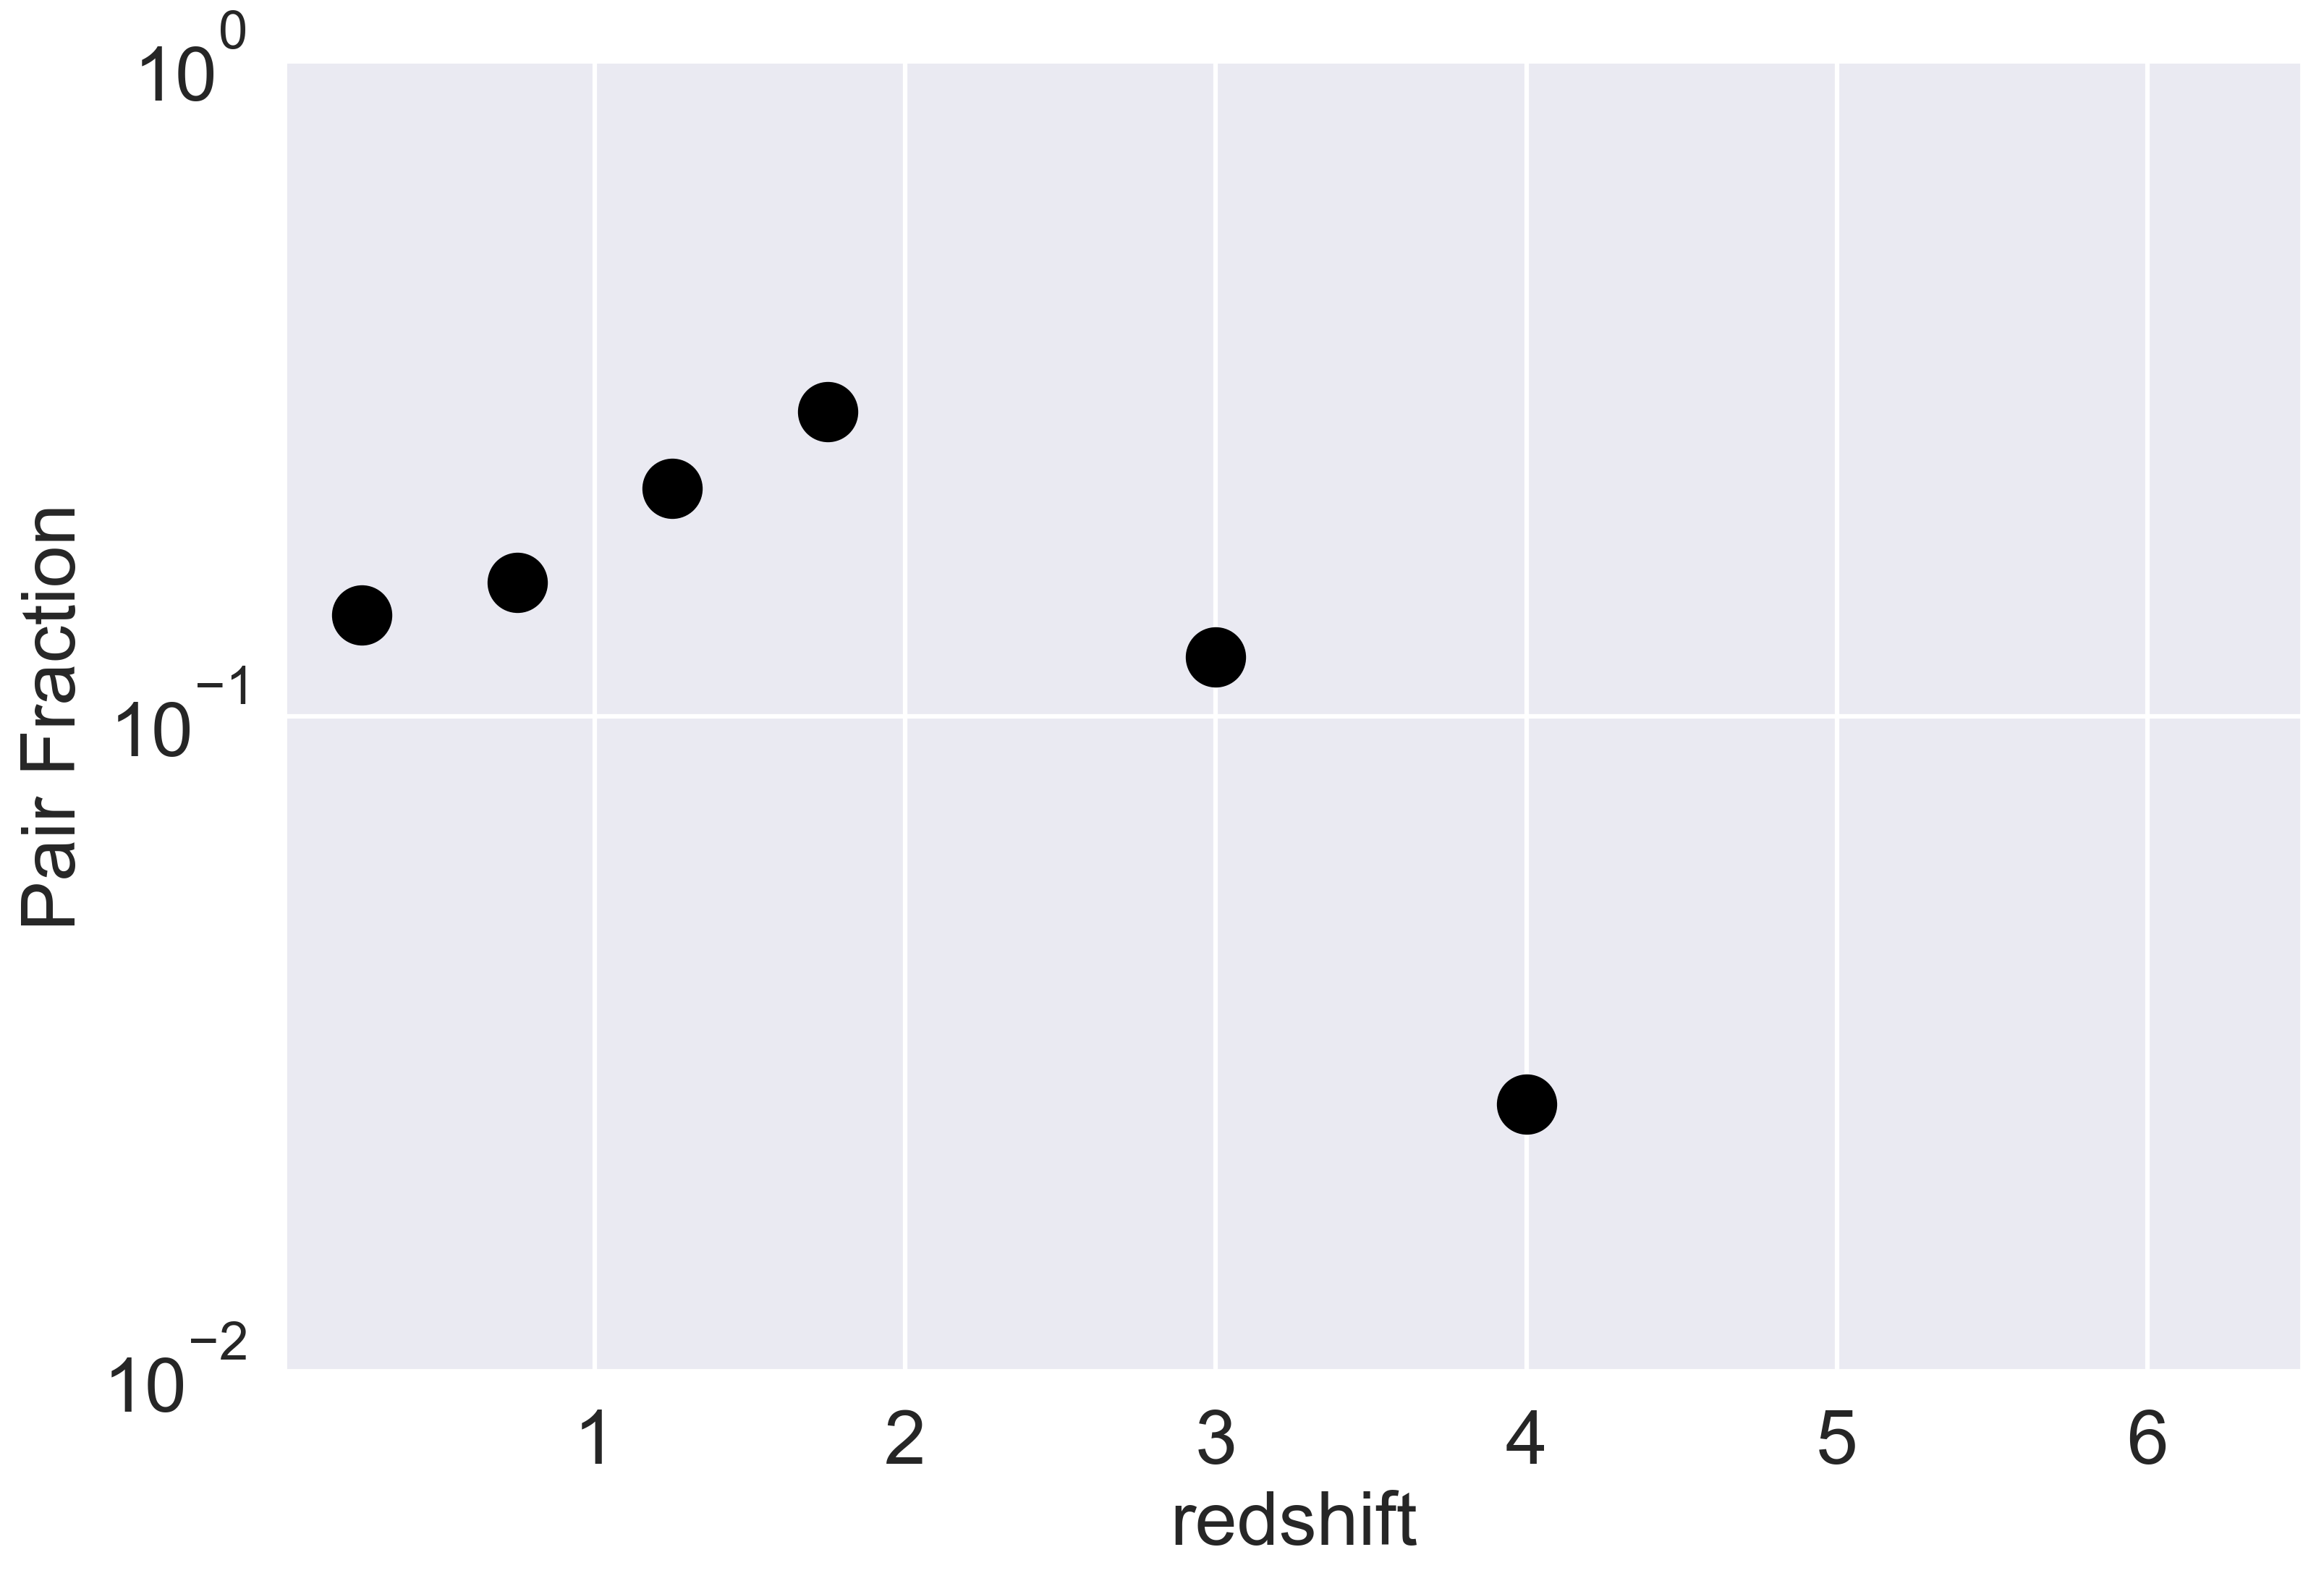

In [22]:
xyz_info100 = pairs_plots(tng1001xyz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot2)
yxz_info100 = pairs_plots(tng1001yxz, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot2)
zyx_info100 = pairs_plots(tng1001zyx, 'Stellar mass w2sr', 'RA degree', 'DEC degree', 'True z',show='yes',zbins=bins_for_plot2)

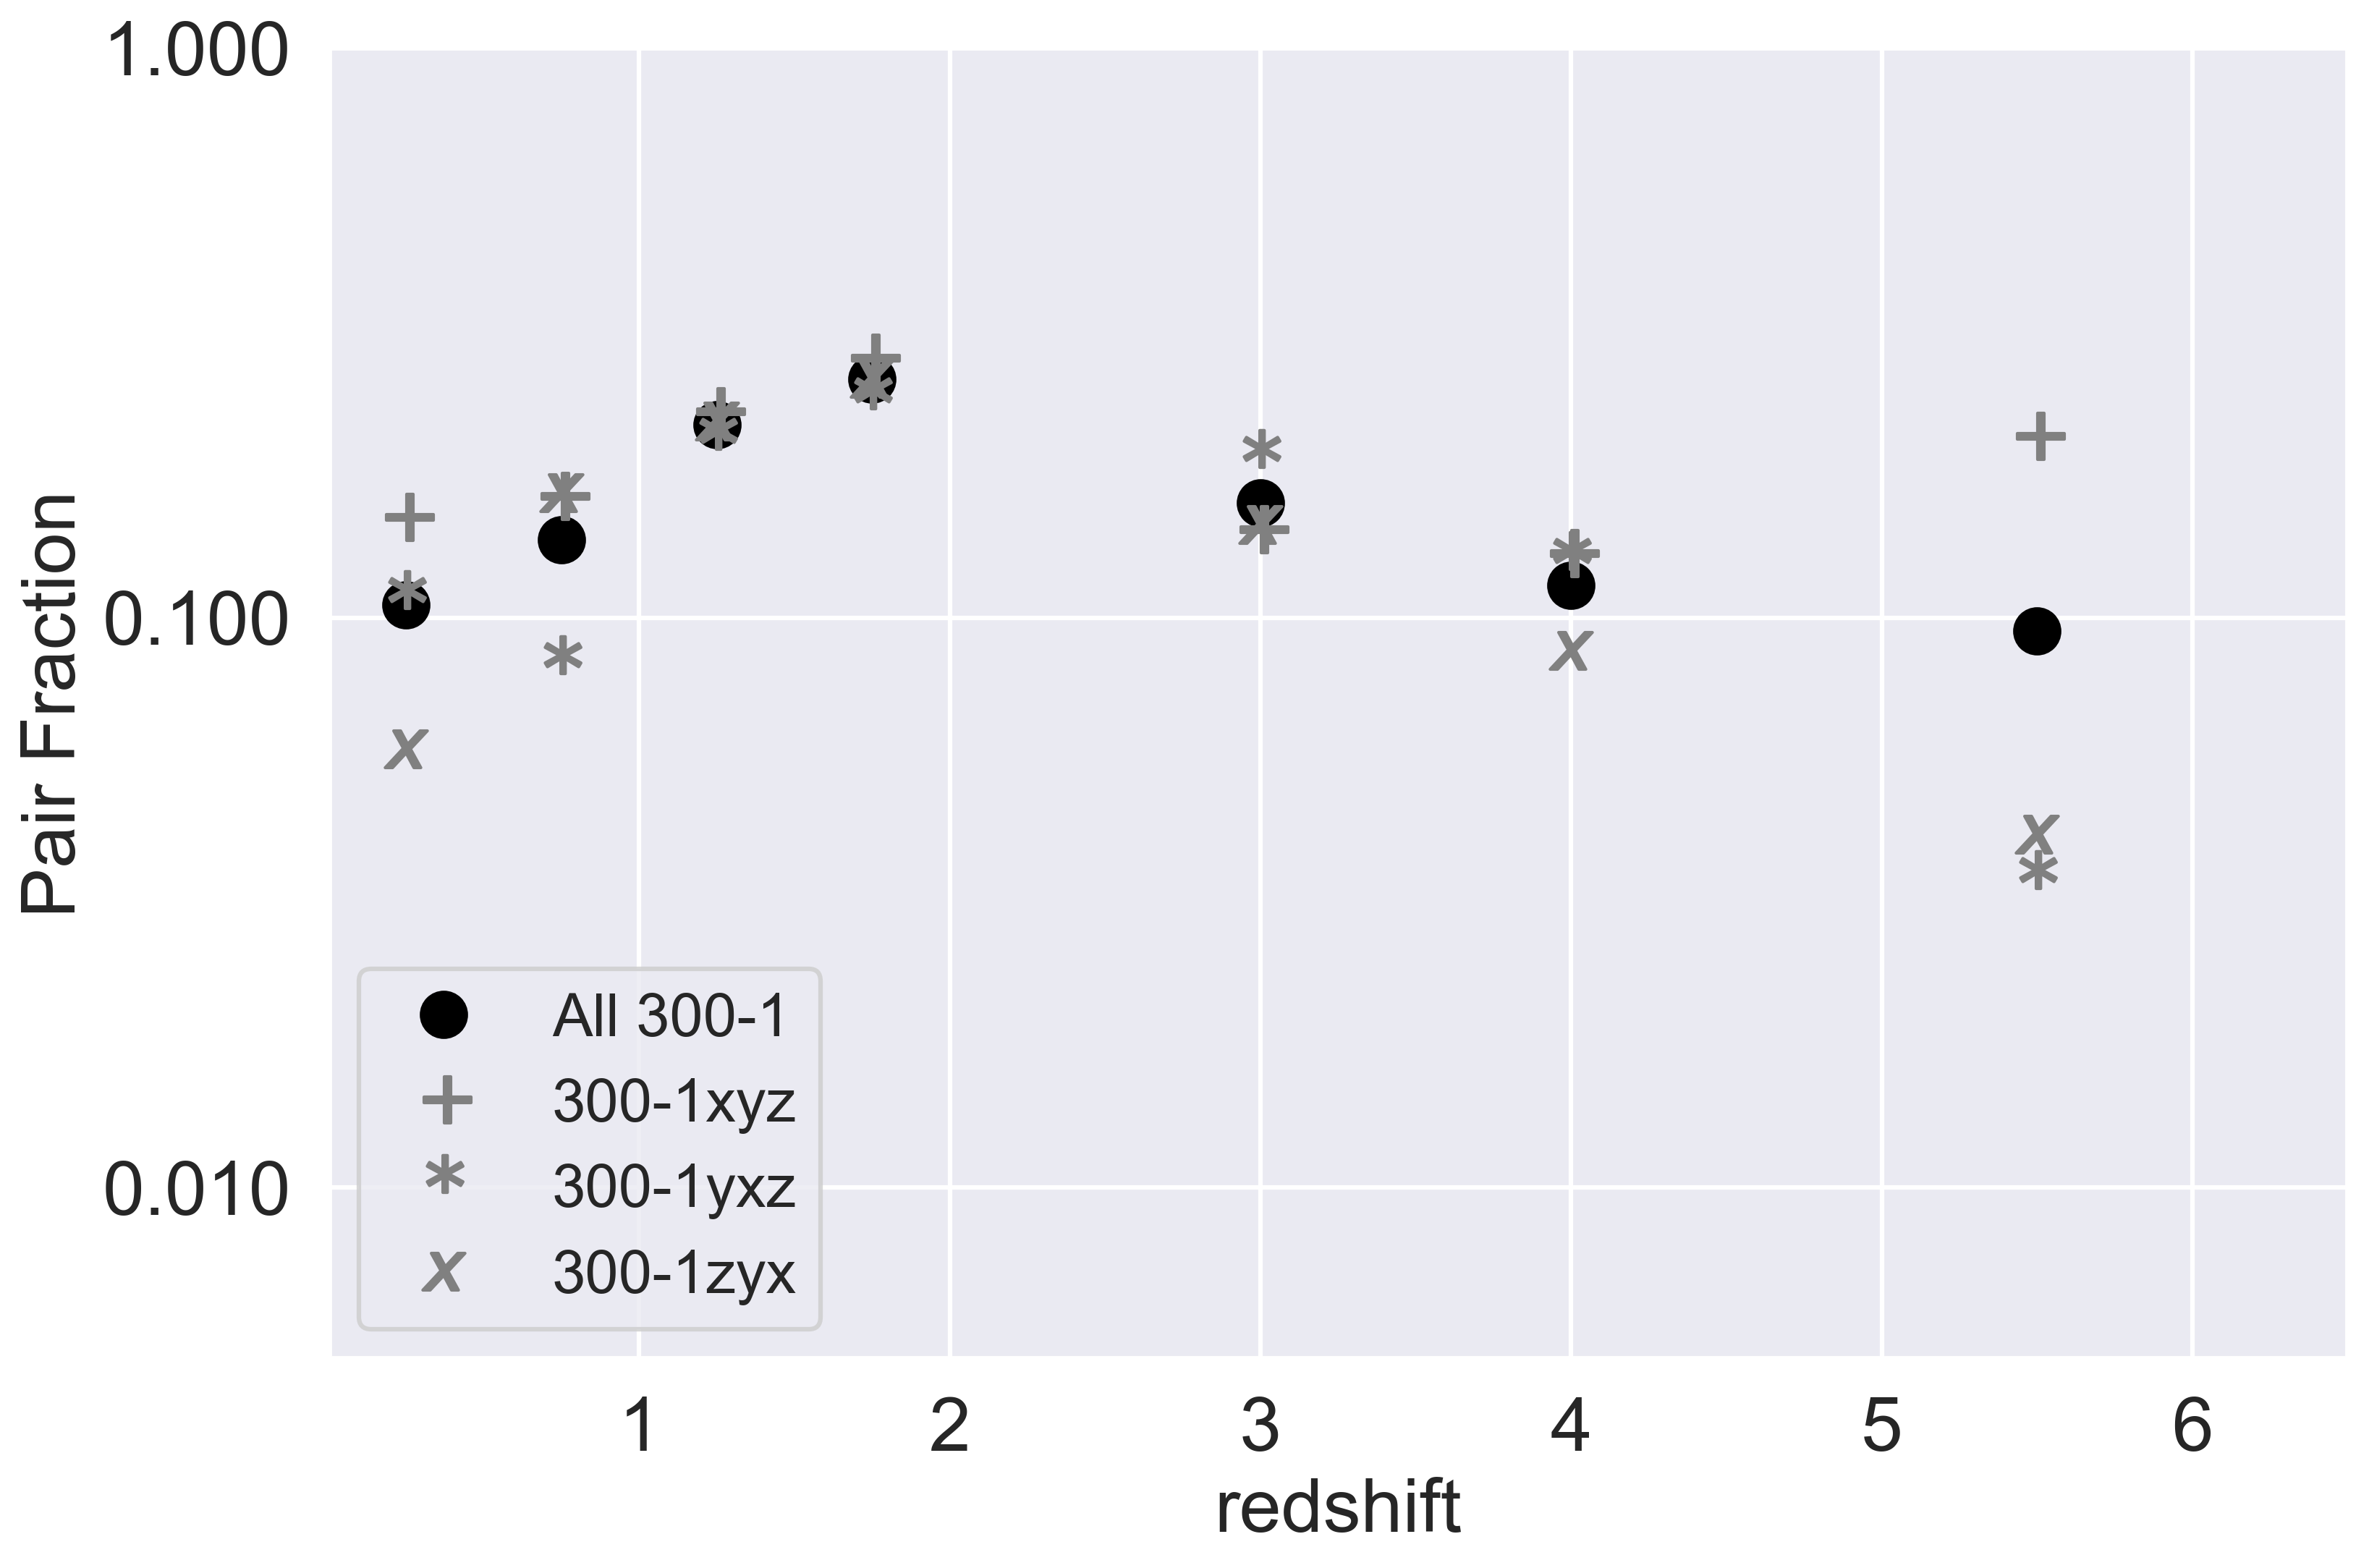

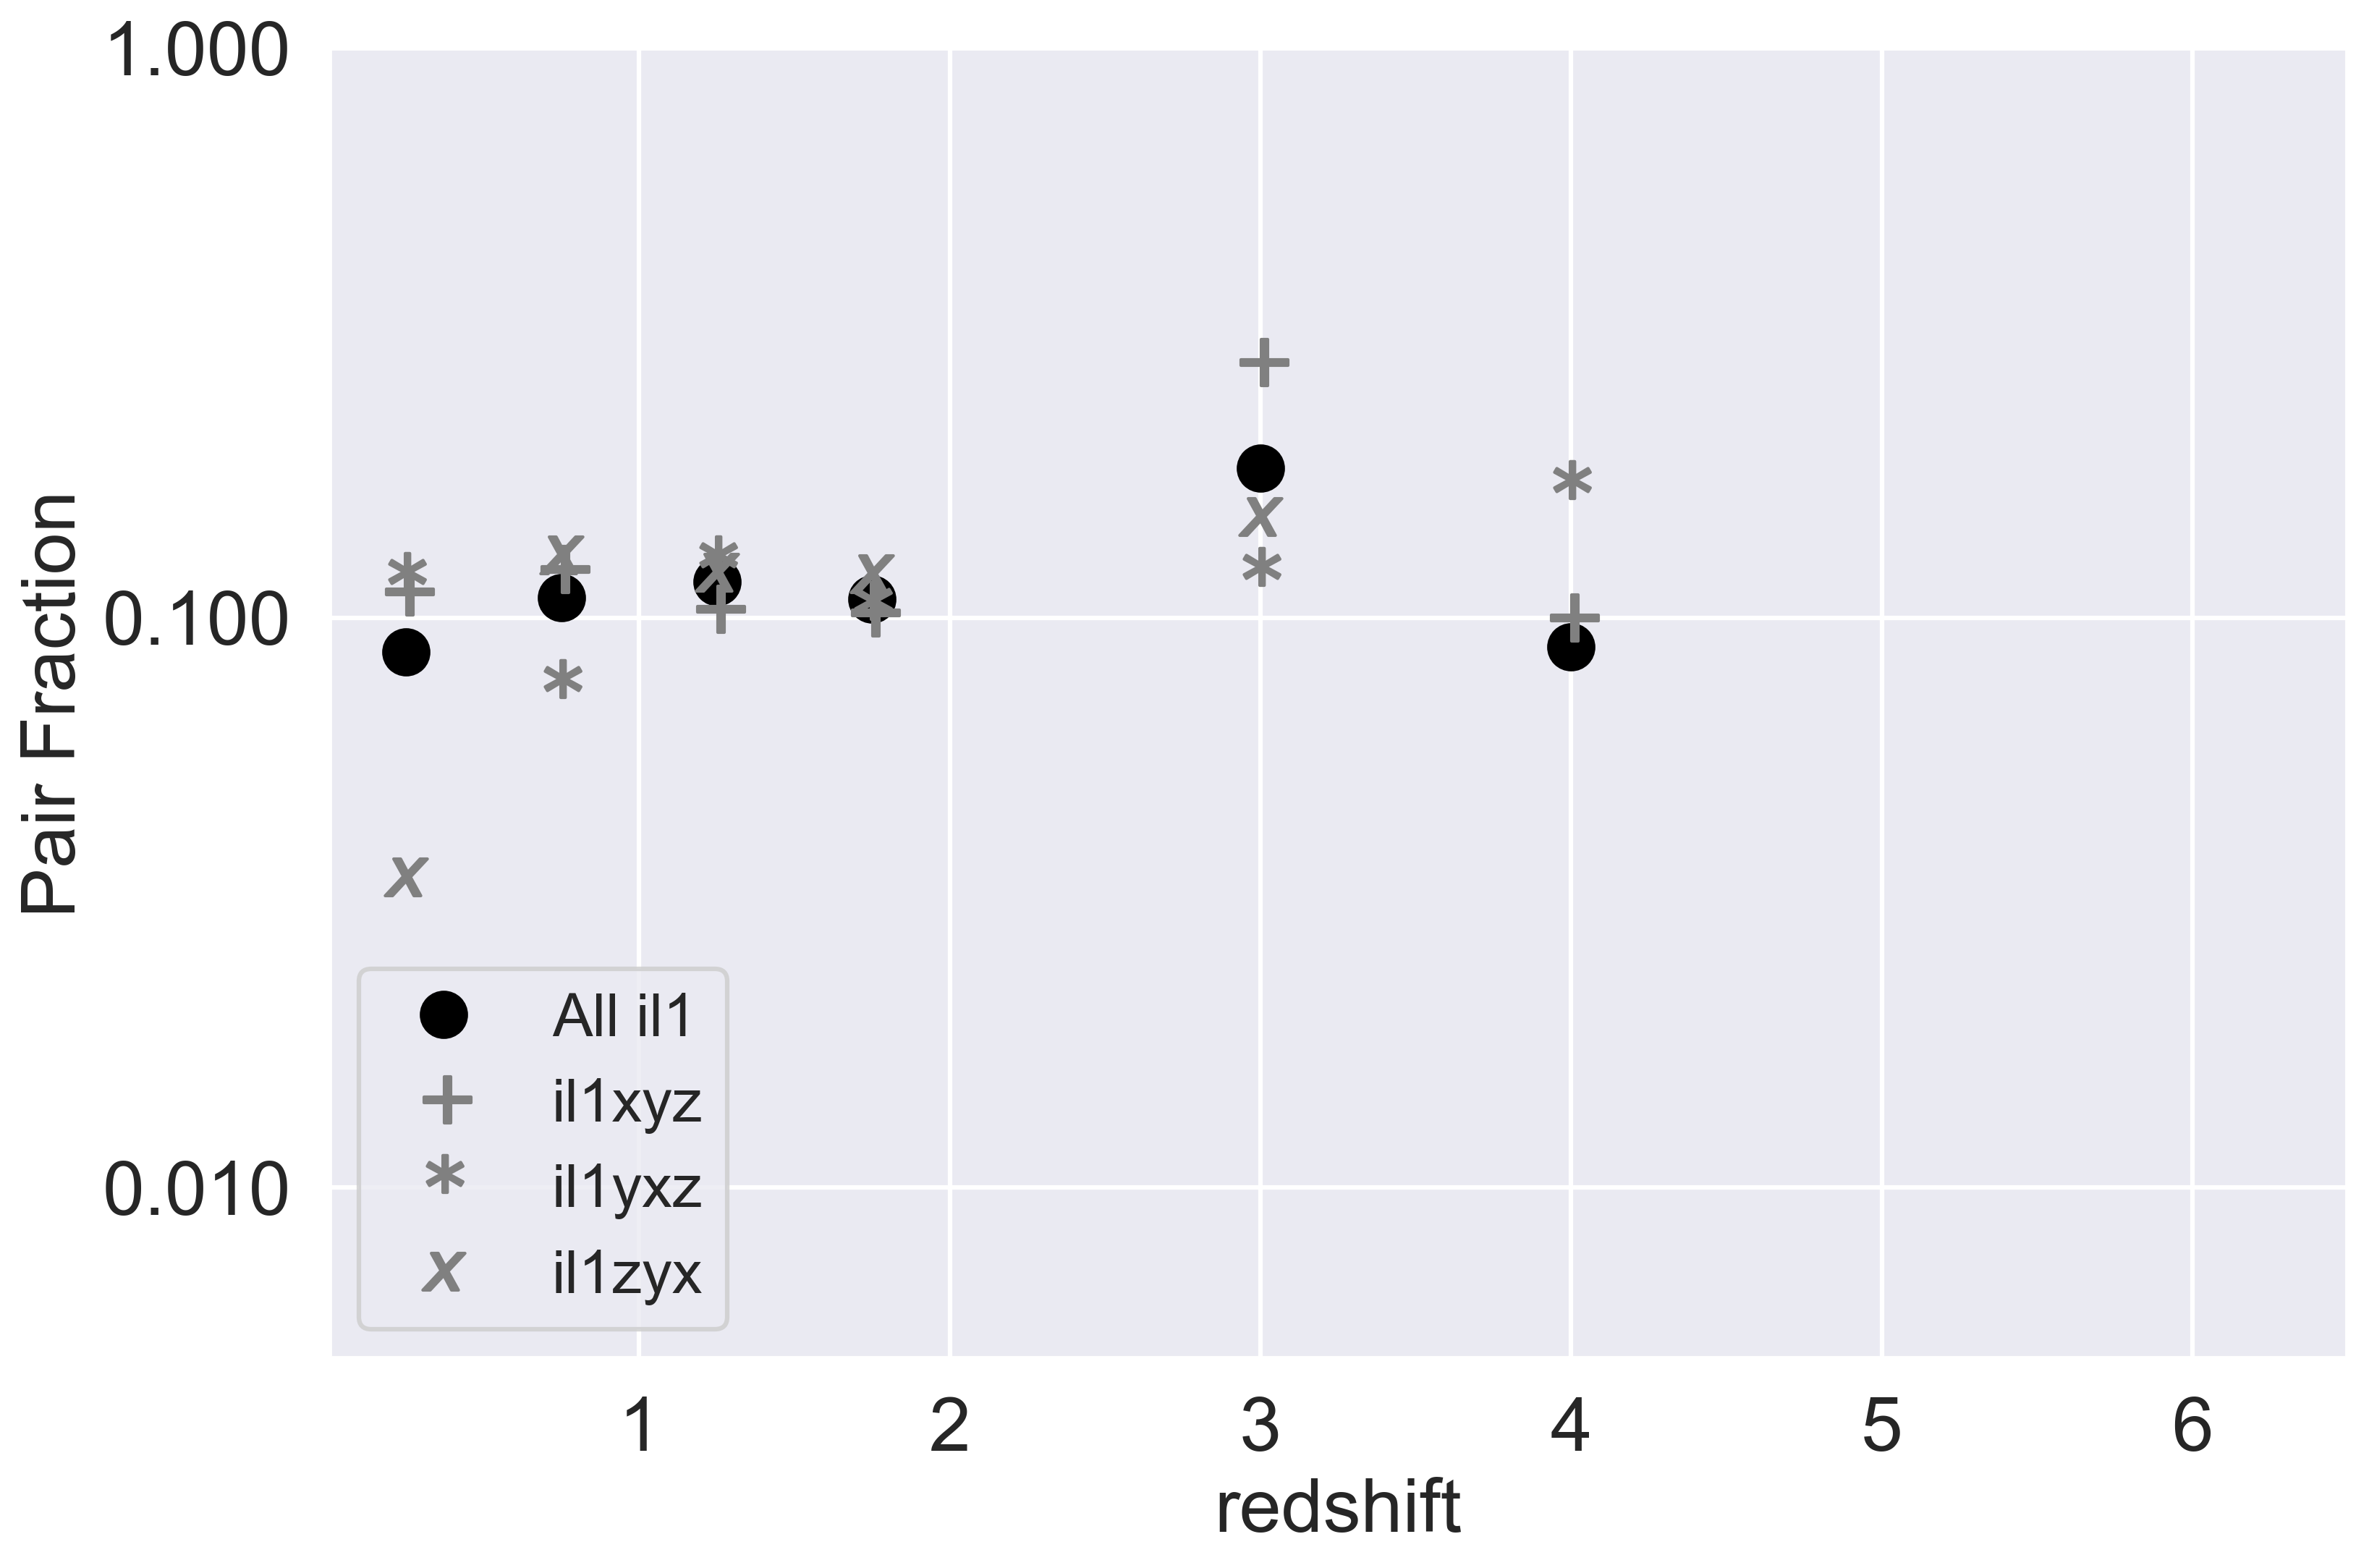

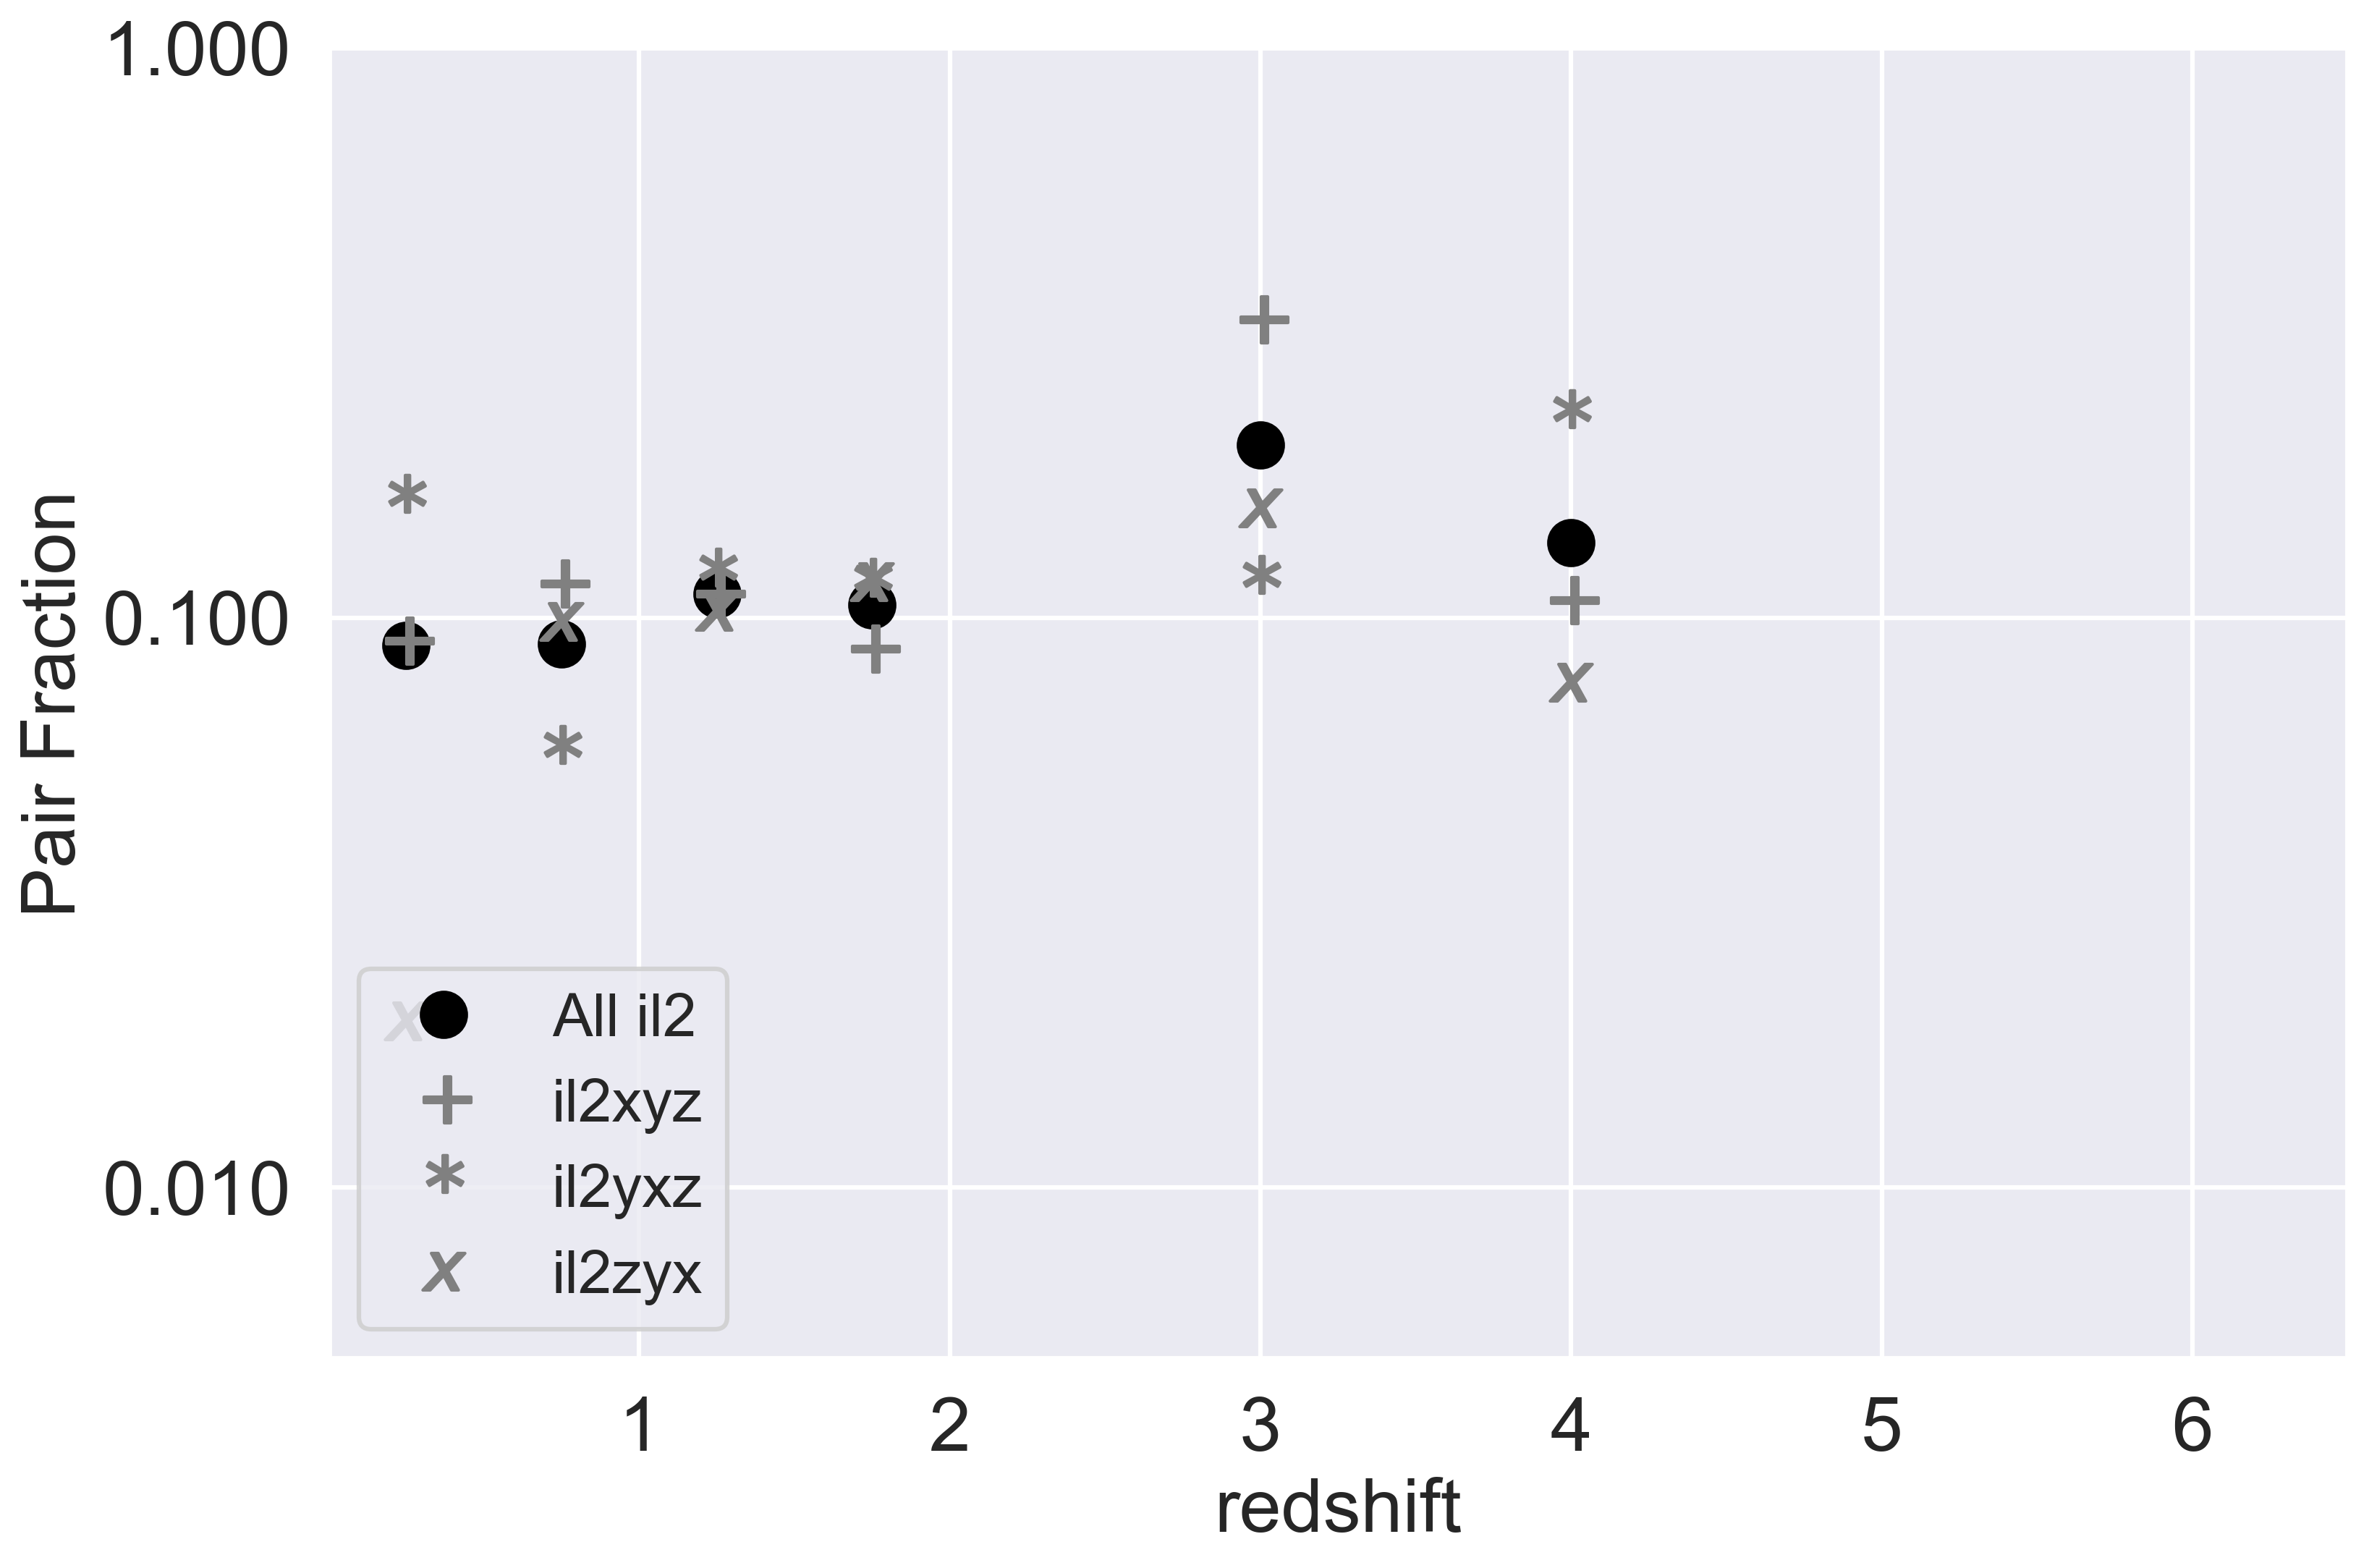

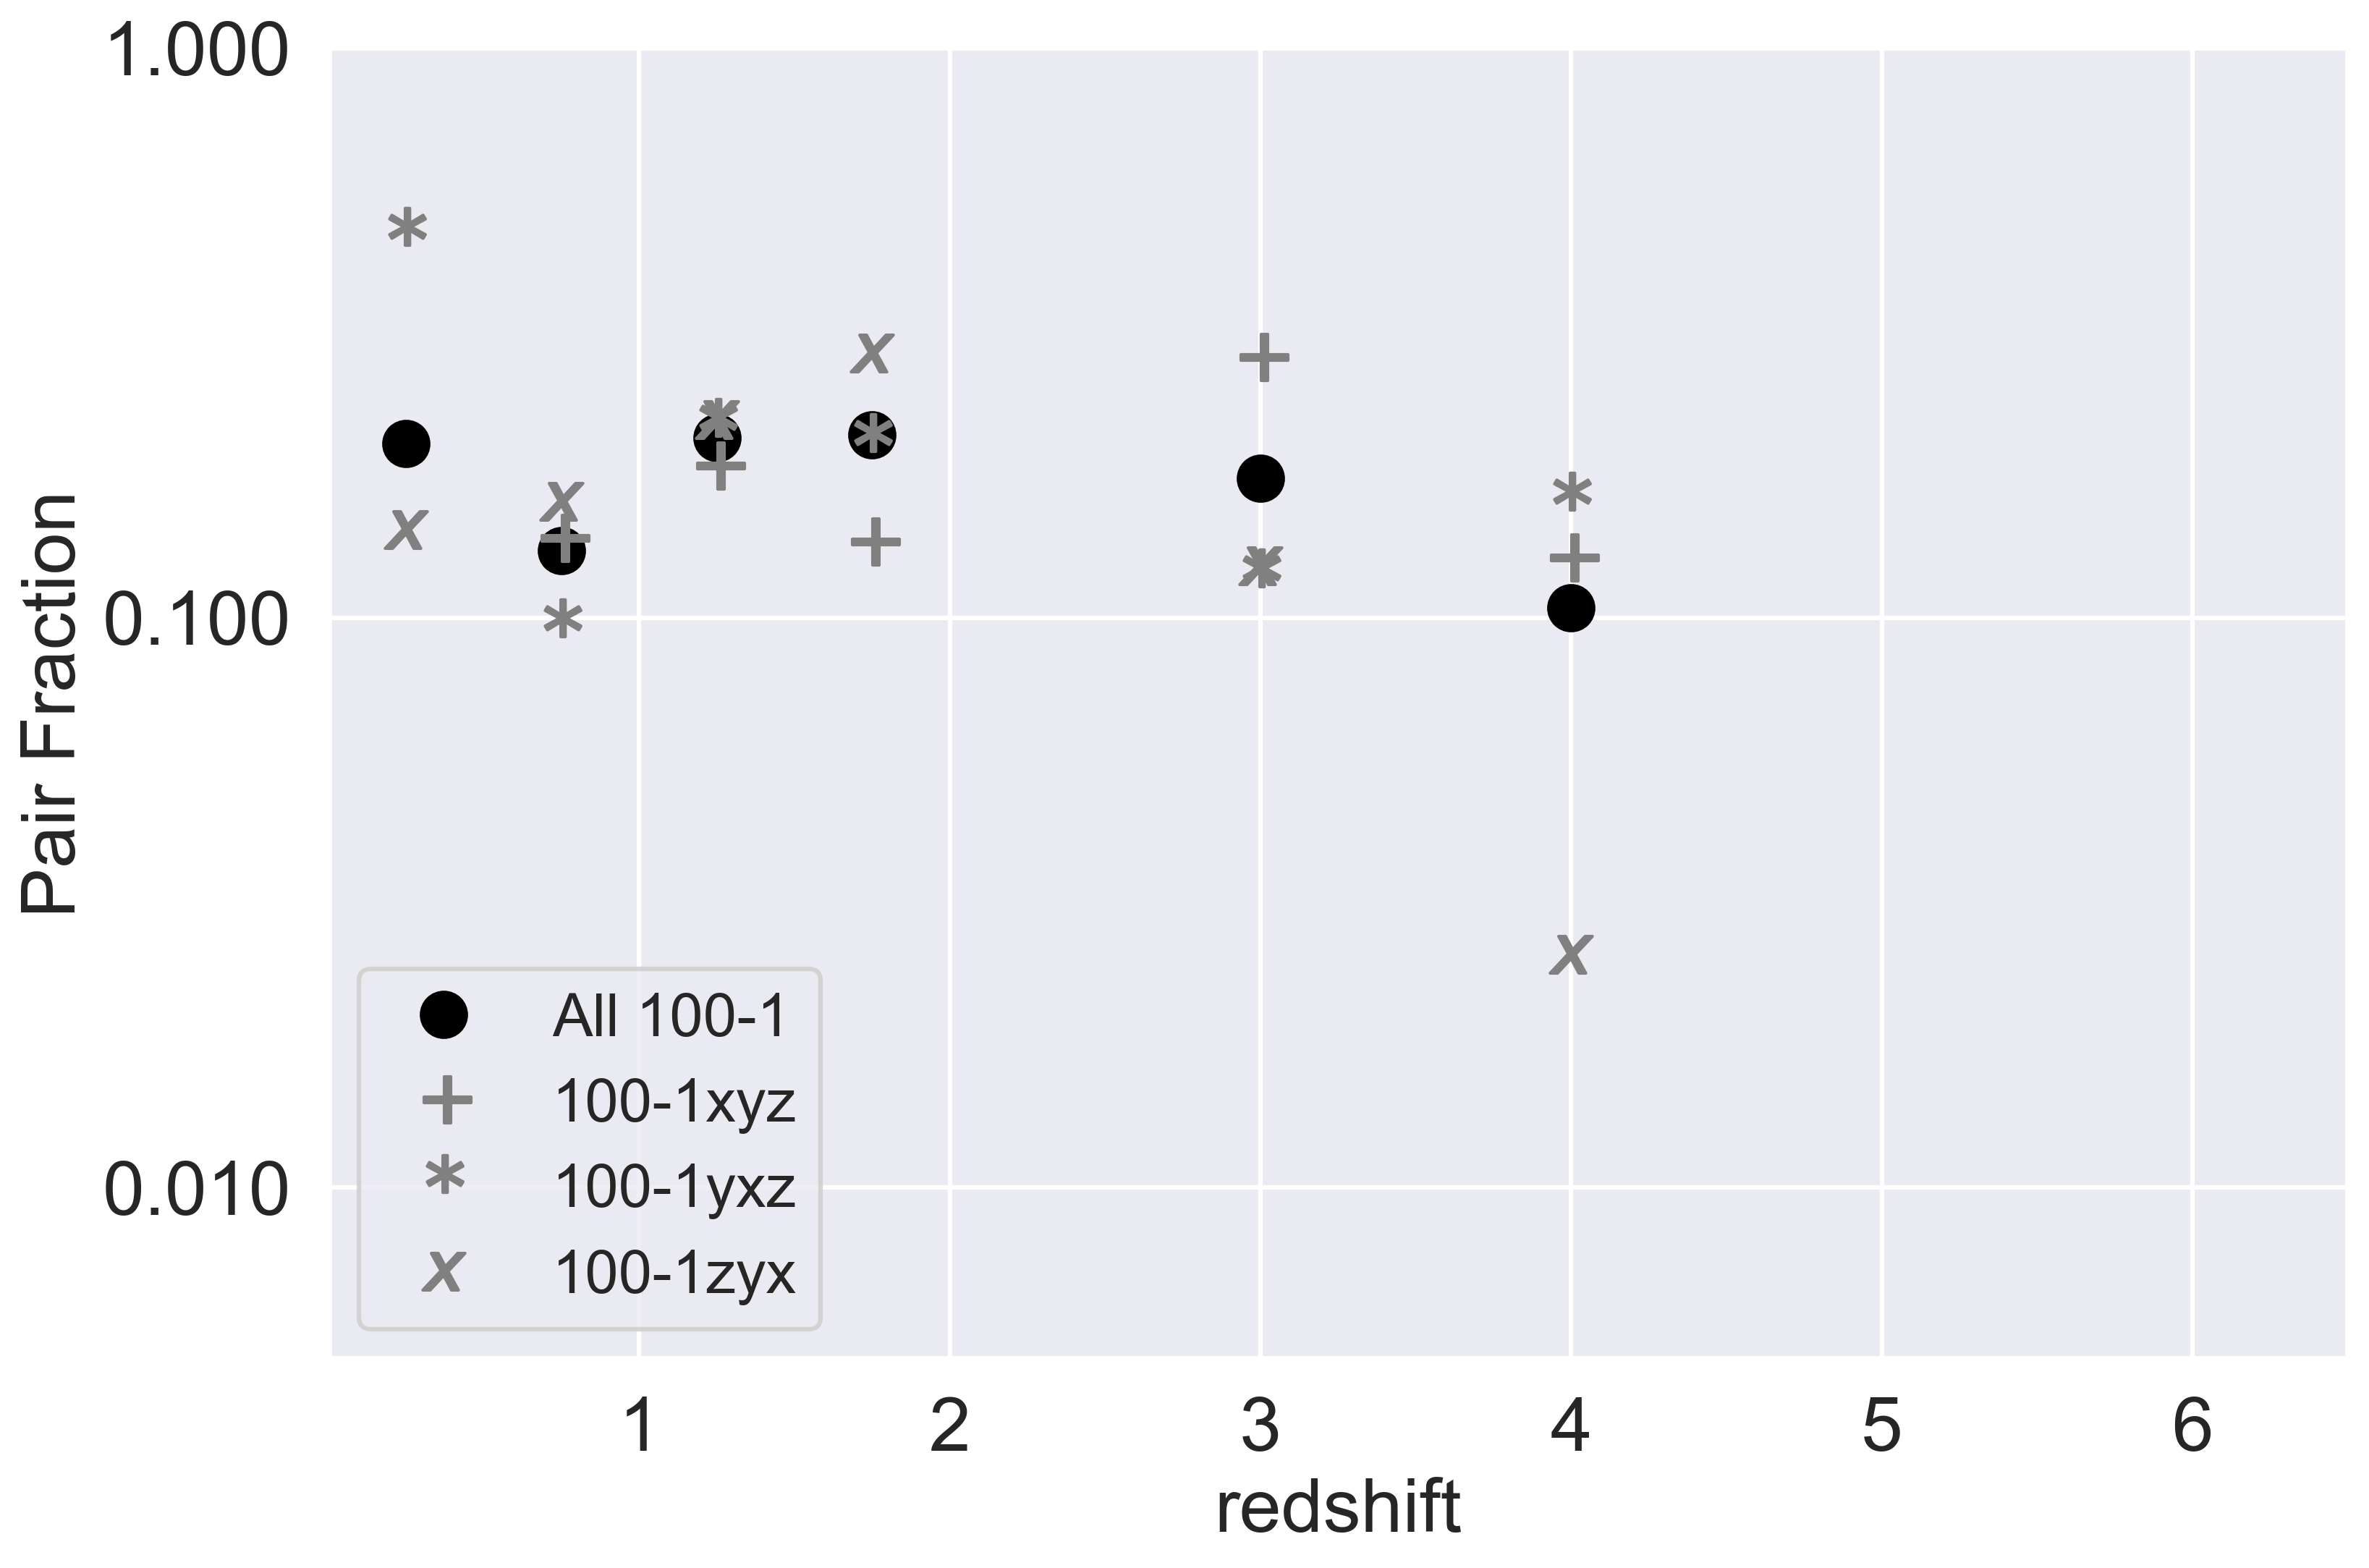

In [18]:
all_2 = all_plot(xyz_info2,yxz_info2,zyx_info2)
allil1_2 = all_plot(xyz_infoil1_2,yxz_infoil1_2,zyx_infoil1_2)
allil2 = all_plot(xyz_infoil2,yxz_infoil2,zyx_infoil2)
all100 = all_plot(xyz_info100,yxz_info100,zyx_info100)

### Data cuts: Following Ducnan et al, Reduced mass limit, and reduced mass fraction

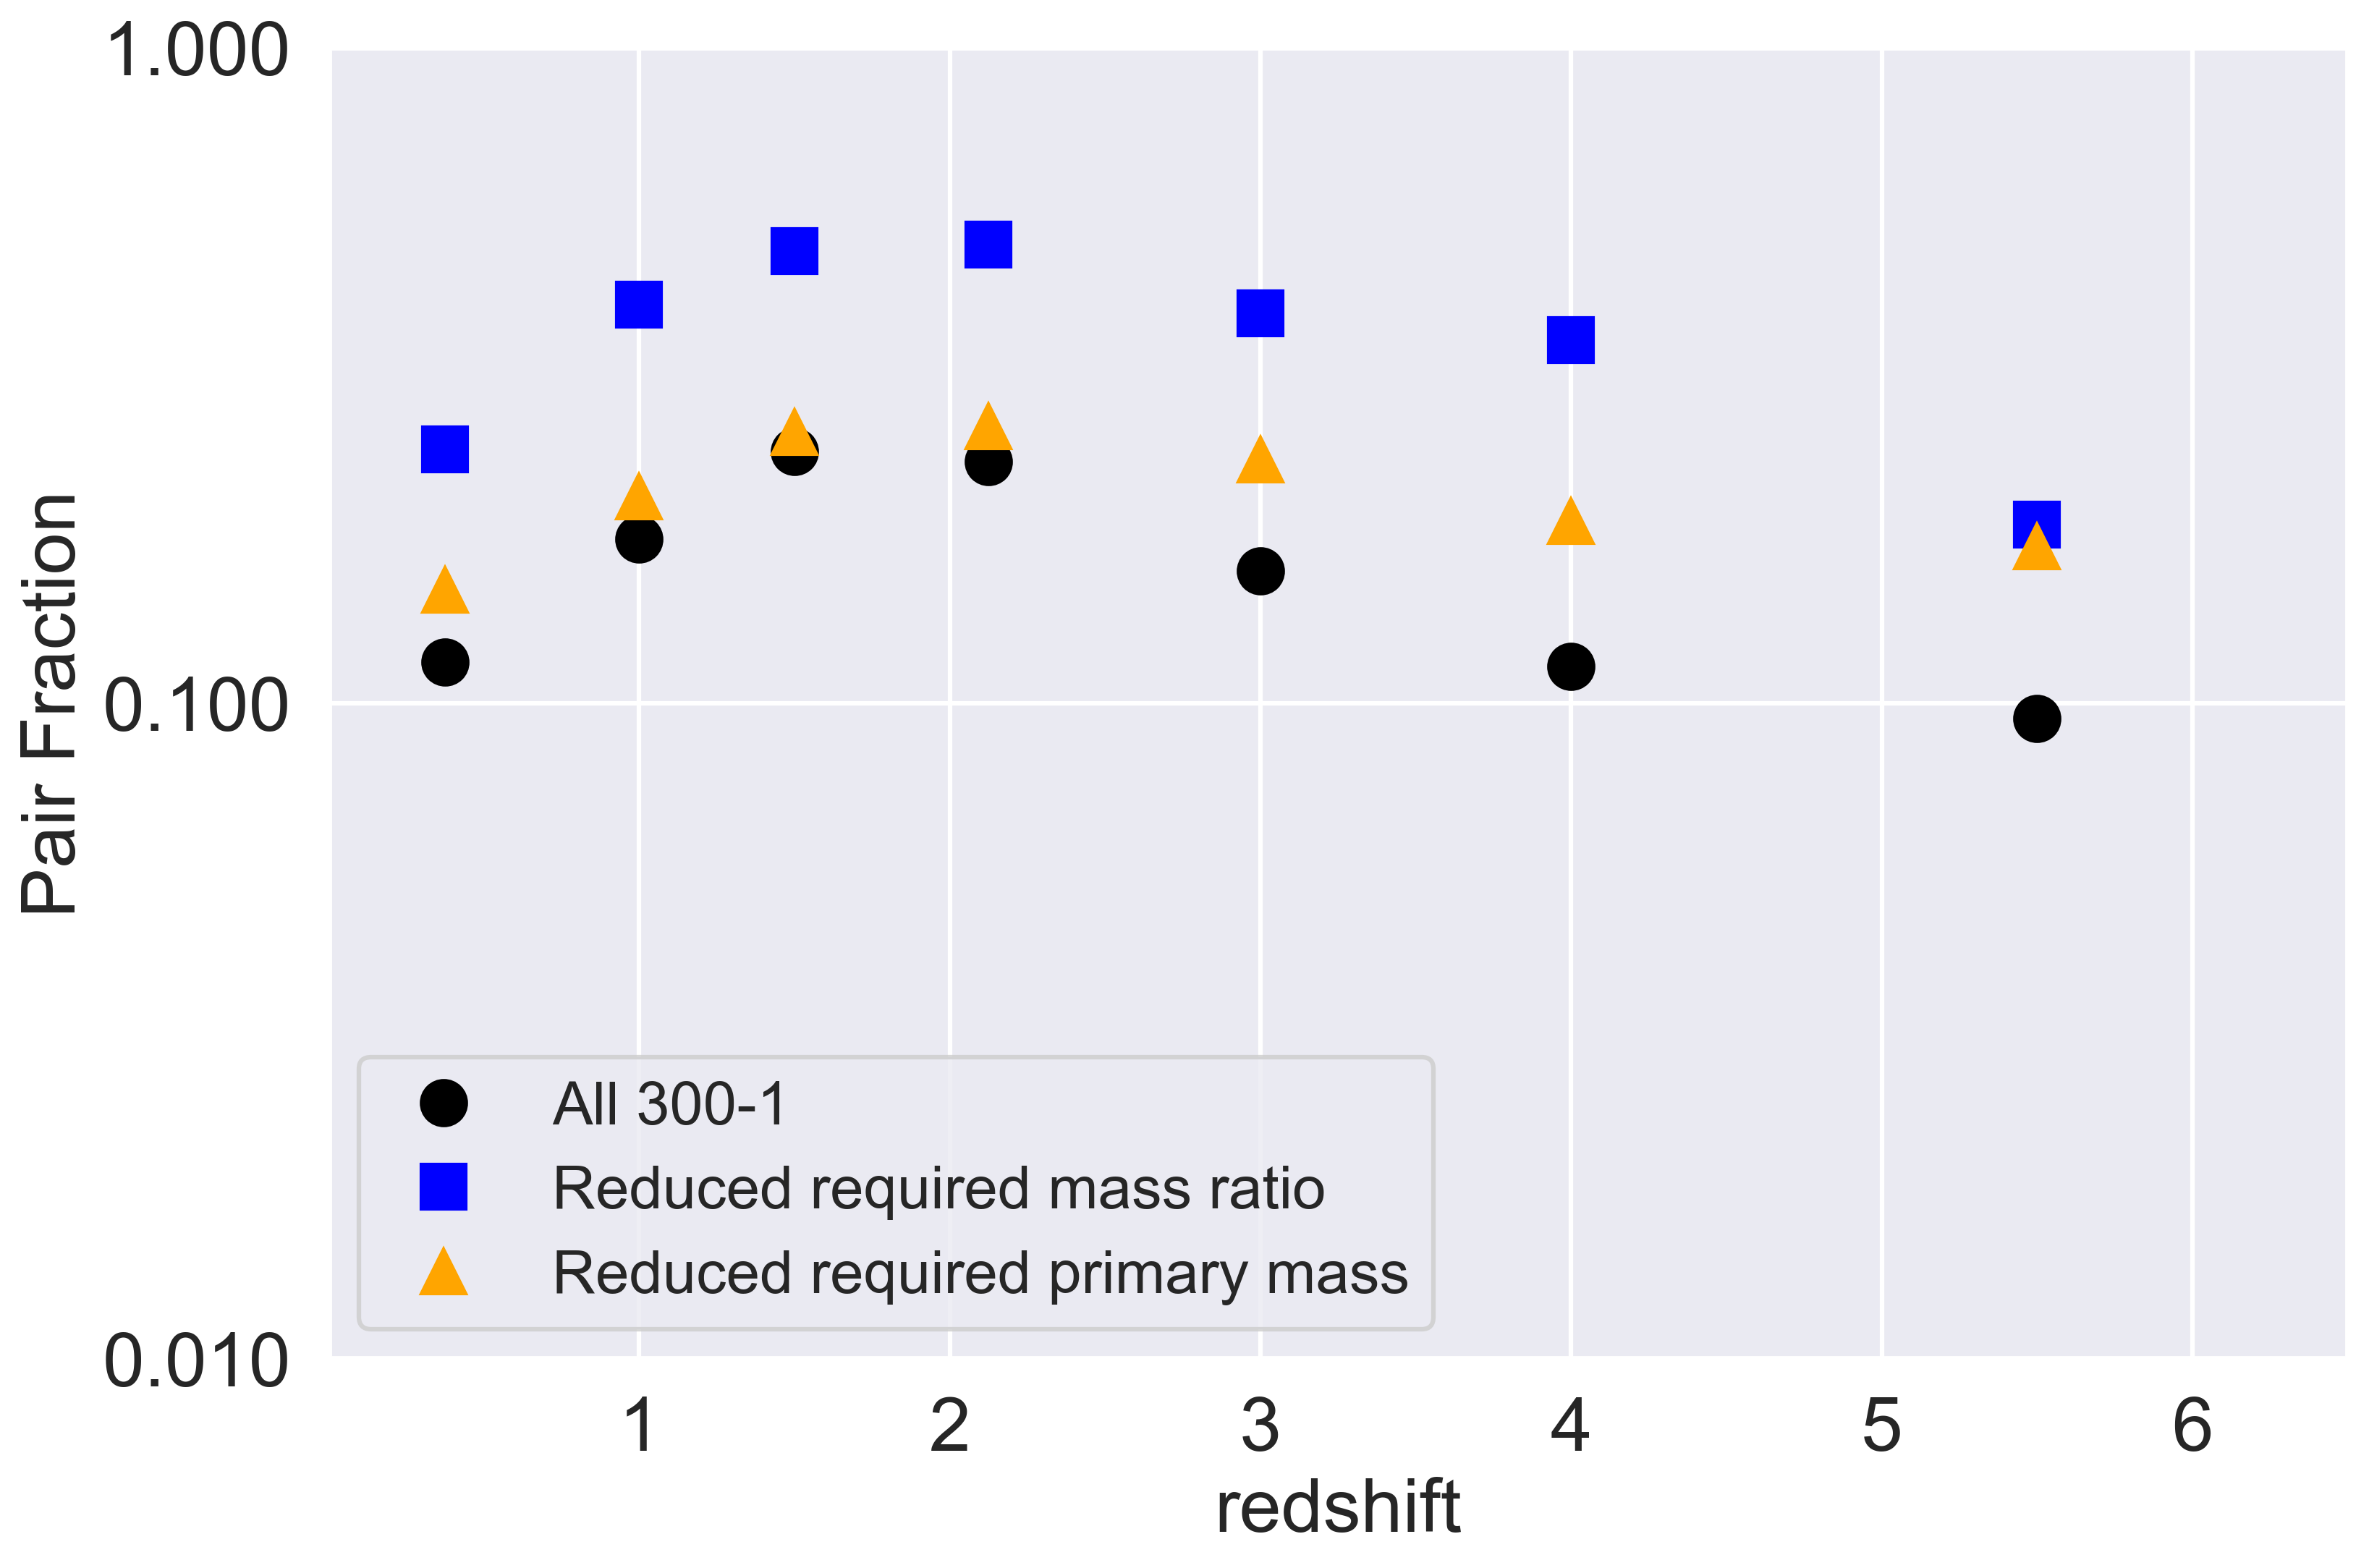

In [19]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
ax1.plot(all_[1],all_[0],marker='o',linestyle='None',markersize=15,color='black',label=('All 300-1'))
ax1.plot(all01[1],all01[0],marker='s',linestyle='None',markersize=15,color='blue',label=('Reduced required mass ratio'))
ax1.plot(allreduced[1],allreduced[0],marker='^',linestyle='None',markersize=15,color='orange',label=('Reduced required primary mass'))
#ax1.errorbar(obs_info[0], obs_info[1], yerr=obs_info[2], marker='o', linestyle='None', markersize=10, color='red', label = 'Observational data')
ax1.legend(loc='lower left',fontsize=20)

ax1.set_xlabel('redshift',size=25)
ax1.set_xlim(bins_for_plot1[0][0], 6.5)
ax1.set_ylabel('Pair Fraction',size=25)
ax1.set_ylim([0.01, 1])
ax1.set_yscale('log')
ax1.get_yaxis().set_major_formatter(tick.ScalarFormatter())
ax1.get_yaxis().set_minor_formatter(tick.NullFormatter())

ax1.tick_params(labelsize=25)
plt.savefig('Data filtering comparison plot.pdf')
plt.show()

### Comparing Illustris-1 and TNG300-1 z=(.5 -- 6) > Save printout of number of pairs

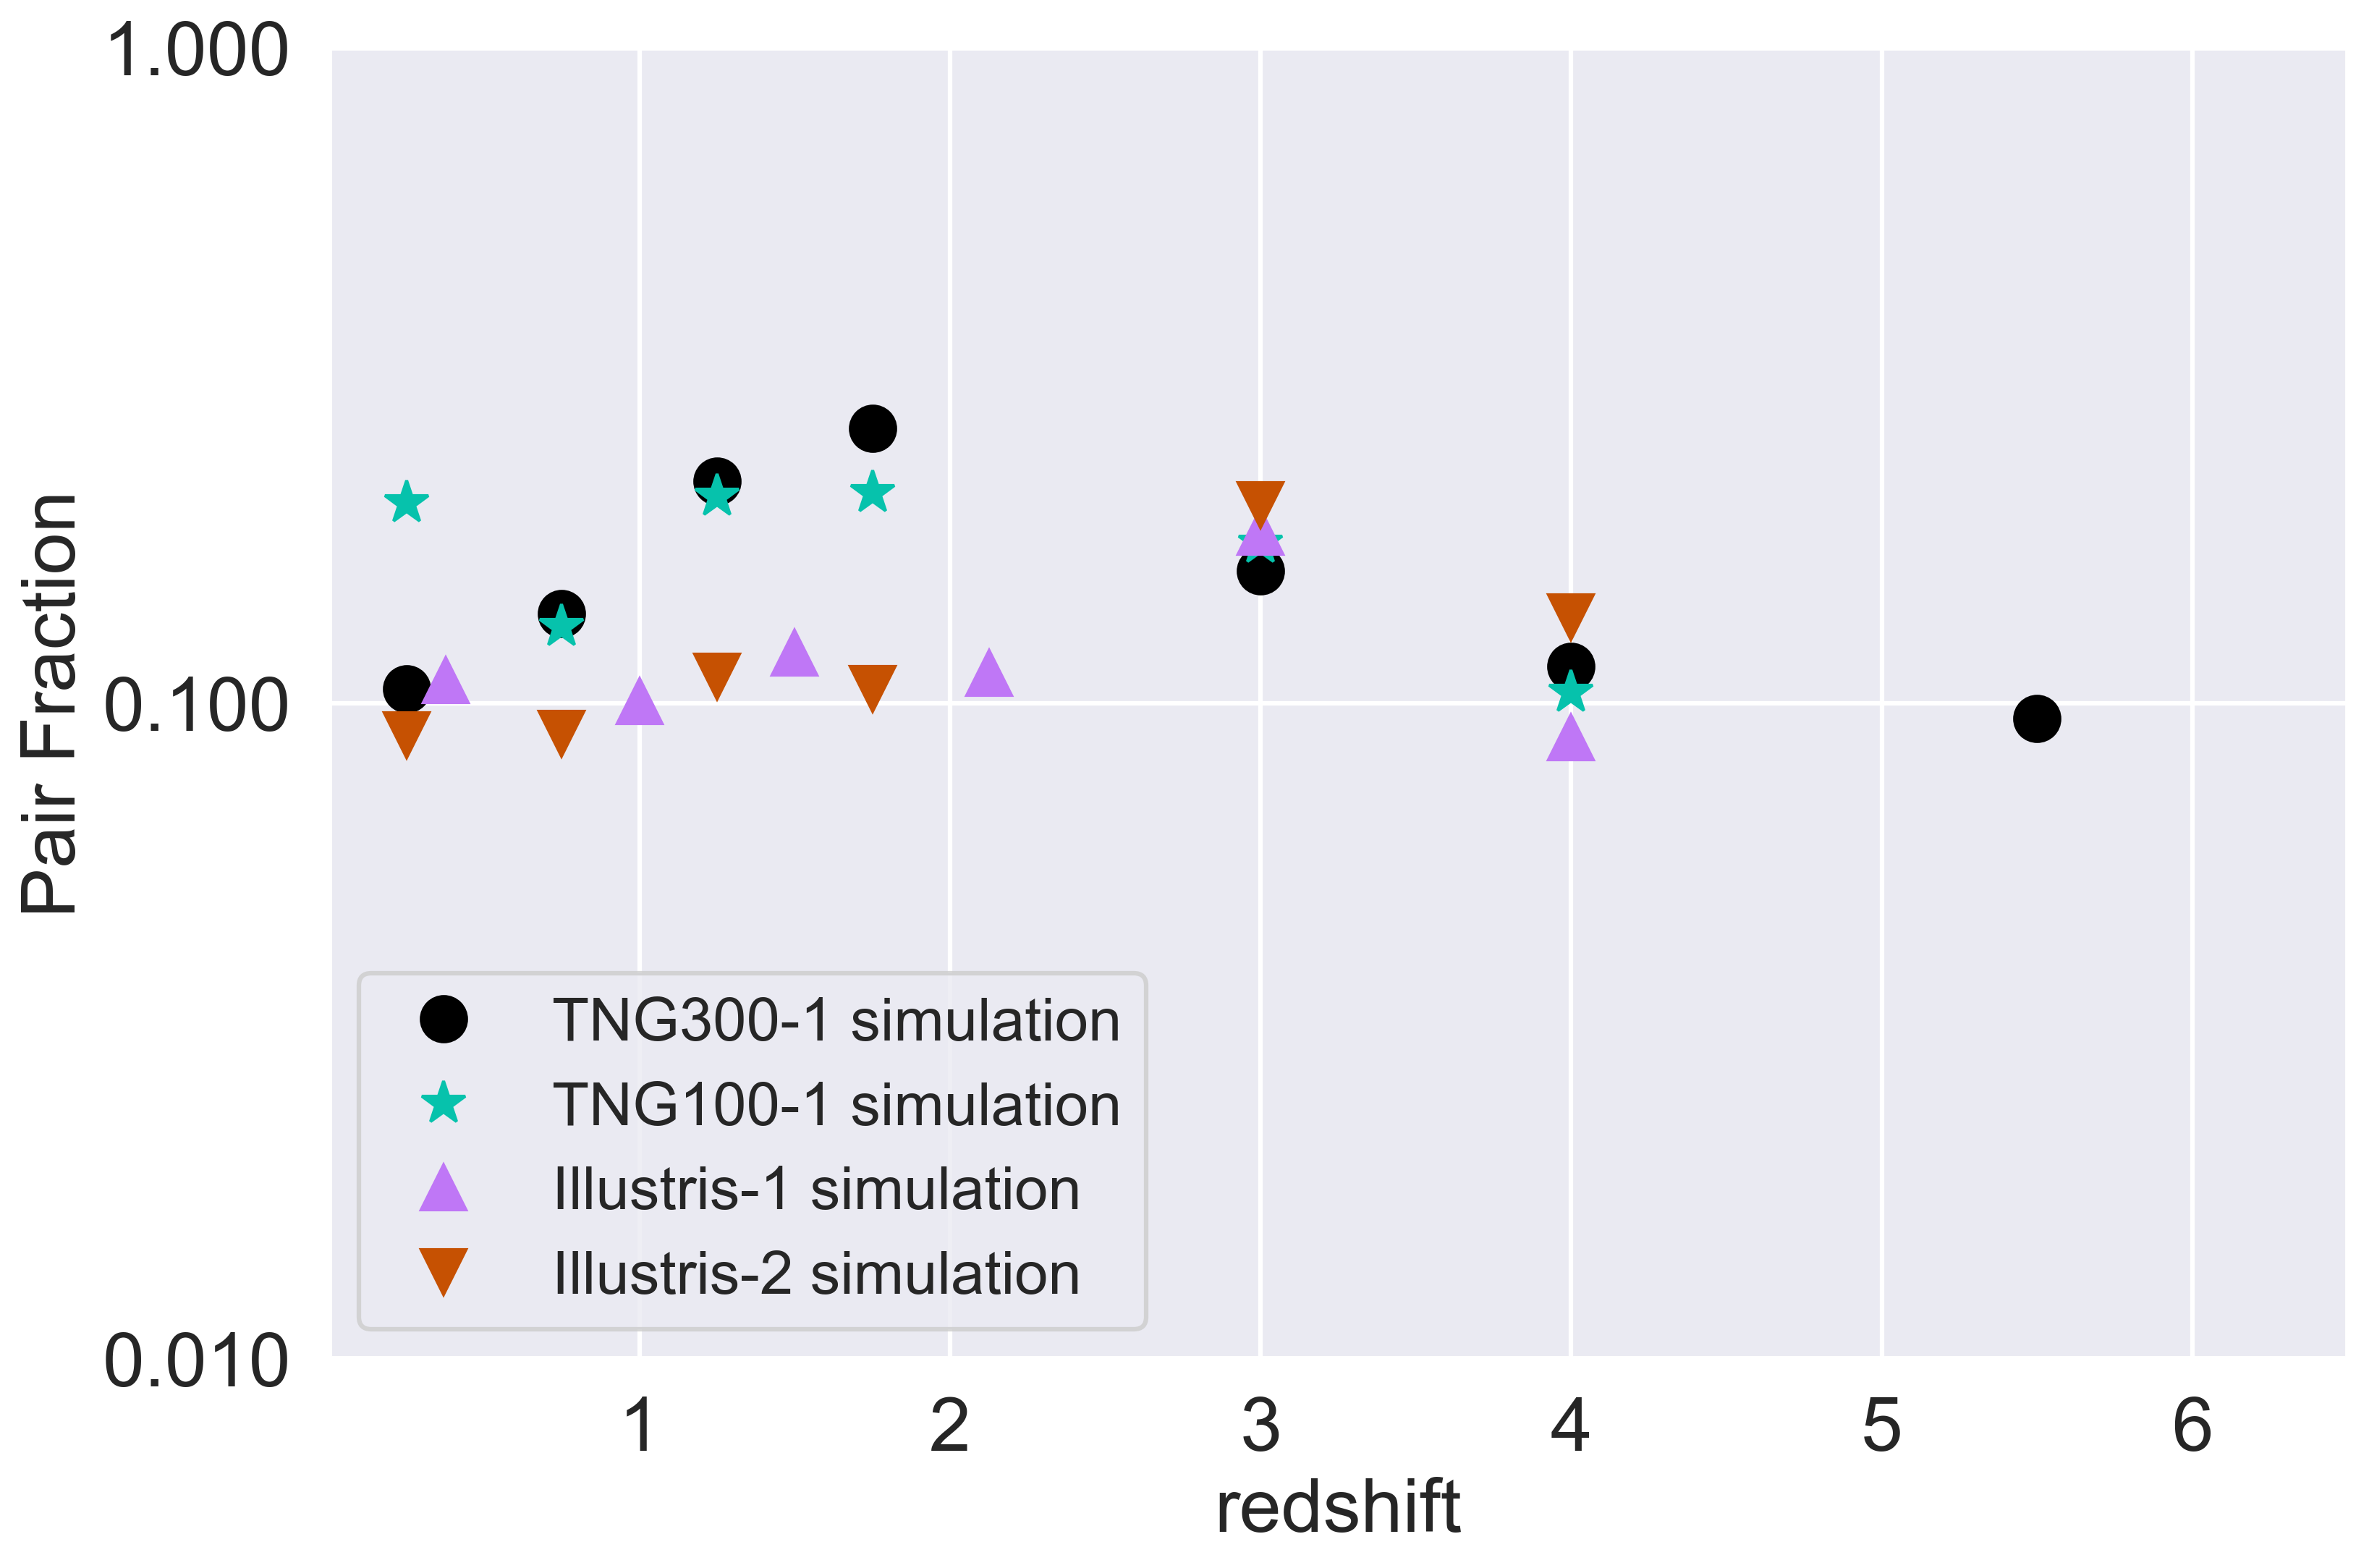

In [20]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(12, 8),dpi=300)
ax1.plot(all_2[1],all_2[0],marker='o',linestyle='None',markersize=15,color='Black',label=('TNG300-1 simulation'))
ax1.plot(all100[1],all100[0],marker='*',linestyle='None',markersize=15,color='xkcd:turquoise',label=('TNG100-1 simulation'))
ax1.plot(allil1[1],allil1[0],marker='^',linestyle='None',markersize=15,color='xkcd:light purple',label=('Illustris-1 simulation'))
ax1.plot(allil2[1],allil2[0],marker='v',linestyle='None',markersize=15,color='xkcd:dark orange',label=('Illustris-2 simulation'))
#ax1.errorbar(obs_info[0], obs_info[1], yerr=obs_info[2], marker='o', linestyle='None', markersize=10, color='red', label = 'Observational data')
ax1.legend(loc='lower left',fontsize=20)

ax1.set_xlabel('redshift',size=25)
ax1.set_xlim(bins_for_plot2[0][0], 6.5)
ax1.set_ylabel('Pair Fraction',size=25)
ax1.set_ylim([0.01, 1])
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(tick.ScalarFormatter())
ax1.get_yaxis().set_minor_formatter(tick.NullFormatter())

ax1.tick_params(labelsize=25)
plt.savefig('Simulation context plot.pdf')
plt.show()